In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
import pyarrow

In [2]:
df = pd.read_csv('Tax Income.csv')

In [3]:
df

STATEFIPS STATE  ZIPCODE  AGI_STUB         N1     MARS1     MARS2  \
0              1    AL        0         0  2161370.0  982450.0  749300.0   
1              1    AL    35004         0     5420.0    2450.0    2060.0   
2              1    AL    35005         0     3440.0    1650.0     800.0   
3              1    AL    35006         0     1230.0     520.0     550.0   
4              1    AL    35007         0    12600.0    5380.0    5080.0   
...          ...   ...      ...       ...        ...       ...       ...   
27739         56    WY    83126         0      210.0      70.0     120.0   
27740         56    WY    83127         0     1810.0     660.0    1020.0   
27741         56    WY    83128         0     1140.0     590.0     450.0   
27742         56    WY    83414         0      240.0      90.0     130.0   
27743         56    WY    99999         0    15470.0    7560.0    6540.0   

          MARS4        ELF    CPREP  ...   N85300    A85300    N11901  \
0      379640.0  2007020.0  48290.0  ...  41850.0  164114.0  406560.0   
1         790.0     5060.0    130.0  ...     30.0      68.0    1050.0   
2         900.0     3150.0     90.0  ...      0.0       0.0     530.0   
3         150.0     1170.0     30.0  ...      0.0       0.0     210.0   
4        1770.0    11500.0    380.0  ...    130.0     169.0    2880.0   
...         ...        ...      ...  ...      ...       ...       ...   
27739       0.0      200.0      0.0  ...      0.0       0.0      40.0   
27740     100.0     1670.0     40.0  ...     70.0     348.0     480.0   
27741      70.0     1040.0     20.0  ...     70.0    3071.0     320.0   
27742       0.0      230.0      0.0  ...     40.0     608.0      60.0   
27743    1280.0    14760.0    300.0  ...    510.0    3685.0    2810.0   

          A11901     N11900     A11900     N11902     A11902   N12000  \
0      2125822.0  1696840.0  5796626.0  1664160.0  5209274.0  37960.0   
1         3330.0     4250.0    12422.0     4190.0    11876.0     50.0   
2         1452.0     2820.0     8689.0     2810.0     8637.0      0.0   
3          525.0     1000.0     2979.0      990.0     2947.0      0.0   
4         9991.0     9400.0    27302.0     9290.0    26368.0    150.0   
...          ...        ...        ...        ...        ...      ...   
27739      236.0      140.0      442.0      130.0      419.0      0.0   
27740     3071.0     1280.0     4708.0     1240.0     4096.0     70.0   
27741     3970.0      780.0     4177.0      740.0     2302.0     70.0   
27742     1203.0      160.0     2515.0      130.0      744.0     40.0   
27743    18664.0    11660.0    53340.0    11000.0    34850.0    630.0   

         A12000  
0      520722.0  
1         201.0  
2           0.0  
3           0.0  
4         917.0  
...         ...  
27739       0.0  
27740     447.0  
27741    1844.0  
27742    1725.0  
27743   15020.0  

[27744 rows x 165 columns]

In [4]:
df=df[df['STATE']=='IL']

In [5]:
df.to_parquet('IL_Tax_Data.parquet')

In [6]:
df=pd.read_parquet('IL_Tax_Data.parquet')

In [7]:
chicago_zipcodes=[60601, 60602, 60603, 60604, 60605, 60606, 60607, 60608, 60609, 60610, 60611, 60612, 60613, 60614, 60615, 60616, 60617, 60618, 60619, 60620, 60621, 60622, 60623, 60624, 60625, 60626, 60628, 60629, 60630, 60631, 60632, 60633, 60634, 60636, 60637, 60638, 60639, 60640, 60641, 60642, 60643, 60644, 60645, 60646, 60647, 60649, 60651, 60652, 60653, 60654, 60655, 60657, 60659, 60660, 60661]

In [8]:
df= df[df['ZIPCODE'].isin(chicago_zipcodes)]

In [9]:
df

STATEFIPS STATE  ZIPCODE  AGI_STUB       N1    MARS1    MARS2    MARS4  \
5773         17    IL    60601         0   8310.0   5940.0   1890.0    260.0   
5774         17    IL    60602         0   1180.0    870.0    230.0     40.0   
5775         17    IL    60603         0   1120.0    800.0    260.0     30.0   
5776         17    IL    60604         0    520.0    370.0    130.0      0.0   
5777         17    IL    60605         0  15590.0  10650.0   3750.0    640.0   
5778         17    IL    60606         0   2740.0   2000.0    610.0     60.0   
5779         17    IL    60607         0  14590.0  10260.0   3160.0    750.0   
5780         17    IL    60608         0  30850.0  18320.0   6610.0   5320.0   
5781         17    IL    60609         0  25020.0  12730.0   5220.0   6740.0   
5782         17    IL    60610         0  23440.0  17960.0   3570.0   1450.0   
5783         17    IL    60611         0  19380.0  13580.0   4740.0    470.0   
5784         17    IL    60612         0  14120.0   7990.0   1880.0   3890.0   
5785         17    IL    60613         0  28400.0  21030.0   5460.0   1190.0   
5786         17    IL    60614         0  34710.0  24330.0   8660.0   1010.0   
5787         17    IL    60615         0  18290.0  11590.0   2840.0   3420.0   
5788         17    IL    60616         0  24720.0  15050.0   6060.0   2970.0   
5789         17    IL    60617         0  34600.0  18350.0   5510.0  10060.0   
5790         17    IL    60618         0  44180.0  26030.0  12180.0   4810.0   
5791         17    IL    60619         0  27890.0  15910.0   1990.0   9340.0   
5792         17    IL    60620         0  29850.0  16510.0   2080.0  10740.0   
5793         17    IL    60621         0  10420.0   5490.0    430.0   4370.0   
5794         17    IL    60622         0  28550.0  19850.0   5980.0   1990.0   
5795         17    IL    60623         0  31700.0  15140.0   5450.0  10750.0   
5796         17    IL    60624         0  14010.0   6920.0    730.0   6200.0   
5797         17    IL    60625         0  35800.0  20870.0  10000.0   4010.0   
5798         17    IL    60626         0  22600.0  15140.0   4200.0   2510.0   
5799         17    IL    60628         0  28570.0  15420.0   2350.0  10290.0   
5800         17    IL    60629         0  50800.0  24610.0  12250.0  13300.0   
5801         17    IL    60630         0  27260.0  14760.0   8950.0   2900.0   
5802         17    IL    60631         0  15260.0   8000.0   5880.0    960.0   
5803         17    IL    60632         0  38400.0  18680.0  10470.0   8780.0   
5804         17    IL    60633         0   6100.0   3160.0   1360.0   1460.0   
5805         17    IL    60634         0  38450.0  20190.0  11890.0   5490.0   
5806         17    IL    60636         0  13450.0   6750.0   1090.0   5450.0   
5807         17    IL    60637         0  18700.0  10320.0   1900.0   6140.0   
5808         17    IL    60638         0  28160.0  14480.0   8330.0   4790.0   
5809         17    IL    60639         0  39160.0  19890.0   8110.0  10580.0   
5810         17    IL    60640         0  34900.0  24990.0   6710.0   2210.0   
5811         17    IL    60641         0  33900.0  18660.0   9060.0   5410.0   
5812         17    IL    60642         0  11730.0   8690.0   2070.0    650.0   
5813         17    IL    60643         0  23670.0  12330.0   4660.0   6000.0   
5814         17    IL    60644         0  18110.0   9320.0   1100.0   7460.0   
5815         17    IL    60645         0  21090.0  10890.0   6790.0   2890.0   
5816         17    IL    60646         0  13530.0   6500.0   5650.0    990.0   
5817         17    IL    60647         0  43700.0  29240.0   8850.0   4580.0   
5818         17    IL    60649         0  18400.0  10760.0   1250.0   6010.0   
5819         17    IL    60651         0  27020.0  14020.0   3390.0   9210.0   
5820         17    IL    60652         0  20920.0  10480.0   4680.0   5260.0   
5821         17    IL    60653         0  13150.0   7060.0   1260.0   4490.0   
5822  

In [10]:
df.dtypes

STATEFIPS      int64
STATE         object
ZIPCODE        int64
AGI_STUB       int64
N1           float64
              ...   
A11900       float64
N11902       float64
A11902       float64
N12000       float64
A12000       float64
Length: 165, dtype: object

In [11]:
df['A02650'].dtype
#Total Income Amt Variable

dtype('float64')

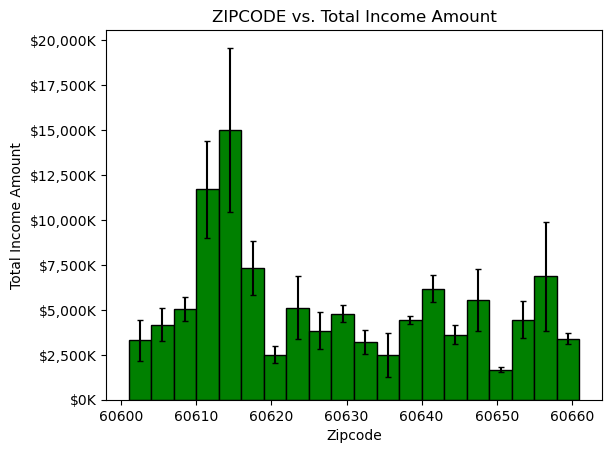

In [12]:
fig, ax = plt.subplots()

n, bins, patches = ax.hist(
    x=df['ZIPCODE'],
    weights=df['A02650'],
    color='green',
    edgecolor='black',
    bins=20  # Adjust the number of bins as needed
)

# Calculate the bin centers
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Calculate the standard deviation of the Total Income Amount within each bin
bin_std = []
for i in range(len(bins)-1):
    bin_data = df.loc[(df['ZIPCODE'] >= bins[i]) & (df['ZIPCODE'] < bins[i+1]), 'A02650']
    bin_std.append(bin_data.std())

# Plot the error bars
ax.errorbar(
    x=bin_centers,
    y=n,
    yerr=bin_std,
    fmt='none',
    color='black',
    capsize=2
)

# Define the formatter function to display thousands of dollars
def thousands_formatter(x, pos):
    return '${:,.0f}K'.format(x/1000)

# Set the y-axis ticker to use the custom formatter
ax.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

# Set labels and title
ax.set_title('ZIPCODE vs. Total Income Amount')
ax.set_xlabel('Zipcode')
ax.set_ylabel('Total Income Amount')

plt.show()

C:\Users\keyan\.conda\envs\my-env\lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


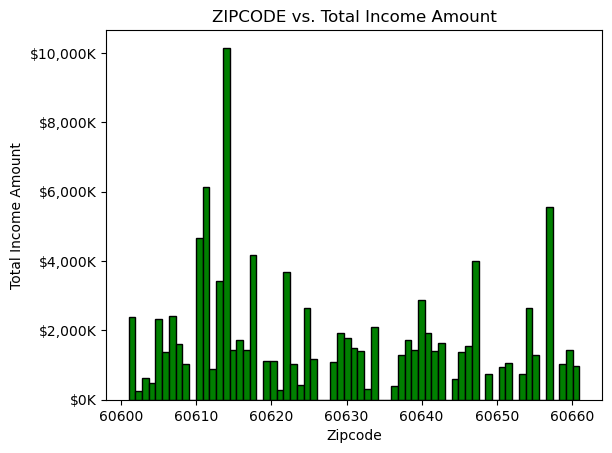

In [13]:
fig, ax = plt.subplots()

# Define the number of bins and the range for binning
num_bins = 67  # Adjust the number of bins as needed
bin_range = (df['ZIPCODE'].min(), df['ZIPCODE'].max())

# Create bins using pandas.cut
df['bins'] = pd.cut(df['ZIPCODE'], bins=num_bins, include_lowest=True)

# Group data by bins and calculate the mean and standard deviation for each bin
bin_stats = df.groupby('bins')['A02650'].agg(['mean', 'std'])

# Plot the histogram
n, bins, patches = ax.hist(
    x=df['ZIPCODE'],
    weights=df['A02650'],
    color='green',
    edgecolor='black',
    bins=num_bins,
)

# Calculate the bin centers
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Get the standard deviation values from the bin_stats DataFrame
bin_std = bin_stats['std'].values

# Plot the error bars
ax.errorbar(
    x=bin_centers,
    y=n,
    yerr=bin_std,
    fmt='none',
    color='black',
    capsize=10
)

# Define the formatter function to display thousands of dollars
def thousands_formatter(x, pos):
    return '${:,.0f}K'.format(x/1000)

# Set the y-axis ticker to use the custom formatter
ax.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

# Set labels and title
ax.set_title('ZIPCODE vs. Total Income Amount')
ax.set_xlabel('Zipcode')
ax.set_ylabel('Total Income Amount')

plt.show()

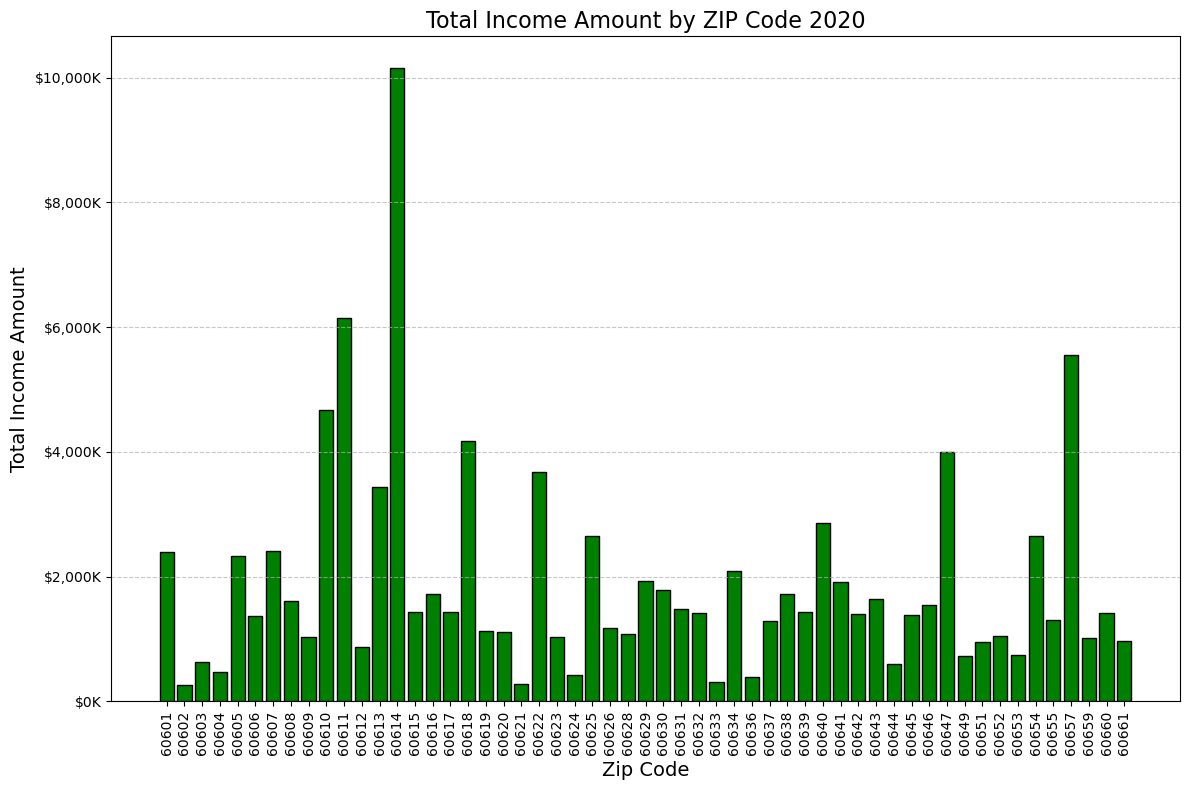

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

# Create a new figure and axis with adjusted size and aspect ratio
fig, ax = plt.subplots(figsize=(12, 8))

# Group data by ZIPCODE and get the sum of 'A00200' for each ZIP code
zip_stats = df.groupby('ZIPCODE')['A02650'].sum()

# Get the ZIP codes and their corresponding total income amounts
zip_codes = zip_stats.index.astype(int)
total_income = zip_stats.values

# Create a bar for each ZIP code
ax.bar(range(len(zip_codes)), total_income, color='green', edgecolor='black')

# Define the formatter function to display thousands of dollars
def thousands_formatter(x, pos):
    return '${:,.0f}K'.format(x/1000)

# Set the y-axis ticker to use the custom formatter
ax.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

# Set x-axis labels to be the ZIP codes
ax.set_xticks(range(len(zip_codes)))
ax.set_xticklabels(zip_codes, rotation=90, fontsize=10)

# Set labels, title, and legend with adjusted font sizes
ax.set_title('Total Income Amount by ZIP Code 2020', fontsize=16)
ax.set_xlabel('Zip Code', fontsize=14)
ax.set_ylabel('Total Income Amount', fontsize=14)

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Fine-tune layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

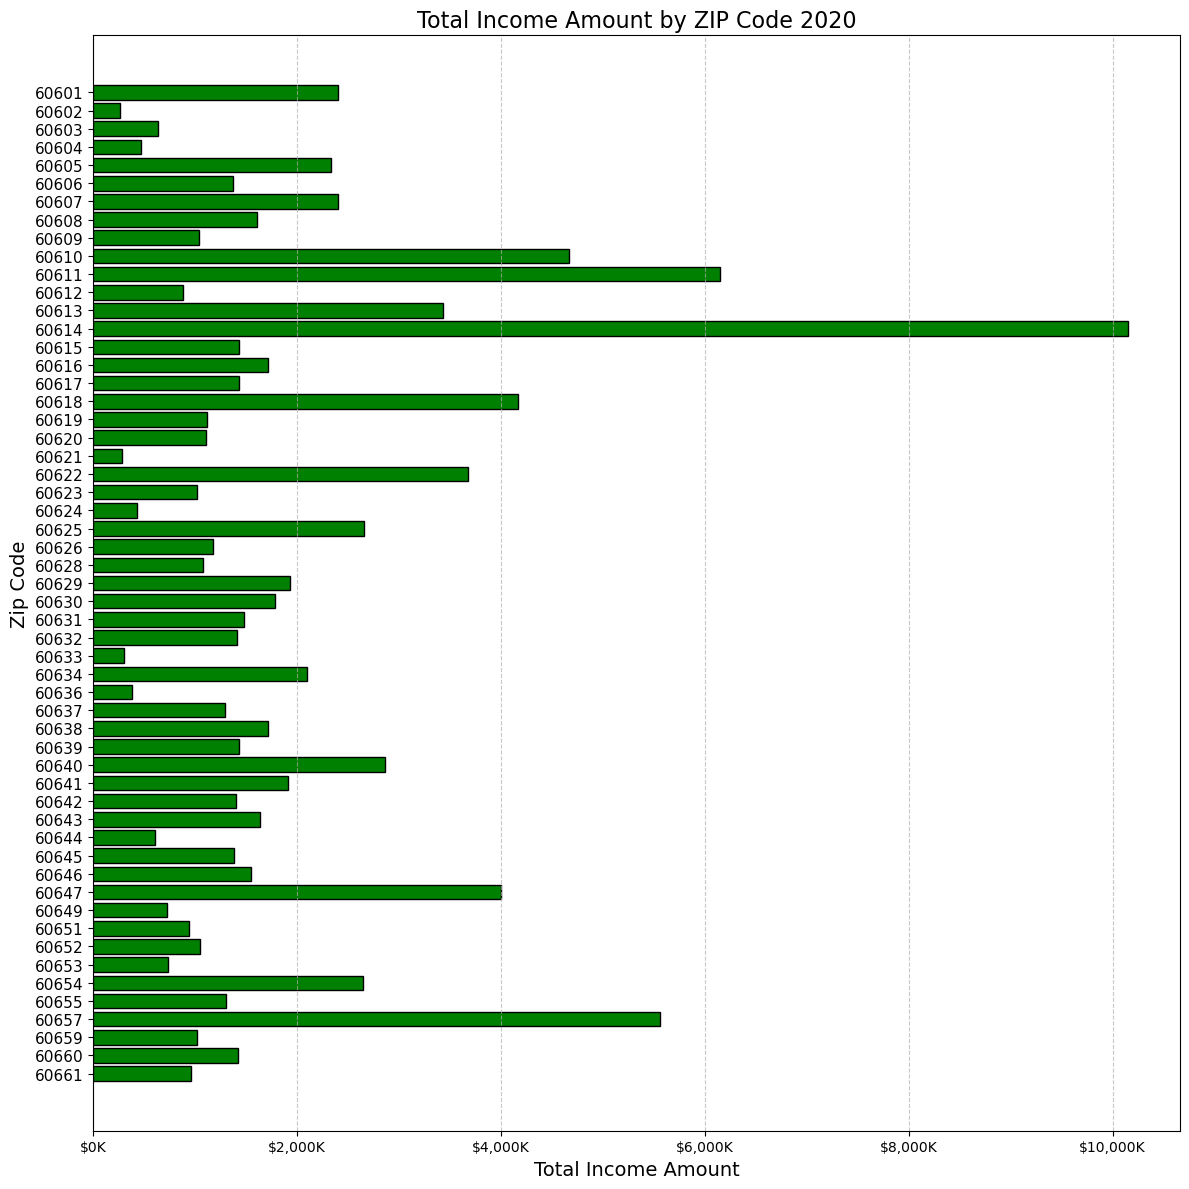

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

# Create a new figure and axis with adjusted size and aspect ratio
fig, ax = plt.subplots(figsize=(12, 12))

# Group data by ZIPCODE and get the sum of 'A00200' for each ZIP code
zip_stats = df.groupby('ZIPCODE')['A02650'].sum()

# Get the ZIP codes and their corresponding total income amounts
zip_codes = zip_stats.index.astype(int)
total_income = zip_stats.values

# Create a horizontal bar for each ZIP code
ax.barh(range(len(zip_codes)), total_income, color='green', edgecolor='black')

# Set the x-axis ticker to use the custom formatter
def thousands_formatter(x, pos):
    return '${:,.0f}K'.format(x/1000)

ax.xaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

# Set y-axis labels to be the ZIP codes
ax.set_yticks(range(len(zip_codes)))
ax.set_yticklabels(zip_codes, fontsize=11)

# Set labels, title, and legend with adjusted font sizes
ax.set_title('Total Income Amount by ZIP Code 2020', fontsize=16)
ax.set_xlabel('Total Income Amount', fontsize=14)
ax.set_ylabel('Zip Code', fontsize=14)

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Invert the y-axis to display ZIP codes in ascending order
ax.invert_yaxis()

# Fine-tune layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [16]:
df

STATEFIPS STATE  ZIPCODE  AGI_STUB       N1    MARS1    MARS2    MARS4  \
5773         17    IL    60601         0   8310.0   5940.0   1890.0    260.0   
5774         17    IL    60602         0   1180.0    870.0    230.0     40.0   
5775         17    IL    60603         0   1120.0    800.0    260.0     30.0   
5776         17    IL    60604         0    520.0    370.0    130.0      0.0   
5777         17    IL    60605         0  15590.0  10650.0   3750.0    640.0   
5778         17    IL    60606         0   2740.0   2000.0    610.0     60.0   
5779         17    IL    60607         0  14590.0  10260.0   3160.0    750.0   
5780         17    IL    60608         0  30850.0  18320.0   6610.0   5320.0   
5781         17    IL    60609         0  25020.0  12730.0   5220.0   6740.0   
5782         17    IL    60610         0  23440.0  17960.0   3570.0   1450.0   
5783         17    IL    60611         0  19380.0  13580.0   4740.0    470.0   
5784         17    IL    60612         0  14120.0   7990.0   1880.0   3890.0   
5785         17    IL    60613         0  28400.0  21030.0   5460.0   1190.0   
5786         17    IL    60614         0  34710.0  24330.0   8660.0   1010.0   
5787         17    IL    60615         0  18290.0  11590.0   2840.0   3420.0   
5788         17    IL    60616         0  24720.0  15050.0   6060.0   2970.0   
5789         17    IL    60617         0  34600.0  18350.0   5510.0  10060.0   
5790         17    IL    60618         0  44180.0  26030.0  12180.0   4810.0   
5791         17    IL    60619         0  27890.0  15910.0   1990.0   9340.0   
5792         17    IL    60620         0  29850.0  16510.0   2080.0  10740.0   
5793         17    IL    60621         0  10420.0   5490.0    430.0   4370.0   
5794         17    IL    60622         0  28550.0  19850.0   5980.0   1990.0   
5795         17    IL    60623         0  31700.0  15140.0   5450.0  10750.0   
5796         17    IL    60624         0  14010.0   6920.0    730.0   6200.0   
5797         17    IL    60625         0  35800.0  20870.0  10000.0   4010.0   
5798         17    IL    60626         0  22600.0  15140.0   4200.0   2510.0   
5799         17    IL    60628         0  28570.0  15420.0   2350.0  10290.0   
5800         17    IL    60629         0  50800.0  24610.0  12250.0  13300.0   
5801         17    IL    60630         0  27260.0  14760.0   8950.0   2900.0   
5802         17    IL    60631         0  15260.0   8000.0   5880.0    960.0   
5803         17    IL    60632         0  38400.0  18680.0  10470.0   8780.0   
5804         17    IL    60633         0   6100.0   3160.0   1360.0   1460.0   
5805         17    IL    60634         0  38450.0  20190.0  11890.0   5490.0   
5806         17    IL    60636         0  13450.0   6750.0   1090.0   5450.0   
5807         17    IL    60637         0  18700.0  10320.0   1900.0   6140.0   
5808         17    IL    60638         0  28160.0  14480.0   8330.0   4790.0   
5809         17    IL    60639         0  39160.0  19890.0   8110.0  10580.0   
5810         17    IL    60640         0  34900.0  24990.0   6710.0   2210.0   
5811         17    IL    60641         0  33900.0  18660.0   9060.0   5410.0   
5812         17    IL    60642         0  11730.0   8690.0   2070.0    650.0   
5813         17    IL    60643         0  23670.0  12330.0   4660.0   6000.0   
5814         17    IL    60644         0  18110.0   9320.0   1100.0   7460.0   
5815         17    IL    60645         0  21090.0  10890.0   6790.0   2890.0   
5816         17    IL    60646         0  13530.0   6500.0   5650.0    990.0   
5817         17    IL    60647         0  43700.0  29240.0   8850.0   4580.0   
5818         17    IL    60649         0  18400.0  10760.0   1250.0   6010.0   
5819         17    IL    60651         0  27020.0  14020.0   3390.0   9210.0   
5820         17    IL    60652         0  20920.0  10480.0   4680.0   5260.0   
5821         17    IL    60653         0  13150.0   7060.0   1260.0   4490.0   
5822  

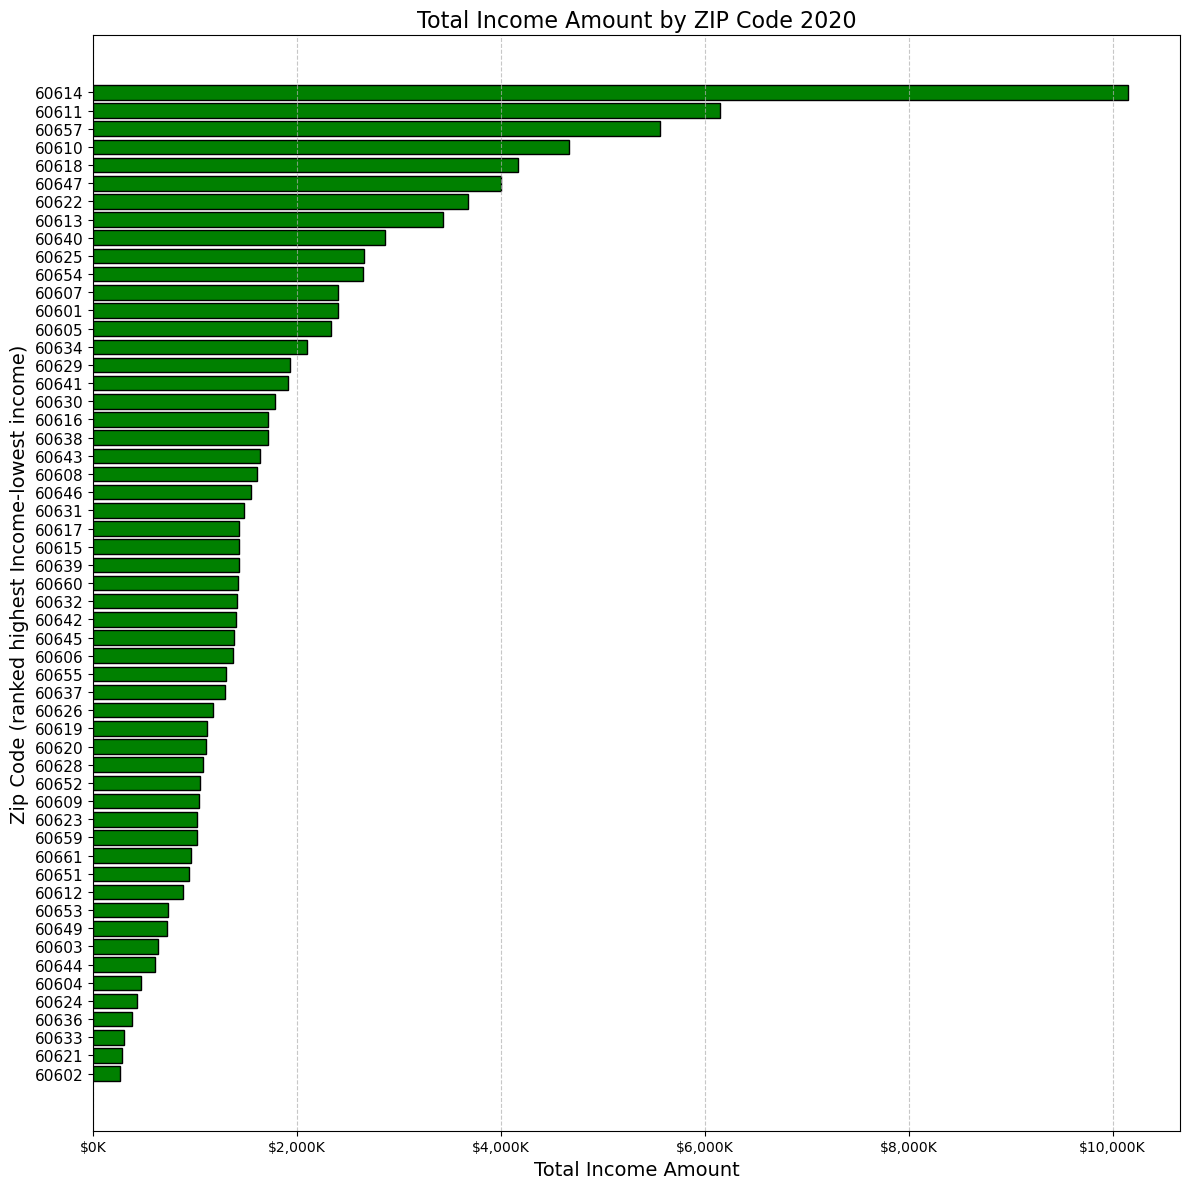

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

# Create a new figure and axis with adjusted size and aspect ratio
fig, ax = plt.subplots(figsize=(12, 12))

# Group data by ZIPCODE and get the sum of 'A00200' for each ZIP code
zip_stats = df.groupby('ZIPCODE')['A02650'].sum()

# Sort the ZIP codes and total income in descending order
zip_stats = zip_stats.sort_values(ascending=False)

# Get the ZIP codes and their corresponding total income amounts
zip_codes = zip_stats.index.astype(int)
total_income = zip_stats.values

# Create a horizontal bar for each ZIP code
ax.barh(range(len(zip_codes)), total_income, color='green', edgecolor='black')

# Set the x-axis ticker to use the custom formatter
def thousands_formatter(x, pos):
    return '${:,.0f}K'.format(x/1000)

ax.xaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

# Set y-axis labels to be the ZIP codes
ax.set_yticks(range(len(zip_codes)))
ax.set_yticklabels(zip_codes, fontsize=11)

# Set labels, title, and legend with adjusted font sizes
ax.set_title('Total Income Amount by ZIP Code 2020', fontsize=16)
ax.set_xlabel('Total Income Amount', fontsize=14)
ax.set_ylabel('Zip Code (ranked highest Income-lowest income)', fontsize=14)

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Invert the y-axis to display ZIP codes in ascending order
ax.invert_yaxis()

# Fine-tune layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [18]:
!pip install geopandas fiona descartes
import geopandas as gpd

In [19]:
chicago_zip_map = gpd.read_file('chicago_zipcodes.geojson')

In [20]:
# chicago_zip_map= chicago_zip_map[chicago_zip_map['zip'].isin(chicago_zipcodes)]

In [21]:
chicago_zip_map

objectid     shape_area      shape_len    zip  \
0        33  106052287.488  42720.0444058  60647   
1        34  127476050.762  48103.7827213  60639   
2        35  45069038.4783  27288.6096123  60707   
3        36  70853834.3797  42527.9896789  60622   
4        37  99039621.2518  47970.1401531  60651   
..      ...            ...            ...    ...   
56       57  155285532.005  53406.9156168  60623   
57       58  211114779.439  58701.3253749  60629   
58       59  211696050.967  58466.1602979  60620   
59       60  125424284.172  52377.8545408  60637   
60       61  167872012.644  53040.9070778  60619   

                                             geometry  
0   MULTIPOLYGON (((-87.67762 41.91776, -87.67761 ...  
1   MULTIPOLYGON (((-87.72683 41.92265, -87.72693 ...  
2   MULTIPOLYGON (((-87.78500 41.90915, -87.78531 ...  
3   MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ...  
4   MULTIPOLYGON (((-87.70656 41.89555, -87.70672 ...  
..                                                ...  
56  MULTIPOLYGON (((-87.69479 41.83008, -87.69486 ...  
57  MULTIPOLYGON (((-87.68306 41.75786, -87.68306 ...  
58  MULTIPOLYGON (((-87.62373 41.72167, -87.62388 ...  
59  MULTIPOLYGON (((-87.57691 41.79511, -87.57700 ...  
60  MULTIPOLYGON (((-87.58592 41.75150, -87.58592 ...  

[61 rows x 5 columns]

In [22]:
overlap = chicago_zip_map.columns.intersection(df.columns)
print(overlap)

Index([], dtype='object')


In [23]:
# Ensure ZIP codes are of the same data type in both DataFrames
chicago_zip_map['zip'] = chicago_zip_map['zip'].astype(str)
df['ZIPCODE'] = df['ZIPCODE'].astype(str)

# Merge the data
merged = chicago_zip_map.set_index('zip').join(df.set_index('ZIPCODE'), lsuffix='_left', rsuffix='_right')


In [24]:
chicago_zip_map.loc[np.random.choice(chicago_zip_map.index, 30), 'A02650'] = np.nan

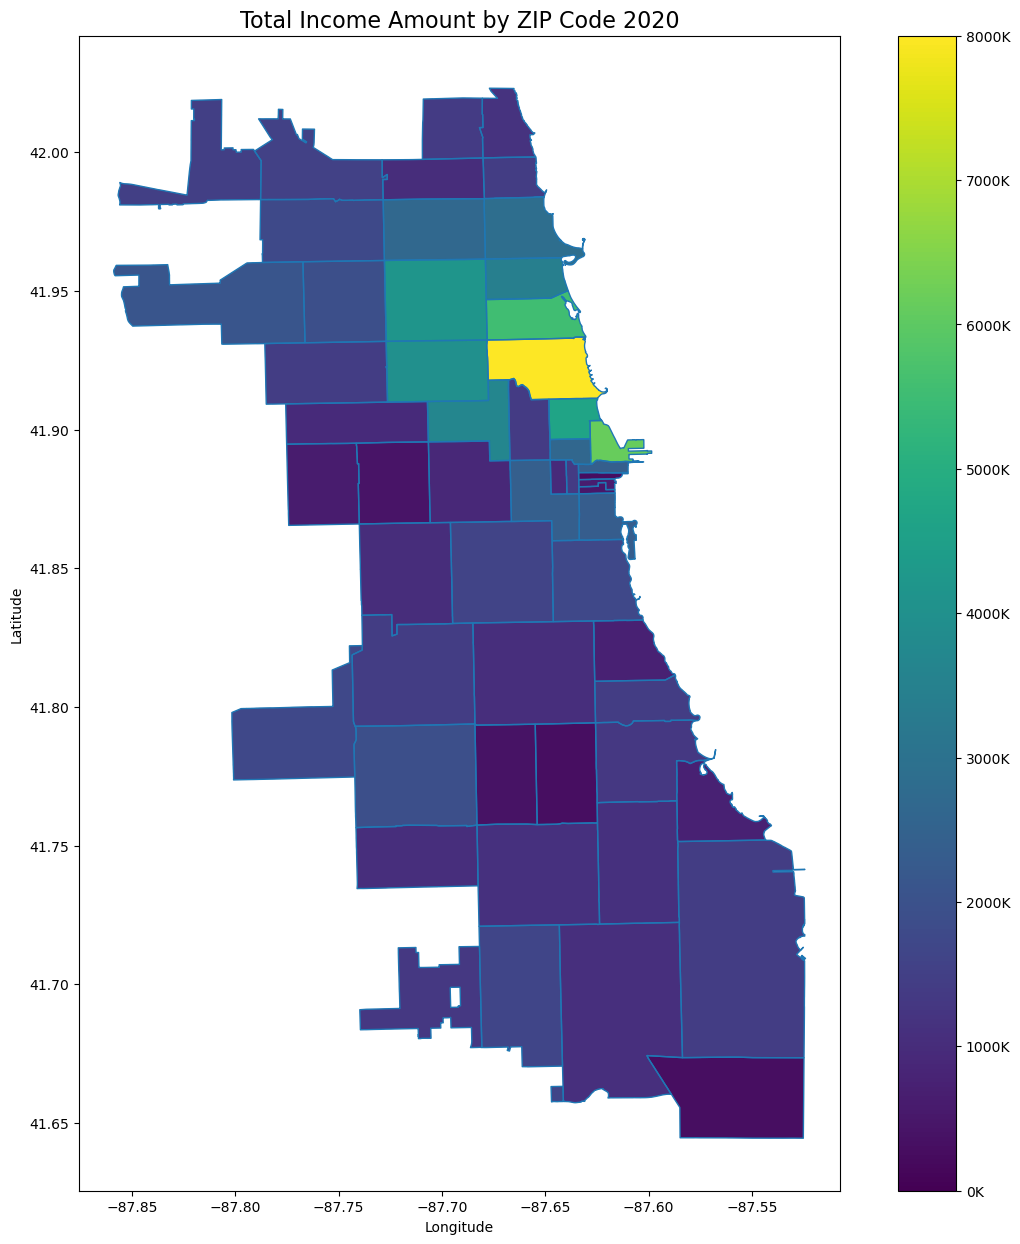

In [25]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Filter out ZIP codes without values
merged = merged.dropna(subset=['A02650'])

# Define color range and normalization
norm = mcolors.Normalize(vmin=0, vmax=8000000)  # 8,000K = 8,000,000

fig, ax = plt.subplots(1, figsize=(15, 15))

# Plot the ZIP code boundaries for those with values
merged.boundary.plot(ax=ax, linewidth=1)

# Plot the ZIP codes colored by income
cax = merged.plot(column='A02650', ax=ax, legend=True, norm=norm)

# Set custom ticks for the colorbar
cbar = ax.get_figure().get_axes()[-1]
ticks = np.linspace(0, 8000000, 9)
cbar.set_yticks(ticks)
cbar.set_yticklabels([f'{int(tick/1000)}K' for tick in ticks])

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Total Income Amount by ZIP Code 2020', fontsize=16)
plt.show()



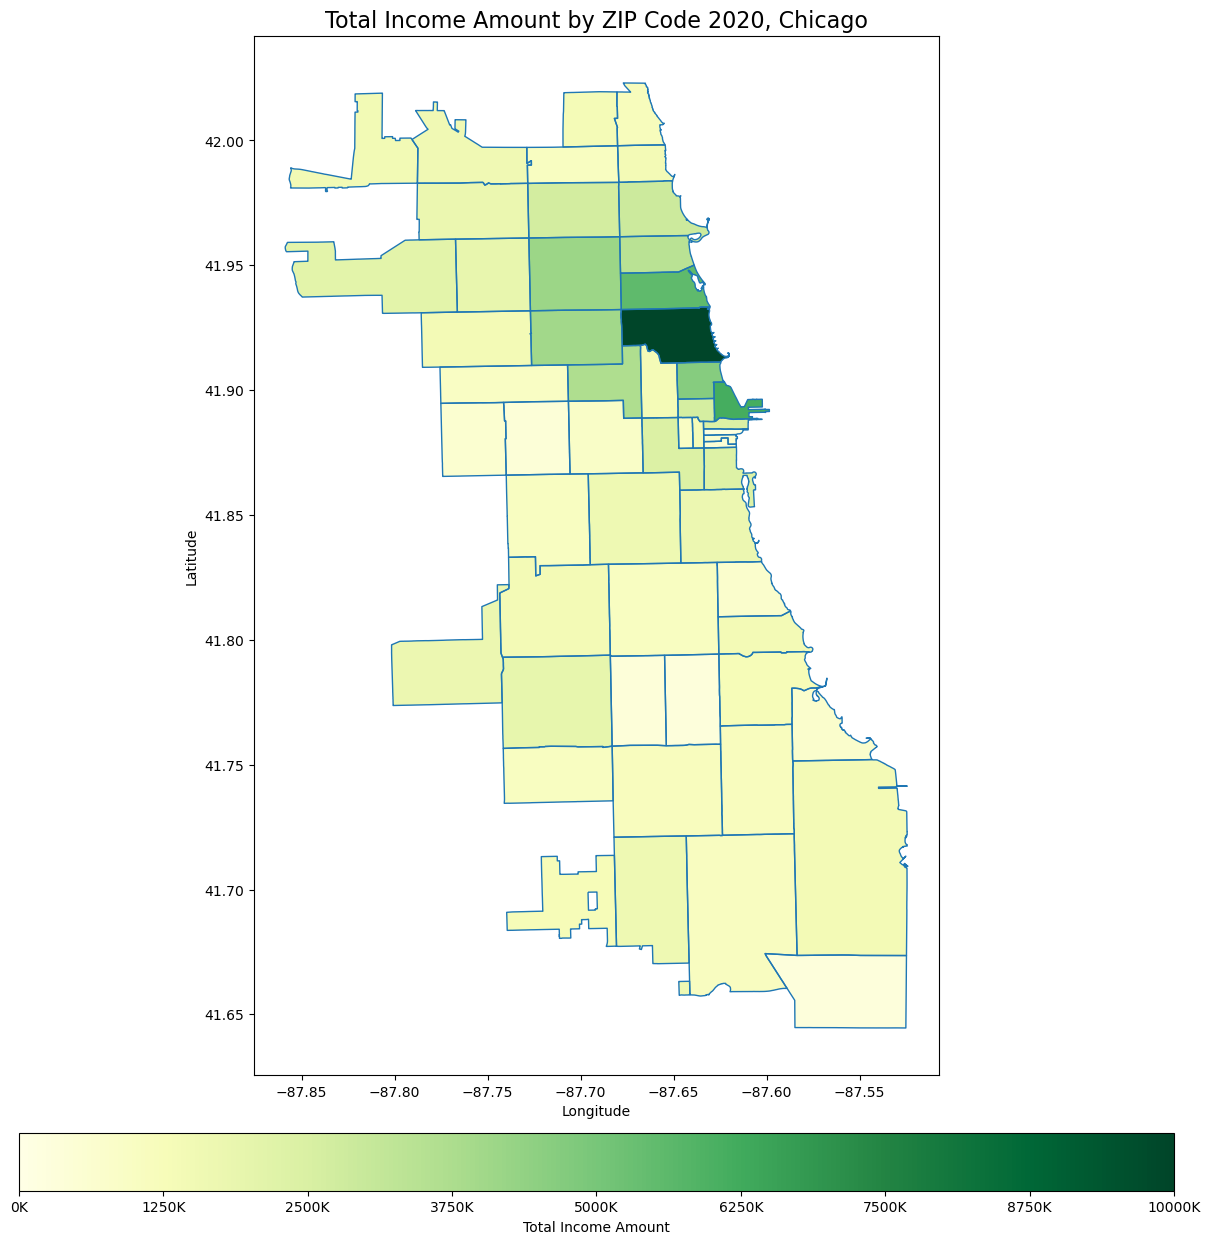

In [26]:
# Filter out ZIP codes without values
merged = merged.dropna(subset=['A02650'])

# Define color range and normalization
norm = mcolors.Normalize(vmin=0, vmax=10000000)  # 8,000K = 8,000,000

fig, ax = plt.subplots(1, figsize=(15, 15))

# Plot the ZIP code boundaries for those with values
merged.boundary.plot(ax=ax, linewidth=1)

# Plot the ZIP codes colored by income, but without the legend
cax = merged.plot(column='A02650', ax=ax, legend=False, norm=norm, cmap='YlGn')

# Create a horizontal colorbar at the bottom
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='YlGn'), ax=ax, orientation='horizontal', fraction=0.05, pad=0.05)
ticks = np.linspace(0, 10000000, 9)
cbar.set_ticks(ticks)
cbar.set_ticklabels([f'{int(tick/1000)}K' for tick in ticks])
cbar.set_label('Total Income Amount')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Total Income Amount by ZIP Code 2020, Chicago', fontsize=16)
plt.show()


In [27]:
df['A02650'].std()

1704475.6156860231

In [28]:
print(sorted(df['ZIPCODE'].unique()))

['60601', '60602', '60603', '60604', '60605', '60606', '60607', '60608', '60609', '60610', '60611', '60612', '60613', '60614', '60615', '60616', '60617', '60618', '60619', '60620', '60621', '60622', '60623', '60624', '60625', '60626', '60628', '60629', '60630', '60631', '60632', '60633', '60634', '60636', '60637', '60638', '60639', '60640', '60641', '60642', '60643', '60644', '60645', '60646', '60647', '60649', '60651', '60652', '60653', '60654', '60655', '60657', '60659', '60660', '60661']


In [29]:
df[['ZIPCODE', 'A02650', 'A00200']].head(5)

ZIPCODE        A02650     A00200
5773   60601  2.399206e+06  1012951.0
5774   60602  2.646420e+05   103178.0
5775   60603  6.371950e+05   146008.0
5776   60604  4.688640e+05    44233.0
5777   60605  2.337445e+06  1631423.0

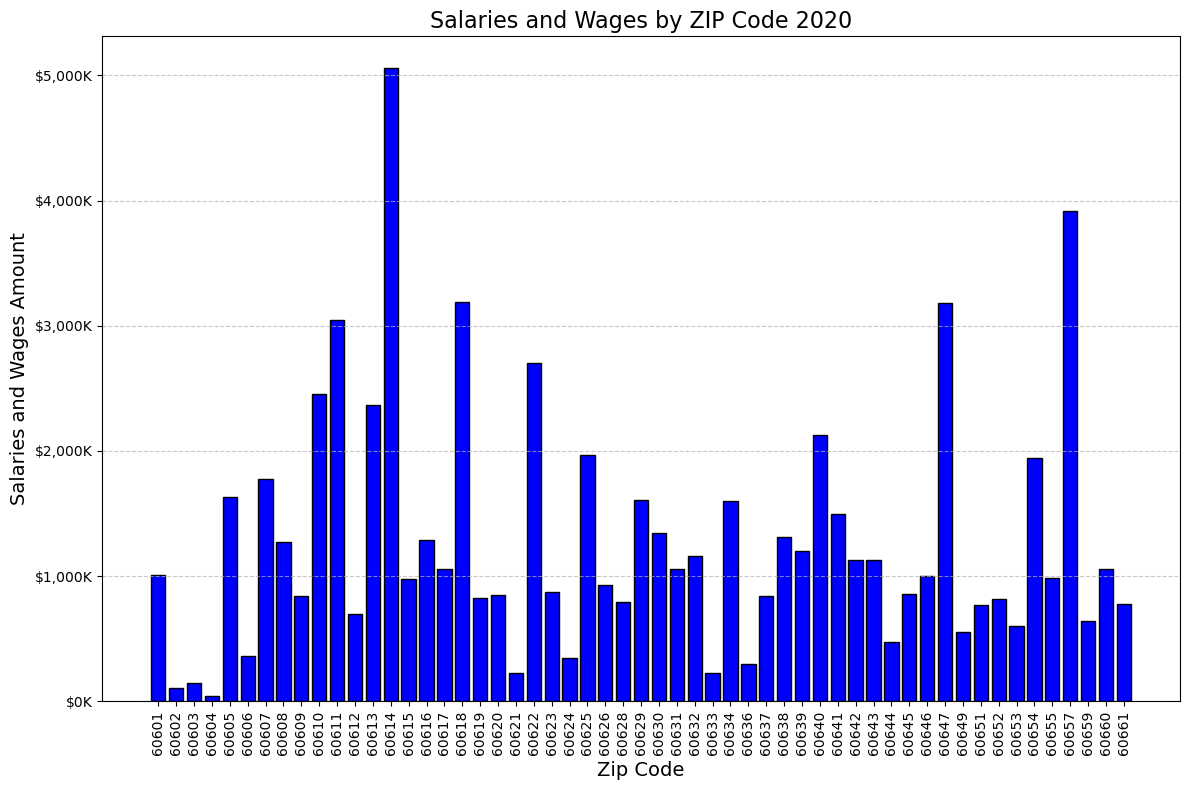

In [30]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

# Create a new figure and axis with adjusted size and aspect ratio
fig, ax = plt.subplots(figsize=(12, 8))

# Group data by ZIPCODE and get the sum of 'A00200' for each ZIP code
zip_stats = df.groupby('ZIPCODE')['A00200'].sum()

# Get the ZIP codes and their corresponding total income amounts
zip_codes = zip_stats.index.astype(int)
total_income = zip_stats.values

# Create a bar for each ZIP code
ax.bar(range(len(zip_codes)), total_income, color='blue', edgecolor='black')

# Define the formatter function to display thousands of dollars
def thousands_formatter(x, pos):
    return '${:,.0f}K'.format(x/1000)

# Set the y-axis ticker to use the custom formatter
ax.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

# Set x-axis labels to be the ZIP codes
ax.set_xticks(range(len(zip_codes)))
ax.set_xticklabels(zip_codes, rotation=90, fontsize=10)

# Set labels, title, and legend with adjusted font sizes
ax.set_title('Salaries and Wages by ZIP Code 2020', fontsize=16)
ax.set_xlabel('Zip Code', fontsize=14)
ax.set_ylabel('Salaries and Wages Amount', fontsize=14)

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Fine-tune layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

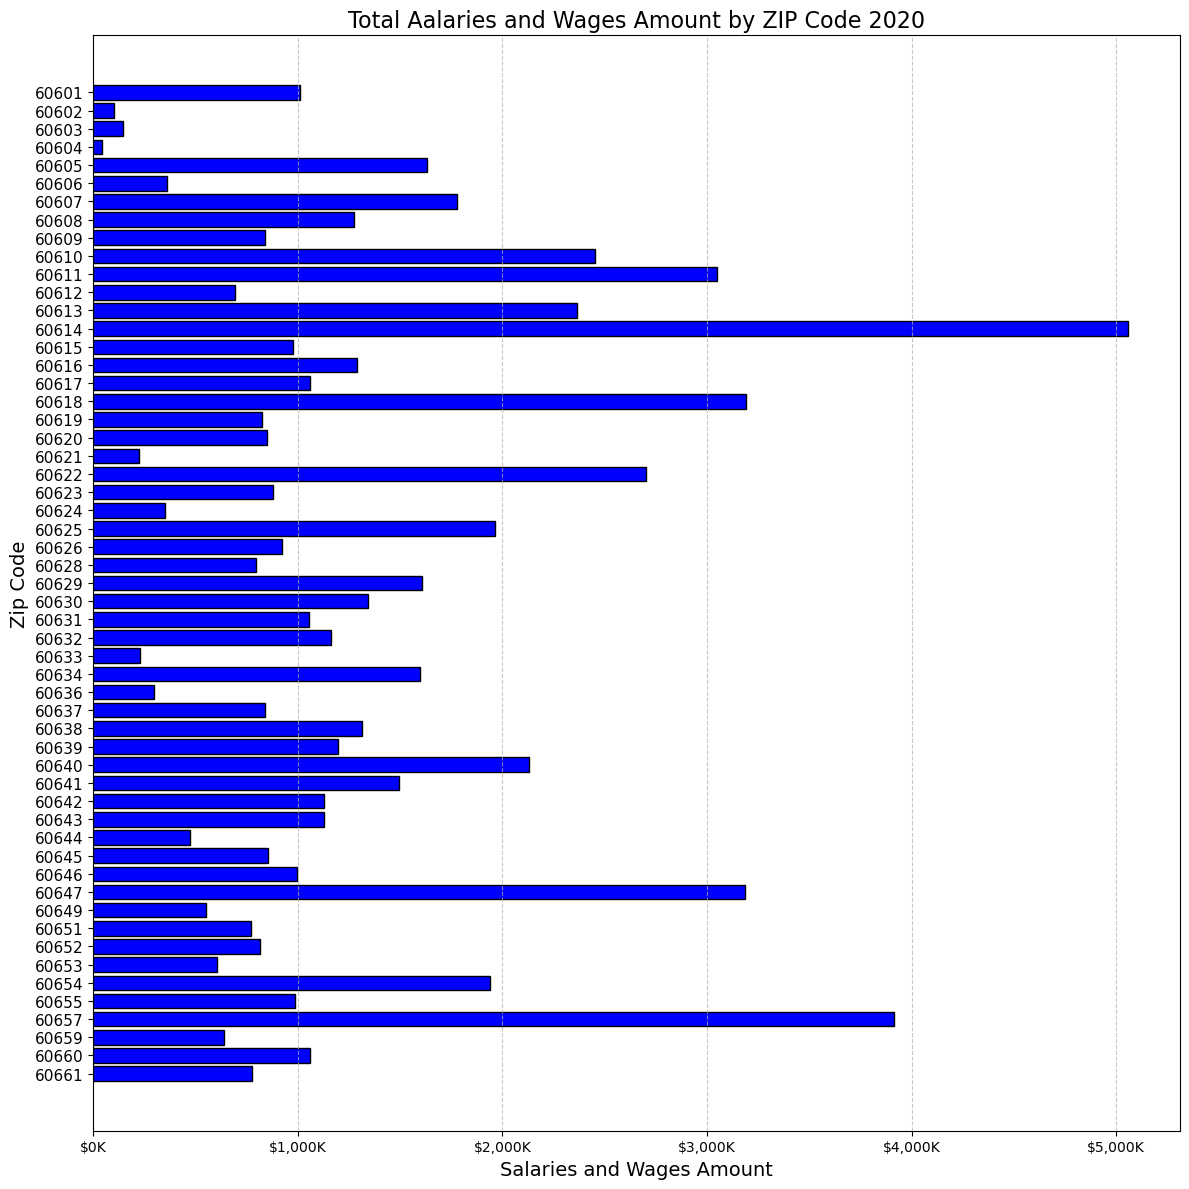

In [31]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

# Create a new figure and axis with adjusted size and aspect ratio
fig, ax = plt.subplots(figsize=(12, 12))

# Group data by ZIPCODE and get the sum of 'A00200' for each ZIP code
zip_stats = df.groupby('ZIPCODE')['A00200'].sum()

# Get the ZIP codes and their corresponding total income amounts
zip_codes = zip_stats.index.astype(int)
total_income = zip_stats.values

# Create a horizontal bar for each ZIP code
ax.barh(range(len(zip_codes)), total_income, color='blue', edgecolor='black')

# Set the x-axis ticker to use the custom formatter
def thousands_formatter(x, pos):
    return '${:,.0f}K'.format(x/1000)

ax.xaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

# Set y-axis labels to be the ZIP codes
ax.set_yticks(range(len(zip_codes)))
ax.set_yticklabels(zip_codes, fontsize=11)

# Set labels, title, and legend with adjusted font sizes
ax.set_title('Total Aalaries and Wages Amount by ZIP Code 2020', fontsize=16)
ax.set_xlabel('Salaries and Wages Amount', fontsize=14)
ax.set_ylabel('Zip Code', fontsize=14)

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Invert the y-axis to display ZIP codes in ascending order
ax.invert_yaxis()

# Fine-tune layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

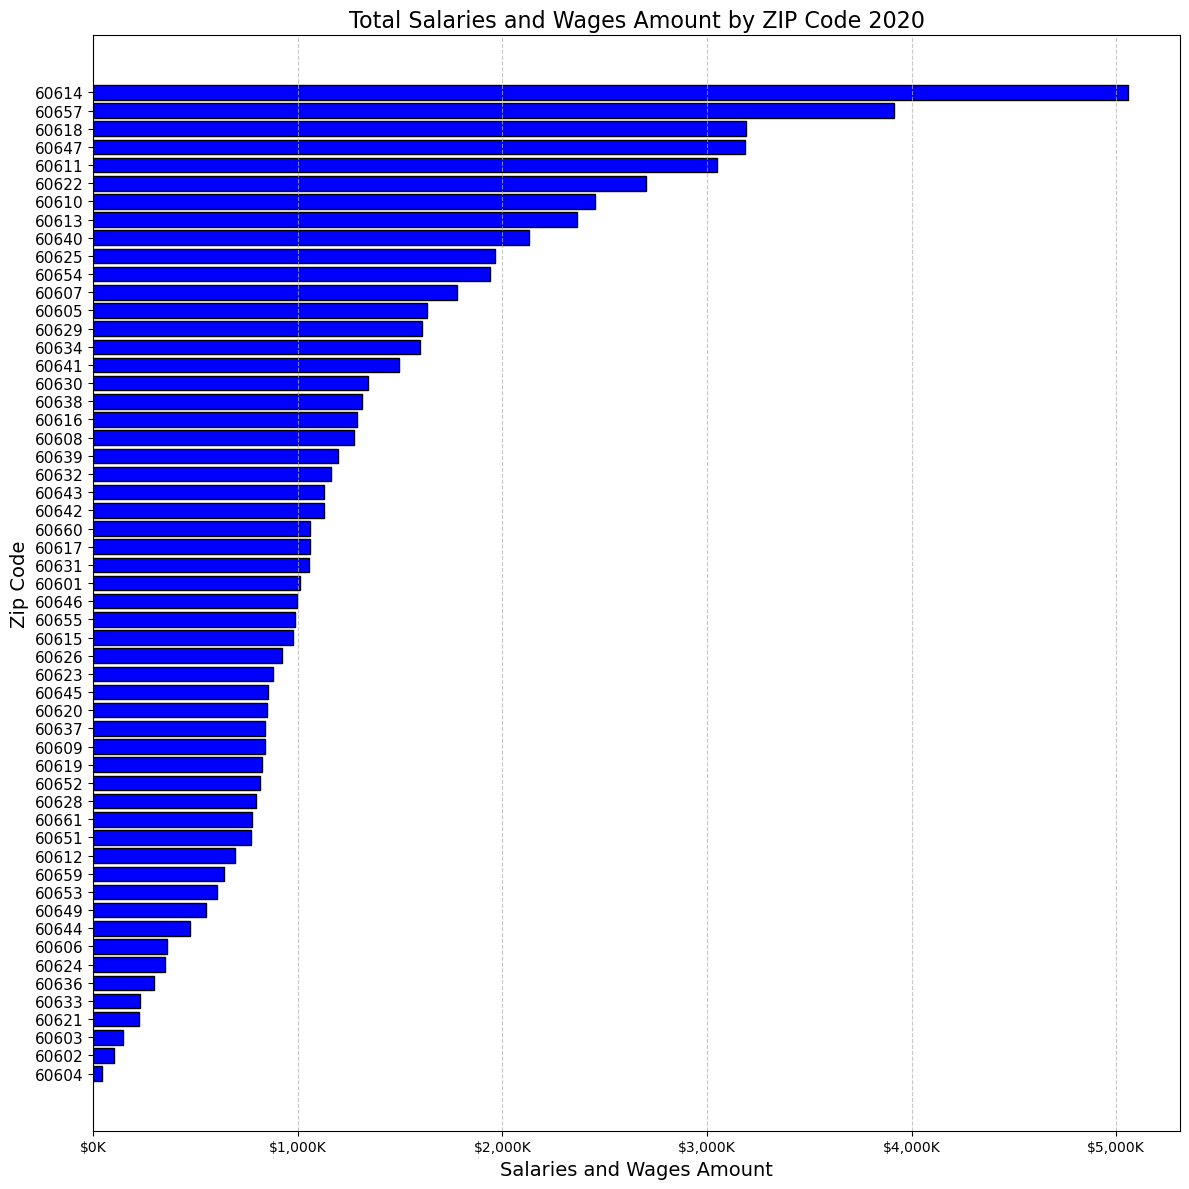

In [32]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

# Create a new figure and axis with adjusted size and aspect ratio
fig, ax = plt.subplots(figsize=(12, 12))

# Group data by ZIPCODE and get the sum of 'A00200' for each ZIP code
zip_stats = df.groupby('ZIPCODE')['A00200'].sum()

# Sort the ZIP codes and total income in descending order
zip_stats = zip_stats.sort_values(ascending=False)

# Get the ZIP codes and their corresponding total income amounts
zip_codes = zip_stats.index.astype(int)
total_income = zip_stats.values

# Create a horizontal bar for each ZIP code
ax.barh(range(len(zip_codes)), total_income, color='blue', edgecolor='black')

# Set the x-axis ticker to use the custom formatter
def thousands_formatter(x, pos):
    return '${:,.0f}K'.format(x/1000)

ax.xaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

# Set y-axis labels to be the ZIP codes
ax.set_yticks(range(len(zip_codes)))
ax.set_yticklabels(zip_codes, fontsize=11)

# Set labels, title, and legend with adjusted font sizes
ax.set_title('Total Salaries and Wages Amount by ZIP Code 2020', fontsize=16)
ax.set_xlabel('Salaries and Wages Amount', fontsize=14)
ax.set_ylabel('Zip Code', fontsize=14)

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Invert the y-axis to display ZIP codes in ascending order
ax.invert_yaxis()

# Fine-tune layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


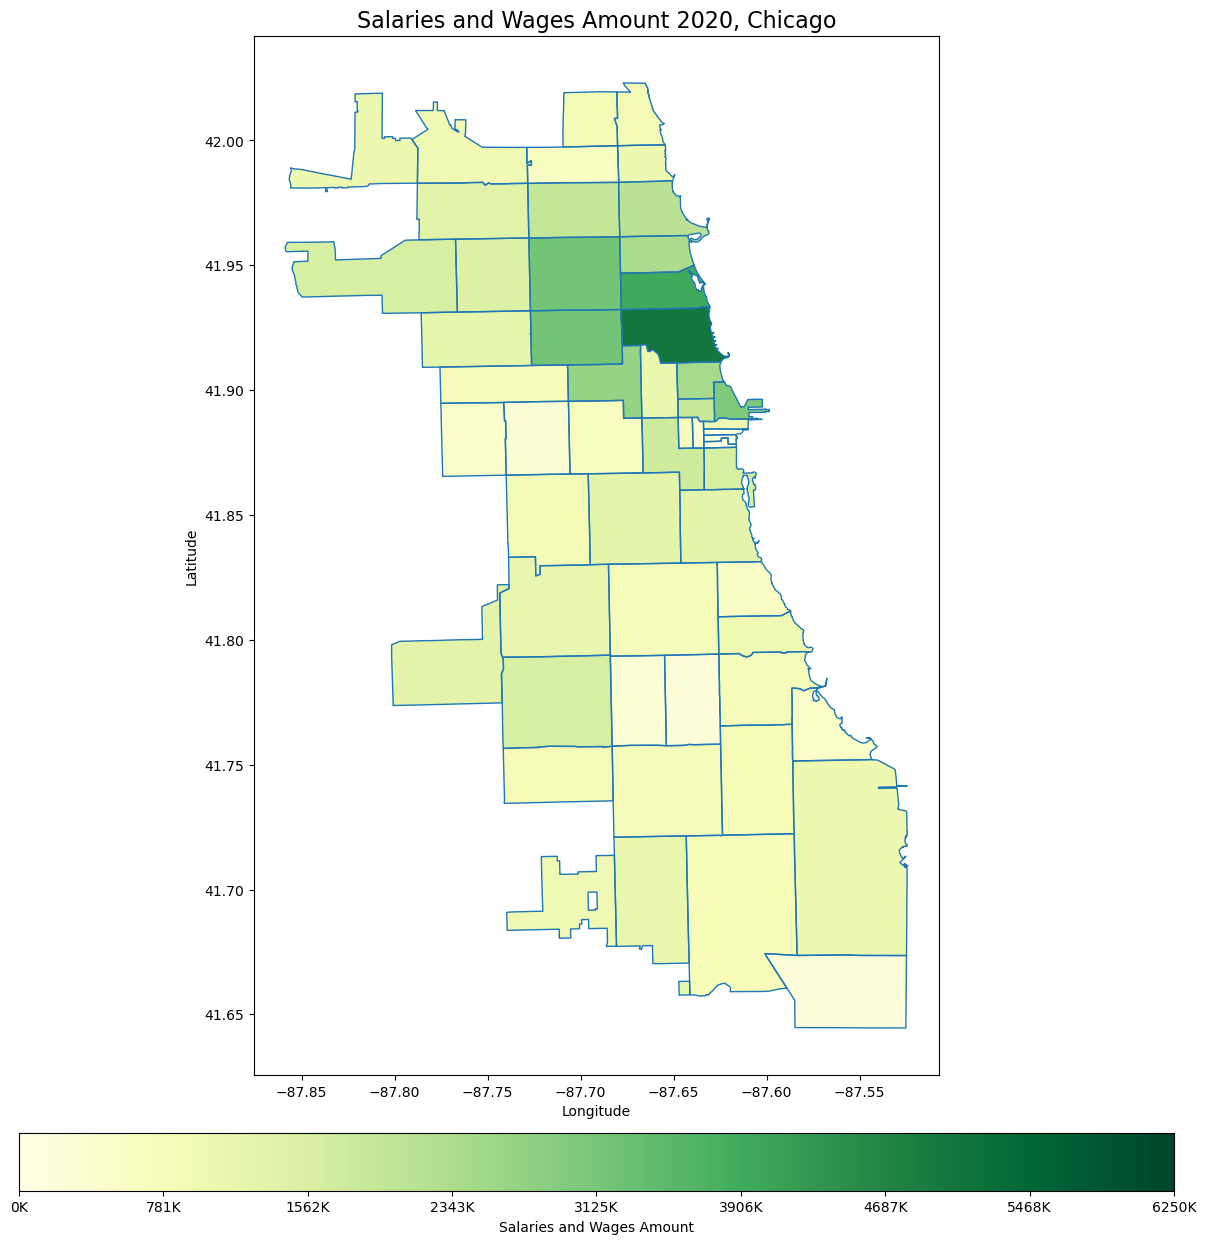

In [33]:
# Filter out ZIP codes without values
merged = merged.dropna(subset=['A00200'])

# Define color range and normalization
norm = mcolors.Normalize(vmin=0, vmax=6250000)  # 8,000K = 8,000,000

fig, ax = plt.subplots(1, figsize=(15, 15))

# Plot the ZIP code boundaries for those with values
merged.boundary.plot(ax=ax, linewidth=1)

# Plot the ZIP codes colored by income, but without the legend
cax = merged.plot(column='A00200', ax=ax, legend=False, norm=norm, cmap='YlGn')

# Create a horizontal colorbar at the bottom
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='YlGn'), ax=ax, orientation='horizontal', fraction=0.05, pad=0.05)
ticks = np.linspace(0, 6250000, 9)
cbar.set_ticks(ticks)
cbar.set_ticklabels([f'{int(tick/1000)}K' for tick in ticks])
cbar.set_label('Salaries and Wages Amount')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Salaries and Wages Amount 2020, Chicago', fontsize=16)
plt.show()


In [34]:
df['A00200'].dtypes

dtype('float64')

In [35]:
df['A00200'].median()

1012951.0

In [36]:
df['AGI_STUB']

5773    0
5774    0
5775    0
5776    0
5777    0
5778    0
5779    0
5780    0
5781    0
5782    0
5783    0
5784    0
5785    0
5786    0
5787    0
5788    0
5789    0
5790    0
5791    0
5792    0
5793    0
5794    0
5795    0
5796    0
5797    0
5798    0
5799    0
5800    0
5801    0
5802    0
5803    0
5804    0
5805    0
5806    0
5807    0
5808    0
5809    0
5810    0
5811    0
5812    0
5813    0
5814    0
5815    0
5816    0
5817    0
5818    0
5819    0
5820    0
5821    0
5822    0
5823    0
5825    0
5826    0
5827    0
5828    0
Name: AGI_STUB, dtype: int64

In [37]:
df15 = pd.read_csv('2015 Tax Income.csv')

In [38]:
#df15

In [39]:
df15=df15[df15['STATE']=='IL']

In [40]:
df15.to_parquet('IL_Tax_Data.parquet15')

In [41]:
df15=pd.read_parquet('IL_Tax_Data.parquet15')

In [42]:
df15= df15[df15['ZIPCODE'].isin(chicago_zipcodes)]

In [43]:
df15.dtypes

STATEFIPS      int64
STATE         object
ZIPCODE        int64
AGI_STUB       int64
N1           float64
              ...   
A85300       float64
N11901       float64
A11901       float64
N11902       float64
A11902       float64
Length: 131, dtype: object

In [44]:
df['A02650'].dtype

dtype('float64')

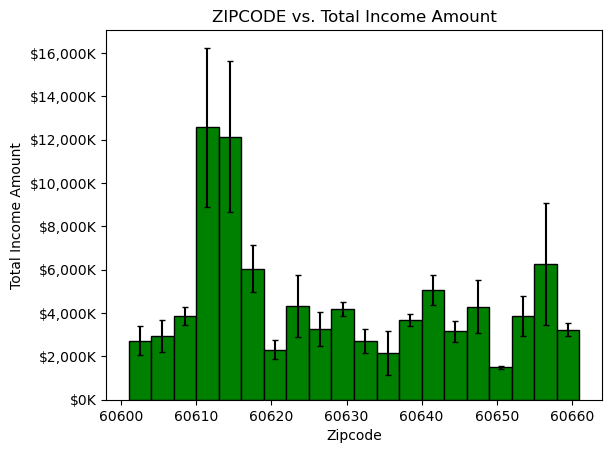

In [45]:
fig, ax = plt.subplots()

n, bins, patches = ax.hist(
    x=df15['ZIPCODE'],
    weights=df15['A02650'],
    color='green',
    edgecolor='black',
    bins=20  # Adjust the number of bins as needed
)

# Calculate the bin centers
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Calculate the standard deviation of the Total Income Amount within each bin
bin_std = []
for i in range(len(bins)-1):
    bin_data = df15.loc[(df15['ZIPCODE'] >= bins[i]) & (df15['ZIPCODE'] < bins[i+1]), 'A02650']
    bin_std.append(bin_data.std())

# Plot the error bars
ax.errorbar(
    x=bin_centers,
    y=n,
    yerr=bin_std,
    fmt='none',
    color='black',
    capsize=2
)

# Define the formatter function to display thousands of dollars
def thousands_formatter(x, pos):
    return '${:,.0f}K'.format(x/1000)

# Set the y-axis ticker to use the custom formatter
ax.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

# Set labels and title
ax.set_title('ZIPCODE vs. Total Income Amount')
ax.set_xlabel('Zipcode')
ax.set_ylabel('Total Income Amount')

plt.show()

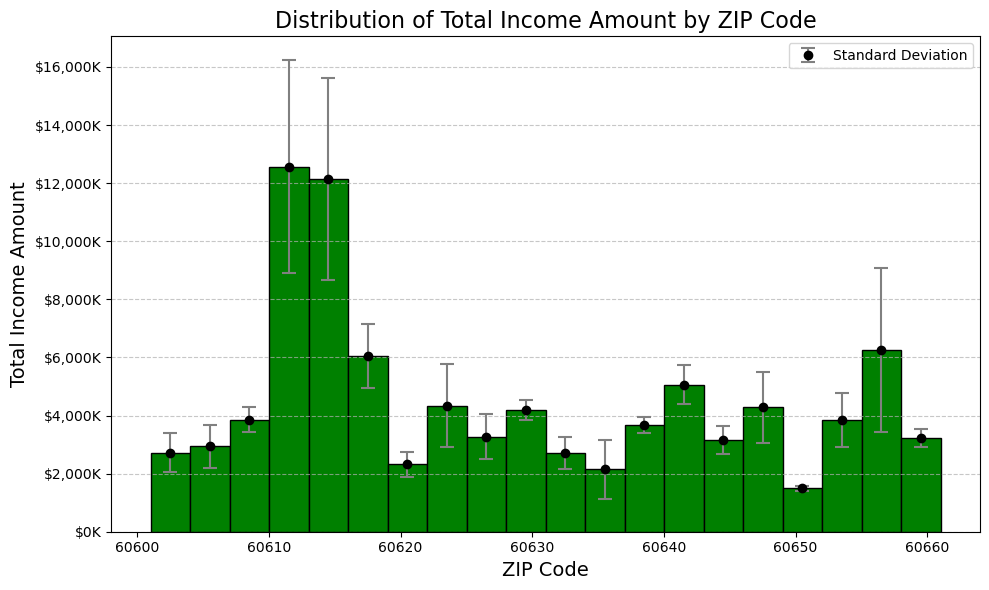

In [46]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the histogram of Total Income Amount based on ZIP codes
n, bins, patches = ax.hist(
    x=df15['ZIPCODE'],
    weights=df15['A02650'],
    color='green',
    edgecolor='black',
    bins=20  # You can fine-tune the number of bins for better representation
)

# Calculate the bin centers
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Calculate the standard deviation of Total Income Amount within each bin
bin_std = [df15.loc[(df15['ZIPCODE'] >= bins[i]) & (df15['ZIPCODE'] < bins[i+1]), 'A02650'].std() for i in range(len(bins)-1)]

# Plot the error bars with custom styling
ax.errorbar(
    x=bin_centers,
    y=n,
    yerr=bin_std,
    fmt='o',
    color='black',
    ecolor='gray',  # Color of error bars
    elinewidth=1.5,  # Line width of error bars
    capsize=5,  # Size of the caps on error bars
    capthick=1.5,  # Thickness of the caps on error bars
    label='Standard Deviation'
)

# Define the formatter function to display thousands of dollars
def thousands_formatter(x, pos):
    return '${:,.0f}K'.format(x/1000)

# Set the y-axis ticker to use the custom formatter
ax.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

# Set labels, title, and legend
ax.set_title('Distribution of Total Income Amount by ZIP Code', fontsize=16)
ax.set_xlabel('ZIP Code', fontsize=14)
ax.set_ylabel('Total Income Amount', fontsize=14)
ax.legend()

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Fine-tune layout for better aesthetics
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\keyan\.conda\envs\my-env\lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


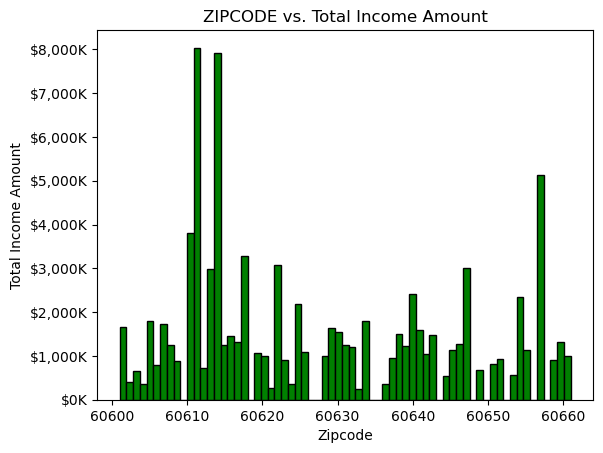

In [47]:
fig, ax = plt.subplots()

# Define the number of bins and the range for binning
num_bins = 67 # Adjust the number of bins as needed
bin_range = (df15['ZIPCODE'].min(), df15['ZIPCODE'].max())

# Create bins using pandas.cut
df15['bins'] = pd.cut(df15['ZIPCODE'], bins=num_bins, include_lowest=True)

# Group data by bins and calculate the mean and standard deviation for each bin
bin_stats = df15.groupby('bins')['A02650'].agg(['mean', 'std'])

# Plot the histogram
n, bins, patches = ax.hist(
    x=df15['ZIPCODE'],
    weights=df15['A02650'],
    color='green',
    edgecolor='black',
    bins=num_bins,
)

# Calculate the bin centers
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Get the standard deviation values from the bin_stats DataFrame
bin_std = bin_stats['std'].values

# Plot the error bars
ax.errorbar(
    x=bin_centers,
    y=n,
    yerr=bin_std,
    fmt='none',
    color='black',
    capsize=10
)

# Define the formatter function to display thousands of dollars
def thousands_formatter(x, pos):
    return '${:,.0f}K'.format(x/1000)

# Set the y-axis ticker to use the custom formatter
ax.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

# Set labels and title
ax.set_title('ZIPCODE vs. Total Income Amount')
ax.set_xlabel('Zipcode')
ax.set_ylabel('Total Income Amount')

plt.show()

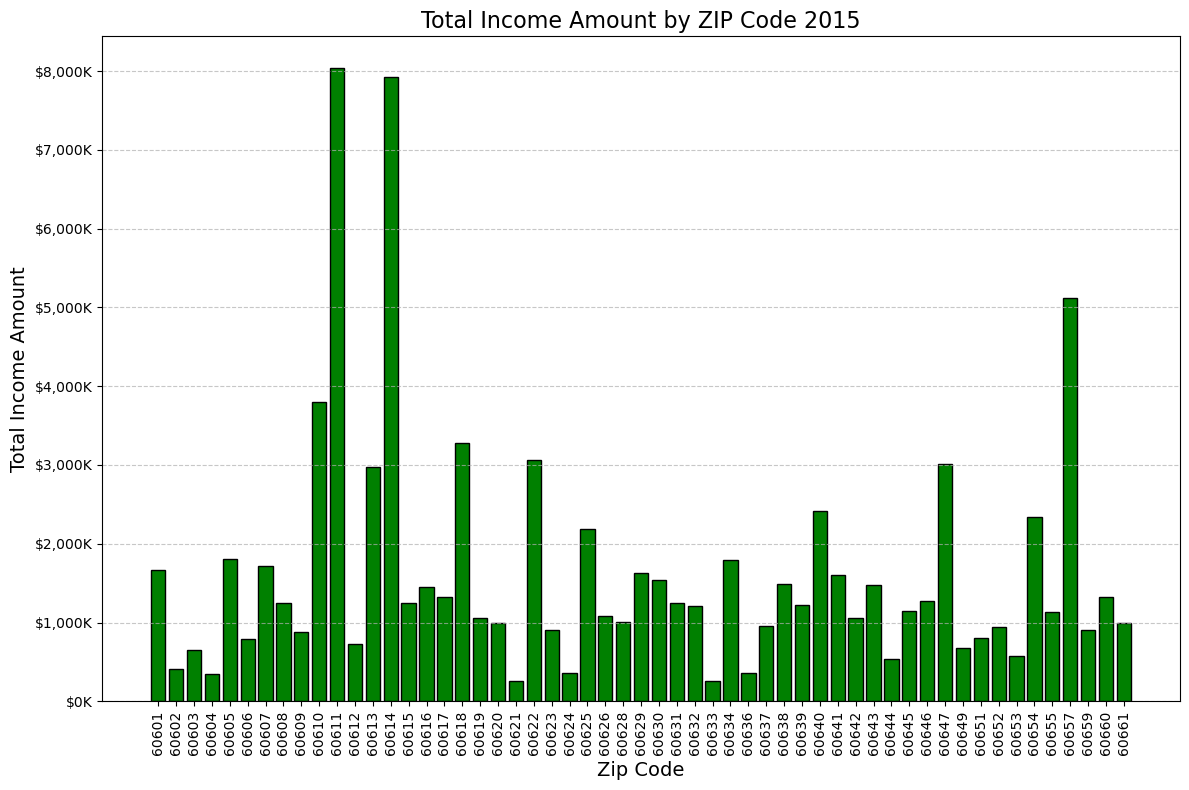

In [48]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

# Create a new figure and axis with adjusted size and aspect ratio
fig, ax = plt.subplots(figsize=(12, 8))

# Group data by ZIPCODE and get the sum of 'A00200' for each ZIP code
zip_stats = df15.groupby('ZIPCODE')['A02650'].sum()

# Get the ZIP codes and their corresponding total income amounts
zip_codes = zip_stats.index.astype(int)
total_income = zip_stats.values

# Create a bar for each ZIP code
ax.bar(range(len(zip_codes)), total_income, color='green', edgecolor='black')

# Define the formatter function to display thousands of dollars
def thousands_formatter(x, pos):
    return '${:,.0f}K'.format(x/1000)

# Set the y-axis ticker to use the custom formatter
ax.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

# Set x-axis labels to be the ZIP codes
ax.set_xticks(range(len(zip_codes)))
ax.set_xticklabels(zip_codes, rotation=90, fontsize=10)

# Set labels, title, and legend with adjusted font sizes
ax.set_title('Total Income Amount by ZIP Code 2015', fontsize=16)
ax.set_xlabel('Zip Code', fontsize=14)
ax.set_ylabel('Total Income Amount', fontsize=14)

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Fine-tune layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


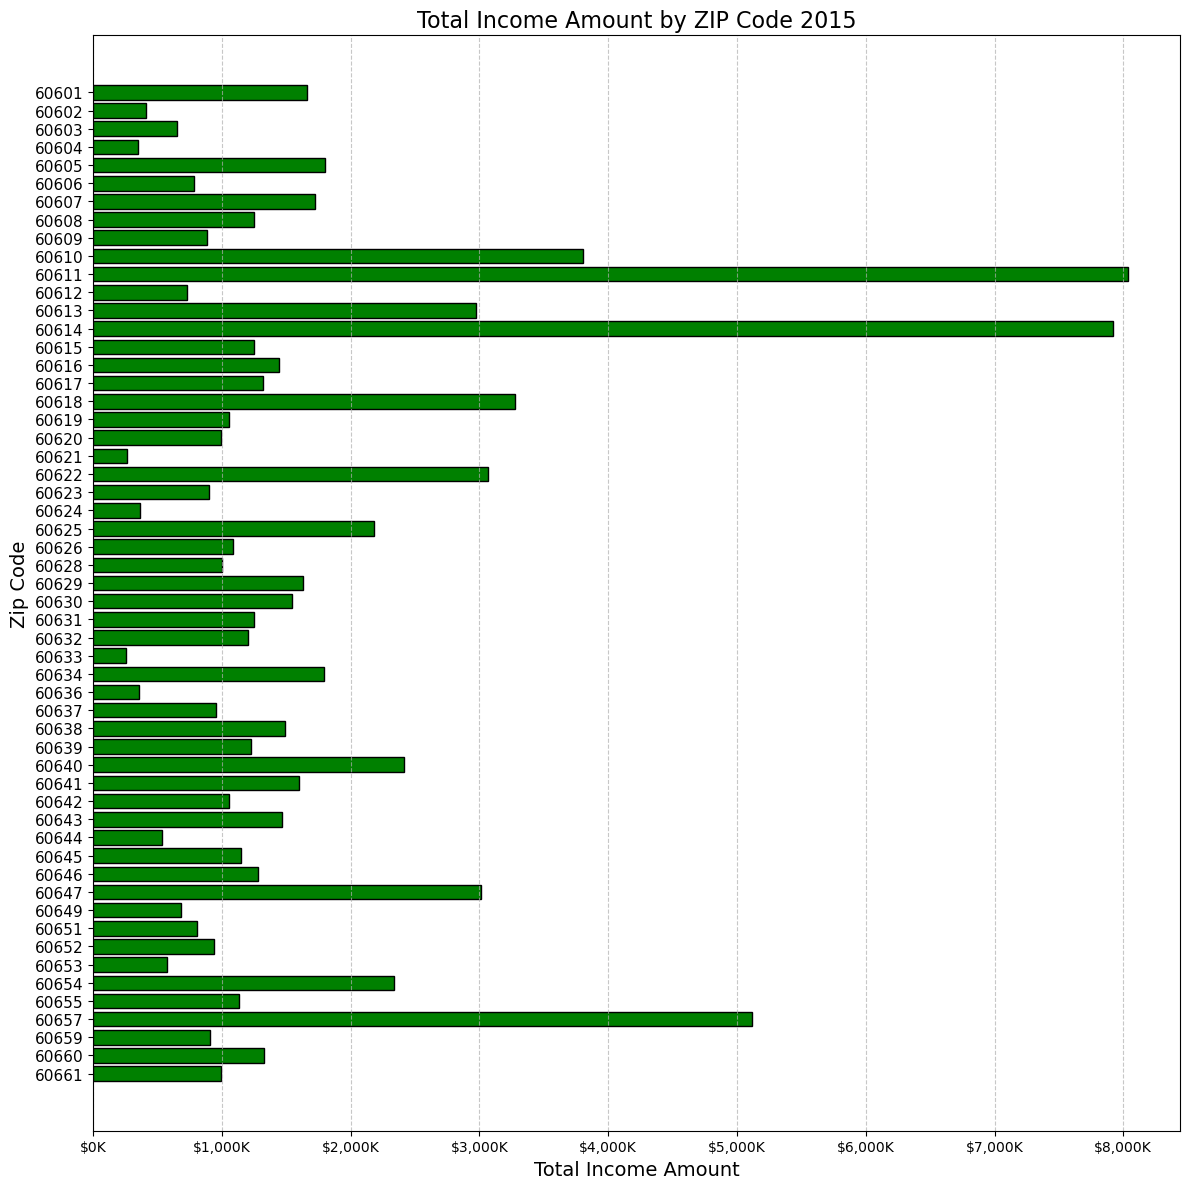

In [49]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

# Create a new figure and axis with adjusted size and aspect ratio
fig, ax = plt.subplots(figsize=(12, 12))

# Group data by ZIPCODE and get the sum of 'A00200' for each ZIP code
zip_stats = df15.groupby('ZIPCODE')['A02650'].sum()

# Get the ZIP codes and their corresponding total income amounts
zip_codes = zip_stats.index.astype(int)
total_income = zip_stats.values

# Create a horizontal bar for each ZIP code
ax.barh(range(len(zip_codes)), total_income, color='green', edgecolor='black')

# Set the x-axis ticker to use the custom formatter
def thousands_formatter(x, pos):
    return '${:,.0f}K'.format(x/1000)

ax.xaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

# Set y-axis labels to be the ZIP codes
ax.set_yticks(range(len(zip_codes)))
ax.set_yticklabels(zip_codes, fontsize=11)

# Set labels, title, and legend with adjusted font sizes
ax.set_title('Total Income Amount by ZIP Code 2015', fontsize=16)
ax.set_xlabel('Total Income Amount', fontsize=14)
ax.set_ylabel('Zip Code', fontsize=14)

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Invert the y-axis to display ZIP codes in ascending order
ax.invert_yaxis()

# Fine-tune layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

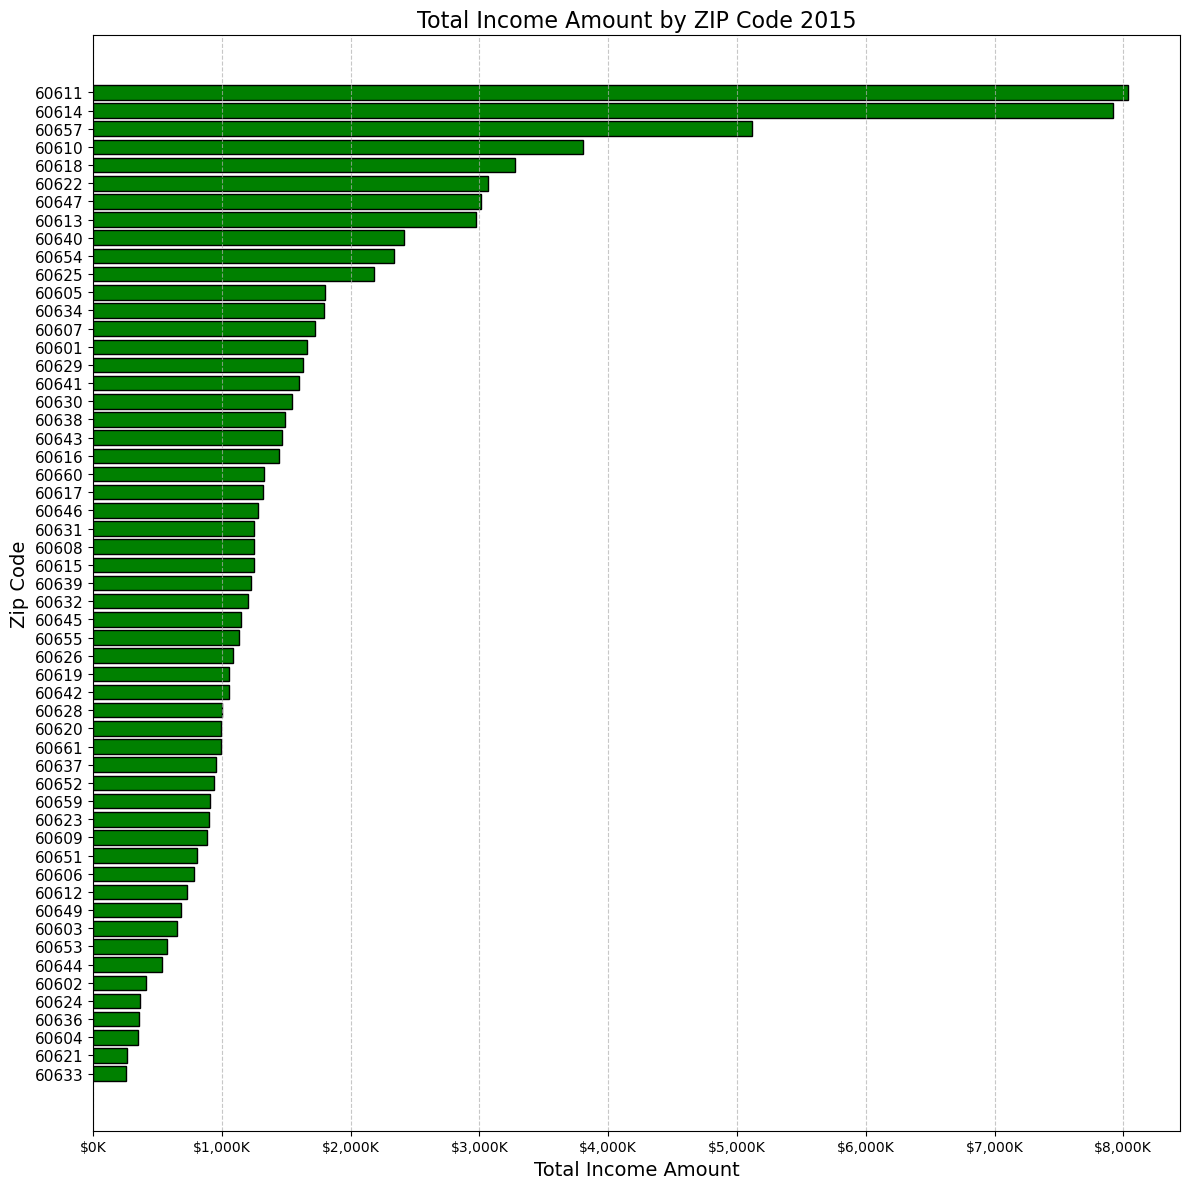

In [50]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

# Create a new figure and axis with adjusted size and aspect ratio
fig, ax = plt.subplots(figsize=(12, 12))

# Group data by ZIPCODE and get the sum of 'A00200' for each ZIP code
zip_stats = df15.groupby('ZIPCODE')['A02650'].sum()

# Sort the ZIP codes and total income in descending order
zip_stats = zip_stats.sort_values(ascending=False)

# Get the ZIP codes and their corresponding total income amounts
zip_codes = zip_stats.index.astype(int)
total_income = zip_stats.values

# Create a horizontal bar for each ZIP code
ax.barh(range(len(zip_codes)), total_income, color='green', edgecolor='black')

# Set the x-axis ticker to use the custom formatter
def thousands_formatter(x, pos):
    return '${:,.0f}K'.format(x/1000)

ax.xaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

# Set y-axis labels to be the ZIP codes
ax.set_yticks(range(len(zip_codes)))
ax.set_yticklabels(zip_codes, fontsize=11)

# Set labels, title, and legend with adjusted font sizes
ax.set_title('Total Income Amount by ZIP Code 2015', fontsize=16)
ax.set_xlabel('Total Income Amount', fontsize=14)
ax.set_ylabel('Zip Code', fontsize=14)

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Invert the y-axis to display ZIP codes in ascending order
ax.invert_yaxis()

# Fine-tune layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [51]:
overlap = chicago_zip_map.columns.intersection(df.columns)
print(overlap)

Index(['A02650'], dtype='object')


In [52]:
# Ensure ZIP codes are of the same data type in both DataFrames
chicago_zip_map['zip'] = chicago_zip_map['zip'].astype(str)
df15['ZIPCODE'] = df15['ZIPCODE'].astype(str)

# Merge the data
merged15 = chicago_zip_map.set_index('zip').join(df15.set_index('ZIPCODE'), lsuffix='_left', rsuffix='_right')


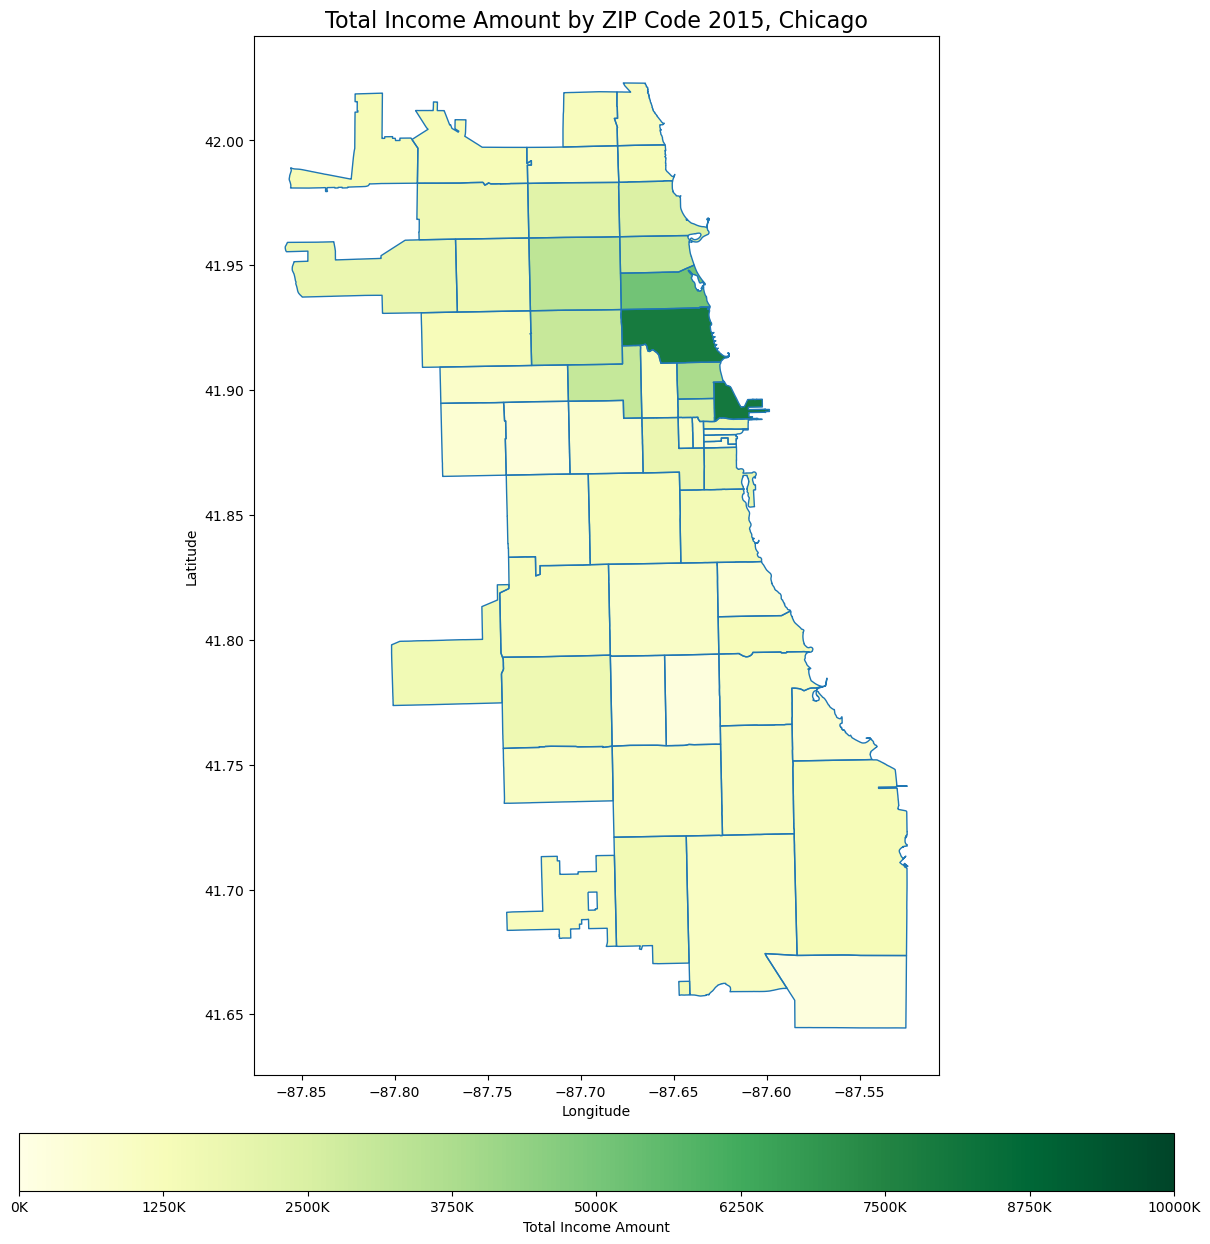

In [53]:
# Filter out ZIP codes without values
merged15 = merged15.dropna(subset=['A02650_right'])

# Define color range and normalization
norm = mcolors.Normalize(vmin=0, vmax=10000000) 

fig, ax = plt.subplots(1, figsize=(15, 15))

# Plot the ZIP code boundaries for those with values
merged15.boundary.plot(ax=ax, linewidth=1)

# Plot the ZIP codes colored by income, but without the legend
cax = merged15.plot(column='A02650_right', ax=ax, legend=False, norm=norm, cmap='YlGn')

# Create a horizontal colorbar at the bottom
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='YlGn'), ax=ax, orientation='horizontal', fraction=0.05, pad=0.05)
ticks = np.linspace(0, 10000000, 9)
cbar.set_ticks(ticks)
cbar.set_ticklabels([f'{int(tick/1000)}K' for tick in ticks])
cbar.set_label('Total Income Amount')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Total Income Amount by ZIP Code 2015, Chicago', fontsize=16)
plt.show()

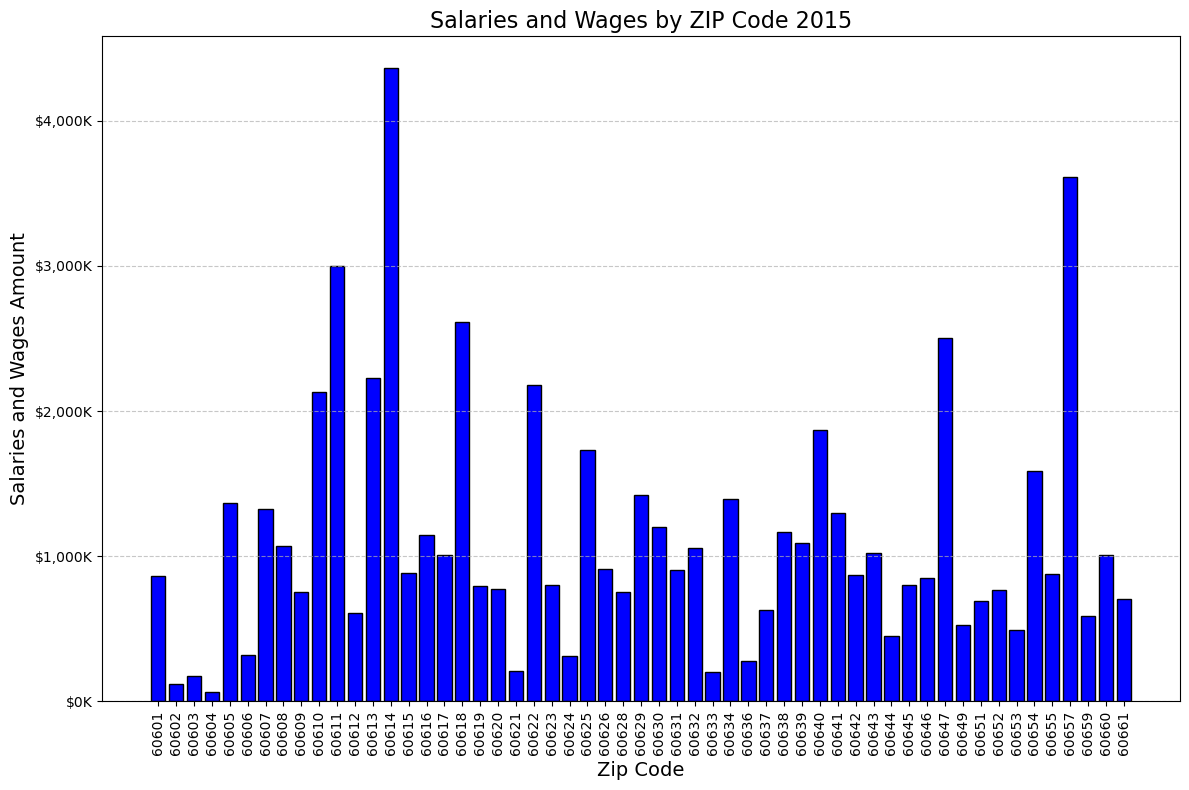

In [54]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

# Create a new figure and axis with adjusted size and aspect ratio
fig, ax = plt.subplots(figsize=(12, 8))

# Group data by ZIPCODE and get the sum of 'A00200' for each ZIP code
zip_stats = df15.groupby('ZIPCODE')['A00200'].sum()

# Get the ZIP codes and their corresponding total income amounts
zip_codes = zip_stats.index.astype(int)
total_income = zip_stats.values

# Create a bar for each ZIP code
ax.bar(range(len(zip_codes)), total_income, color='blue', edgecolor='black')

# Define the formatter function to display thousands of dollars
def thousands_formatter(x, pos):
    return '${:,.0f}K'.format(x/1000)

# Set the y-axis ticker to use the custom formatter
ax.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

# Set x-axis labels to be the ZIP codes
ax.set_xticks(range(len(zip_codes)))
ax.set_xticklabels(zip_codes, rotation=90, fontsize=10)

# Set labels, title, and legend with adjusted font sizes
ax.set_title('Salaries and Wages by ZIP Code 2015', fontsize=16)
ax.set_xlabel('Zip Code', fontsize=14)
ax.set_ylabel('Salaries and Wages Amount', fontsize=14)

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Fine-tune layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


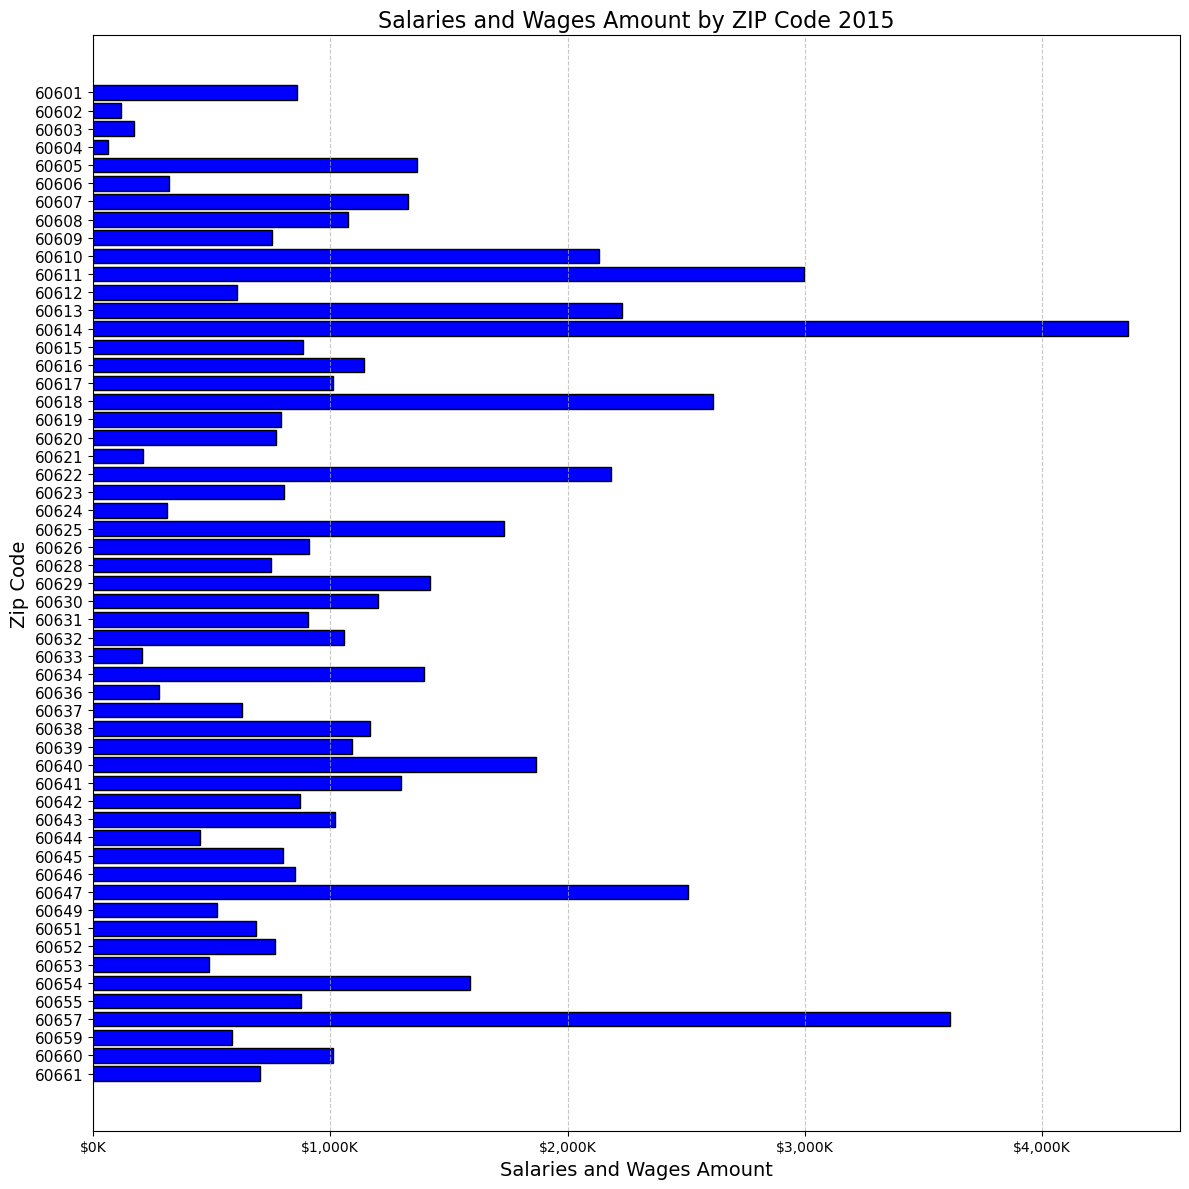

In [55]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

# Create a new figure and axis with adjusted size and aspect ratio
fig, ax = plt.subplots(figsize=(12, 12))

# Group data by ZIPCODE and get the sum of 'A00200' for each ZIP code
zip_stats = df15.groupby('ZIPCODE')['A00200'].sum()

# Get the ZIP codes and their corresponding total income amounts
zip_codes = zip_stats.index.astype(int)
total_income = zip_stats.values

# Create a horizontal bar for each ZIP code
ax.barh(range(len(zip_codes)), total_income, color='blue', edgecolor='black')

# Set the x-axis ticker to use the custom formatter
def thousands_formatter(x, pos):
    return '${:,.0f}K'.format(x/1000)

ax.xaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

# Set y-axis labels to be the ZIP codes
ax.set_yticks(range(len(zip_codes)))
ax.set_yticklabels(zip_codes, fontsize=11)

# Set labels, title, and legend with adjusted font sizes
ax.set_title('Salaries and Wages Amount by ZIP Code 2015', fontsize=16)
ax.set_xlabel('Salaries and Wages Amount', fontsize=14)
ax.set_ylabel('Zip Code', fontsize=14)

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Invert the y-axis to display ZIP codes in ascending order
ax.invert_yaxis()

# Fine-tune layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

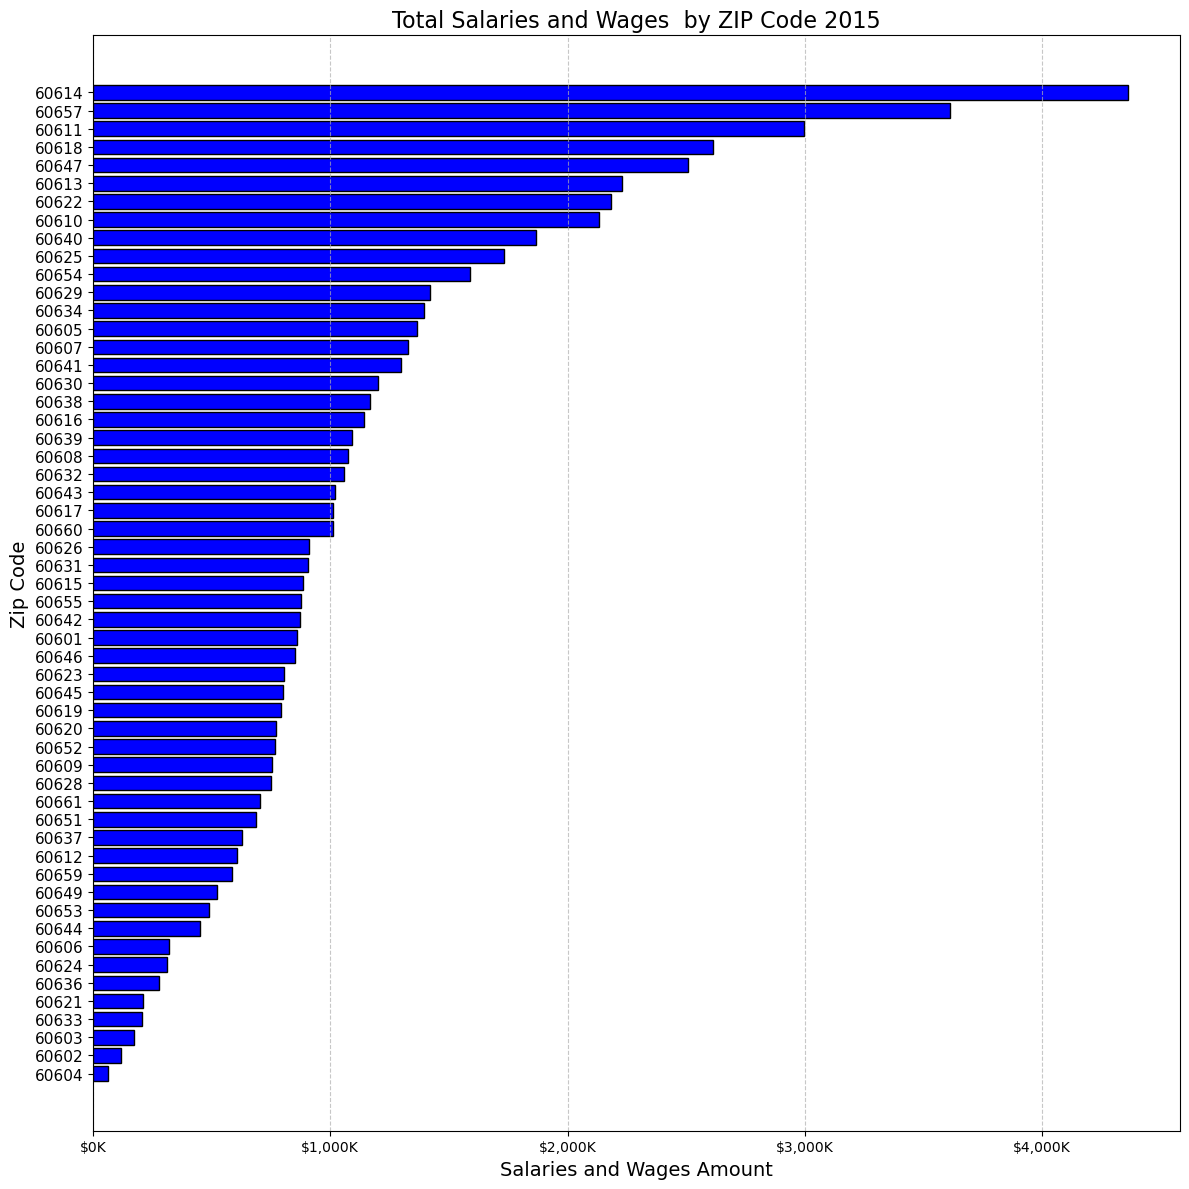

In [56]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

# Create a new figure and axis with adjusted size and aspect ratio
fig, ax = plt.subplots(figsize=(12, 12))

# Group data by ZIPCODE and get the sum of 'A00200' for each ZIP code
zip_stats = df15.groupby('ZIPCODE')['A00200'].sum()

# Sort the ZIP codes and total income in descending order
zip_stats = zip_stats.sort_values(ascending=False)

# Get the ZIP codes and their corresponding total income amounts
zip_codes = zip_stats.index.astype(int)
total_income = zip_stats.values

# Create a horizontal bar for each ZIP code
ax.barh(range(len(zip_codes)), total_income, color='blue', edgecolor='black')

# Set the x-axis ticker to use the custom formatter
def thousands_formatter(x, pos):
    return '${:,.0f}K'.format(x/1000)

ax.xaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

# Set y-axis labels to be the ZIP codes
ax.set_yticks(range(len(zip_codes)))
ax.set_yticklabels(zip_codes, fontsize=11)

# Set labels, title, and legend with adjusted font sizes
ax.set_title('Total Salaries and Wages  by ZIP Code 2015', fontsize=16)
ax.set_xlabel('Salaries and Wages Amount', fontsize=14)
ax.set_ylabel('Zip Code', fontsize=14)

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Invert the y-axis to display ZIP codes in ascending order
ax.invert_yaxis()

# Fine-tune layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


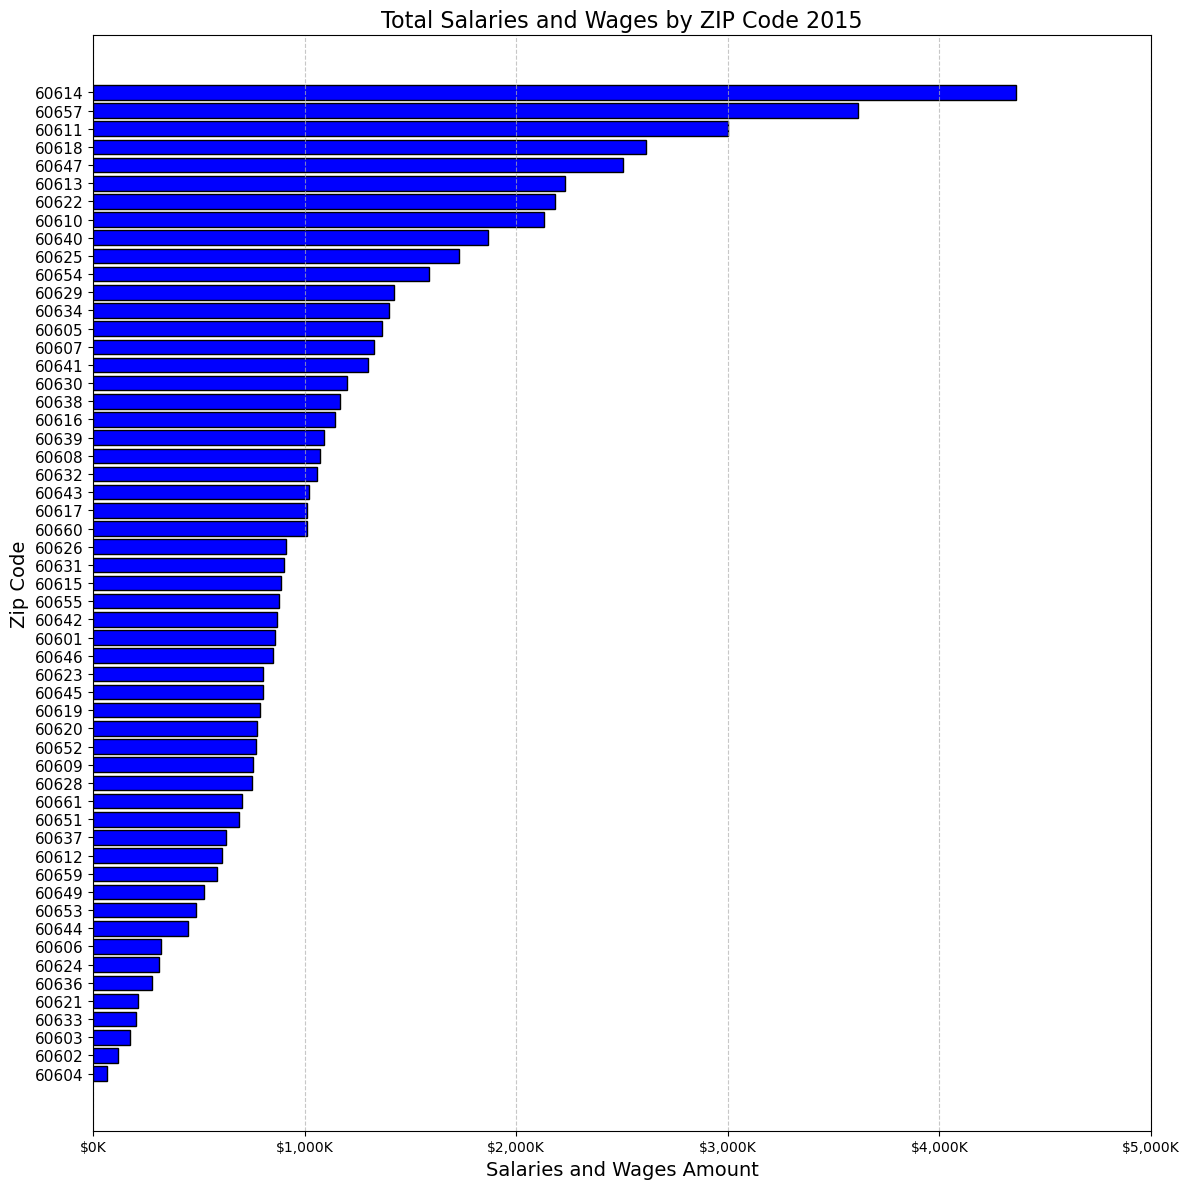

In [57]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

# Create a new figure and axis with adjusted size and aspect ratio
fig, ax = plt.subplots(figsize=(12, 12))

# Group data by ZIPCODE and get the sum of 'A00200' for each ZIP code
zip_stats = df15.groupby('ZIPCODE')['A00200'].sum()

# Sort the ZIP codes and total income in descending order
zip_stats = zip_stats.sort_values(ascending=False)

# Get the ZIP codes and their corresponding total income amounts
zip_codes = zip_stats.index.astype(int)
total_income = zip_stats.values

# Create a horizontal bar for each ZIP code
ax.barh(range(len(zip_codes)), total_income, color='blue', edgecolor='black')

# Set the x-axis ticker to use the custom formatter
def thousands_formatter(x, pos):
    return '${:,.0f}K'.format(x/1000)

ax.xaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

# Set y-axis labels to be the ZIP codes
ax.set_yticks(range(len(zip_codes)))
ax.set_yticklabels(zip_codes, fontsize=11)

# Set labels, title, and legend with adjusted font sizes
ax.set_title('Total Salaries and Wages by ZIP Code 2015', fontsize=16)
ax.set_xlabel('Salaries and Wages Amount', fontsize=14)
ax.set_ylabel('Zip Code', fontsize=14)

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Invert the y-axis to display ZIP codes in ascending order
ax.invert_yaxis()

# Set the x-axis domain to be up to 5,000K
ax.set_xlim(0, 5000000)

# Fine-tune layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


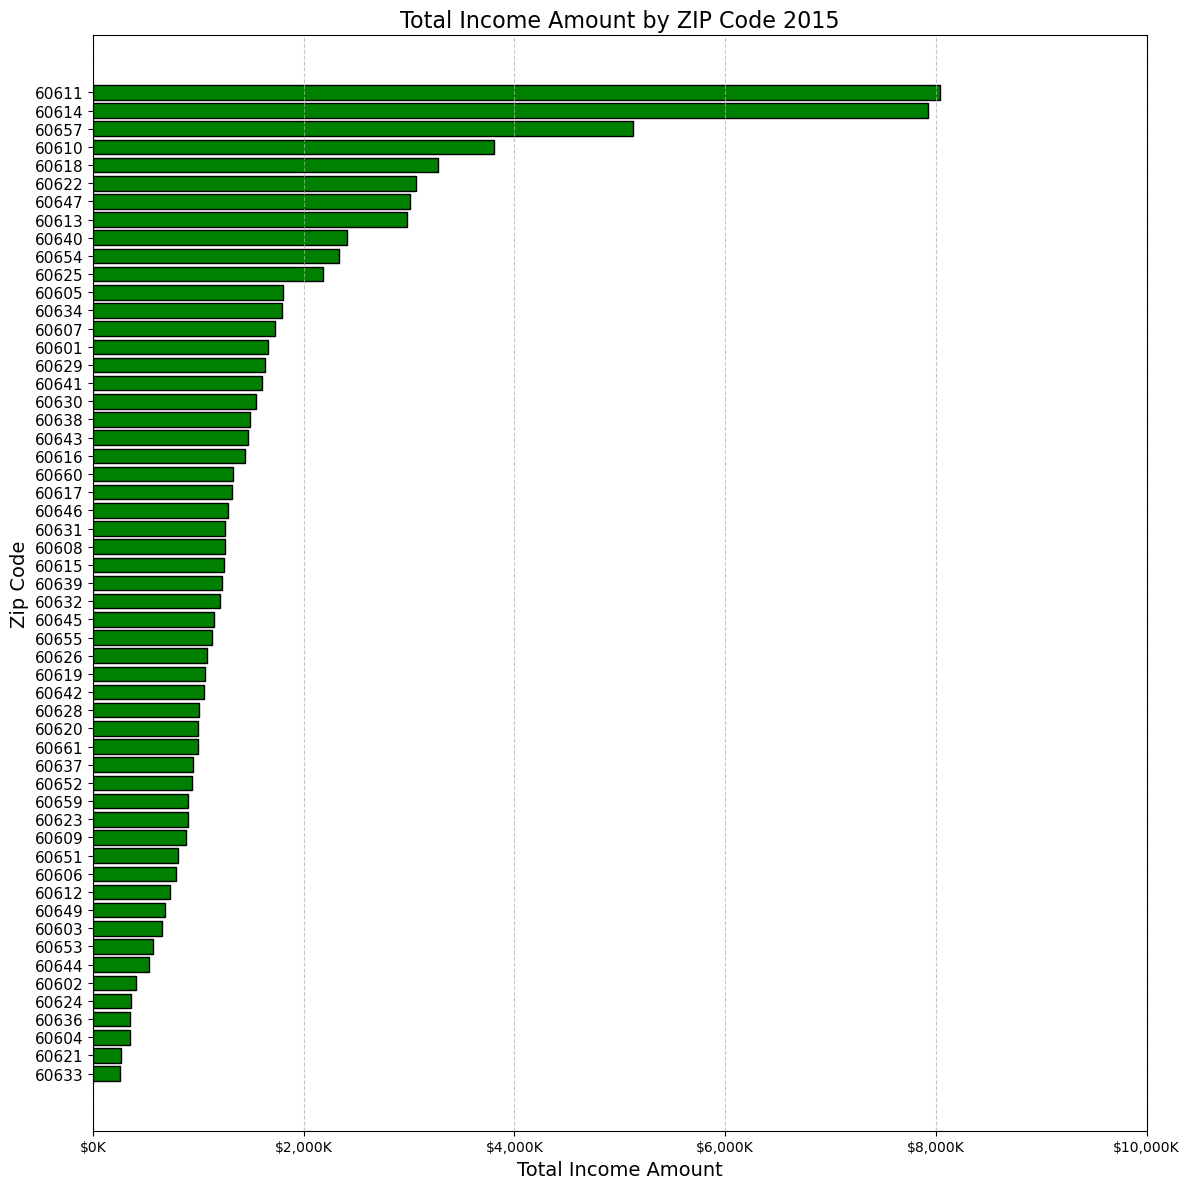

In [58]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

# Create a new figure and axis with adjusted size and aspect ratio
fig, ax = plt.subplots(figsize=(12, 12))

# Group data by ZIPCODE and get the sum of 'A00200' for each ZIP code
zip_stats = df15.groupby('ZIPCODE')['A02650'].sum()

# Sort the ZIP codes and total income in descending order
zip_stats = zip_stats.sort_values(ascending=False)

# Get the ZIP codes and their corresponding total income amounts
zip_codes = zip_stats.index.astype(int)
total_income = zip_stats.values

# Create a horizontal bar for each ZIP code
ax.barh(range(len(zip_codes)), total_income, color='green', edgecolor='black')

# Set the x-axis ticker to use the custom formatter
def thousands_formatter(x, pos):
    return '${:,.0f}K'.format(x/1000)

ax.xaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

# Set y-axis labels to be the ZIP codes
ax.set_yticks(range(len(zip_codes)))
ax.set_yticklabels(zip_codes, fontsize=11)

# Set labels, title, and legend with adjusted font sizes
ax.set_title('Total Income Amount by ZIP Code 2015', fontsize=16)
ax.set_xlabel('Total Income Amount', fontsize=14)
ax.set_ylabel('Zip Code', fontsize=14)

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Invert the y-axis to display ZIP codes in ascending order
ax.invert_yaxis()

# Set the x-axis domain to be up to 10,000K
ax.set_xlim(0, 10000000)

# Fine-tune layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


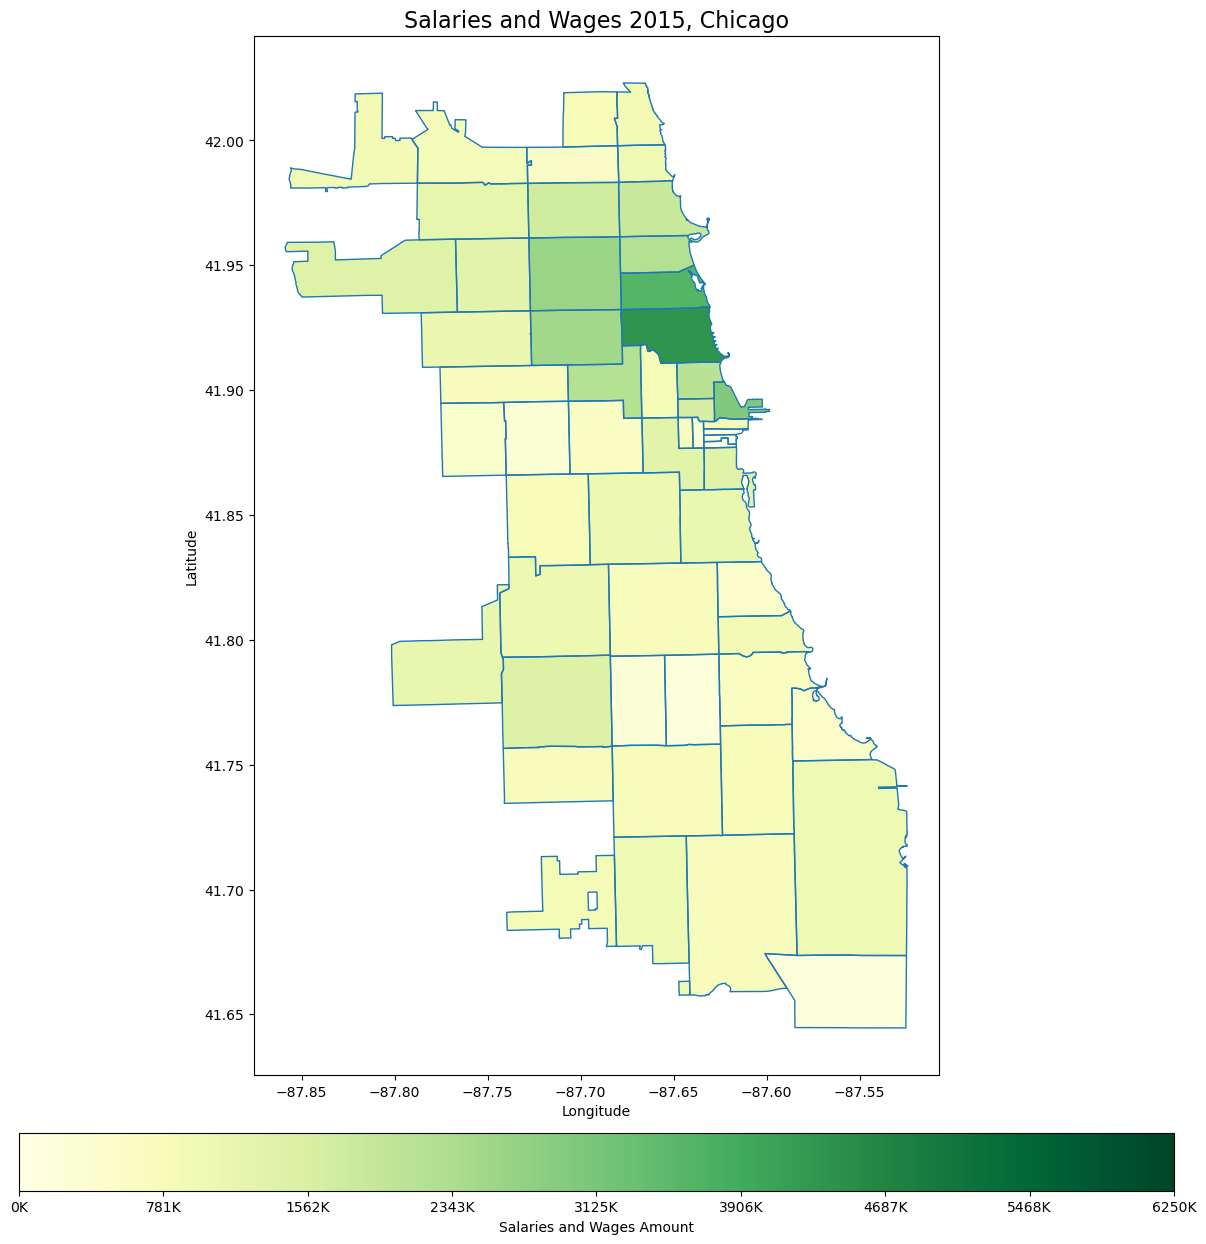

In [59]:
# Filter out ZIP codes without values
merged15 = merged15.dropna(subset=['A00200'])

# Define color range and normalization
norm = mcolors.Normalize(vmin=0, vmax=6250000) 

fig, ax = plt.subplots(1, figsize=(15, 15))

# Plot the ZIP code boundaries for those with values
merged15.boundary.plot(ax=ax, linewidth=1)

# Plot the ZIP codes colored by income, but without the legend
cax = merged15.plot(column='A00200', ax=ax, legend=False, norm=norm, cmap='YlGn')

# Create a horizontal colorbar at the bottom
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='YlGn'), ax=ax, orientation='horizontal', fraction=0.05, pad=0.05)
ticks = np.linspace(0, 6250000, 9)
cbar.set_ticks(ticks)
cbar.set_ticklabels([f'{int(tick/1000)}K' for tick in ticks])
cbar.set_label('Salaries and Wages Amount')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Salaries and Wages 2015, Chicago', fontsize=16)
plt.show()

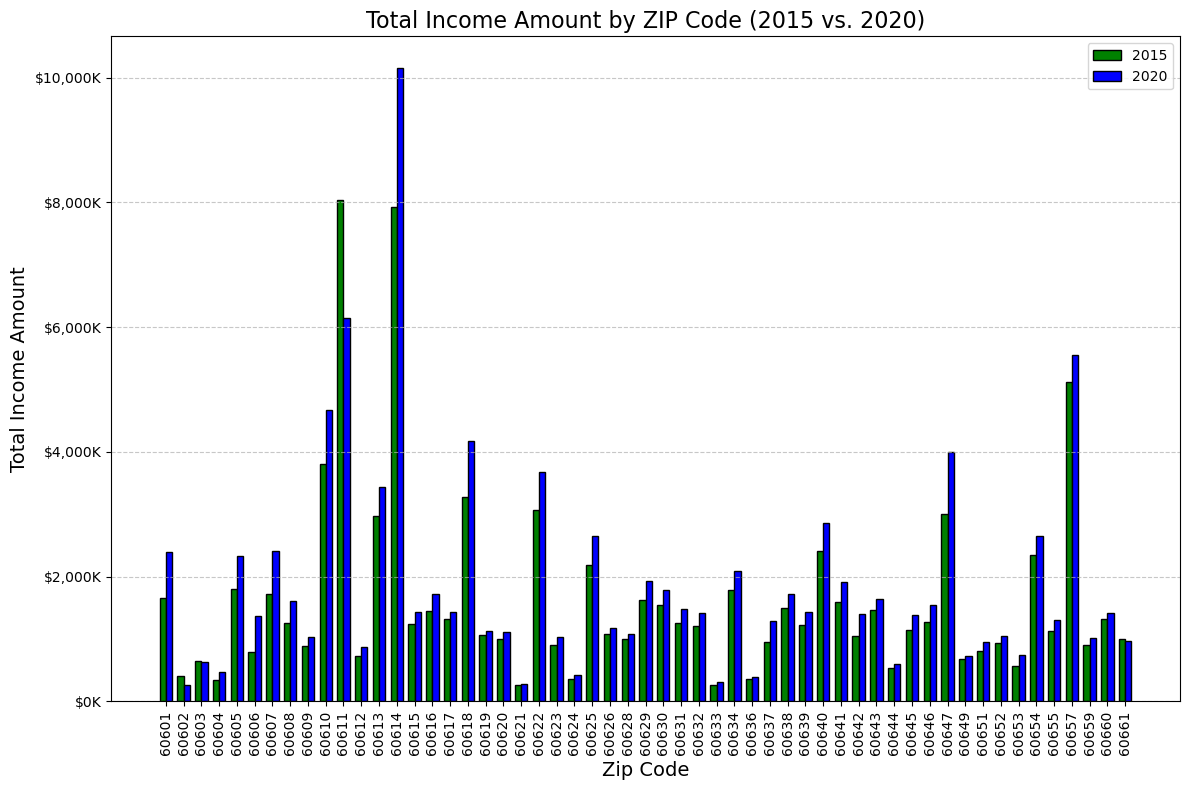

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a new figure and axis with adjusted size and aspect ratio
fig, ax = plt.subplots(figsize=(12, 8))

# Group data by ZIPCODE and get the sum of 'A02650' for each ZIP code for both years
zip_stats_2015 = df15.groupby('ZIPCODE')['A02650'].sum()
zip_stats_2020 = df.groupby('ZIPCODE')['A02650'].sum()

# Get the ZIP codes
zip_codes = zip_stats_2015.index.astype(int)

# Set the width of each bar
bar_width = 0.35

# Create bars for 2015 data
bar1 = ax.bar(range(len(zip_codes)), zip_stats_2015.values, bar_width, color='green', edgecolor='black', label='2015')

# Create bars for 2020 data
bar2 = ax.bar([i + bar_width for i in range(len(zip_codes))], zip_stats_2020.values, bar_width, color='blue', edgecolor='black', label='2020')

# Set x-axis labels to be the ZIP codes
ax.set_xticks([i + bar_width / 2 for i in range(len(zip_codes))])
ax.set_xticklabels(zip_codes, rotation=90, fontsize=10)

# Define the formatter function to display thousands of dollars
def thousands_formatter(x, pos):
    return '${:,.0f}K'.format(x/1000)

# Set the y-axis ticker to use the custom formatter
ax.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

# Set labels, title, and legend with adjusted font sizes
ax.set_title('Total Income Amount by ZIP Code (2015 vs. 2020)', fontsize=16)
ax.set_xlabel('Zip Code', fontsize=14)
ax.set_ylabel('Total Income Amount', fontsize=14)

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend
ax.legend()

# Fine-tune layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()



In [61]:
df

STATEFIPS STATE ZIPCODE  AGI_STUB       N1    MARS1    MARS2    MARS4  \
5773         17    IL   60601         0   8310.0   5940.0   1890.0    260.0   
5774         17    IL   60602         0   1180.0    870.0    230.0     40.0   
5775         17    IL   60603         0   1120.0    800.0    260.0     30.0   
5776         17    IL   60604         0    520.0    370.0    130.0      0.0   
5777         17    IL   60605         0  15590.0  10650.0   3750.0    640.0   
5778         17    IL   60606         0   2740.0   2000.0    610.0     60.0   
5779         17    IL   60607         0  14590.0  10260.0   3160.0    750.0   
5780         17    IL   60608         0  30850.0  18320.0   6610.0   5320.0   
5781         17    IL   60609         0  25020.0  12730.0   5220.0   6740.0   
5782         17    IL   60610         0  23440.0  17960.0   3570.0   1450.0   
5783         17    IL   60611         0  19380.0  13580.0   4740.0    470.0   
5784         17    IL   60612         0  14120.0   7990.0   1880.0   3890.0   
5785         17    IL   60613         0  28400.0  21030.0   5460.0   1190.0   
5786         17    IL   60614         0  34710.0  24330.0   8660.0   1010.0   
5787         17    IL   60615         0  18290.0  11590.0   2840.0   3420.0   
5788         17    IL   60616         0  24720.0  15050.0   6060.0   2970.0   
5789         17    IL   60617         0  34600.0  18350.0   5510.0  10060.0   
5790         17    IL   60618         0  44180.0  26030.0  12180.0   4810.0   
5791         17    IL   60619         0  27890.0  15910.0   1990.0   9340.0   
5792         17    IL   60620         0  29850.0  16510.0   2080.0  10740.0   
5793         17    IL   60621         0  10420.0   5490.0    430.0   4370.0   
5794         17    IL   60622         0  28550.0  19850.0   5980.0   1990.0   
5795         17    IL   60623         0  31700.0  15140.0   5450.0  10750.0   
5796         17    IL   60624         0  14010.0   6920.0    730.0   6200.0   
5797         17    IL   60625         0  35800.0  20870.0  10000.0   4010.0   
5798         17    IL   60626         0  22600.0  15140.0   4200.0   2510.0   
5799         17    IL   60628         0  28570.0  15420.0   2350.0  10290.0   
5800         17    IL   60629         0  50800.0  24610.0  12250.0  13300.0   
5801         17    IL   60630         0  27260.0  14760.0   8950.0   2900.0   
5802         17    IL   60631         0  15260.0   8000.0   5880.0    960.0   
5803         17    IL   60632         0  38400.0  18680.0  10470.0   8780.0   
5804         17    IL   60633         0   6100.0   3160.0   1360.0   1460.0   
5805         17    IL   60634         0  38450.0  20190.0  11890.0   5490.0   
5806         17    IL   60636         0  13450.0   6750.0   1090.0   5450.0   
5807         17    IL   60637         0  18700.0  10320.0   1900.0   6140.0   
5808         17    IL   60638         0  28160.0  14480.0   8330.0   4790.0   
5809         17    IL   60639         0  39160.0  19890.0   8110.0  10580.0   
5810         17    IL   60640         0  34900.0  24990.0   6710.0   2210.0   
5811         17    IL   60641         0  33900.0  18660.0   9060.0   5410.0   
5812         17    IL   60642         0  11730.0   8690.0   2070.0    650.0   
5813         17    IL   60643         0  23670.0  12330.0   4660.0   6000.0   
5814         17    IL   60644         0  18110.0   9320.0   1100.0   7460.0   
5815         17    IL   60645         0  21090.0  10890.0   6790.0   2890.0   
5816         17    IL   60646         0  13530.0   6500.0   5650.0    990.0   
5817         17    IL   60647         0  43700.0  29240.0   8850.0   4580.0   
5818         17    IL   60649         0  18400.0  10760.0   1250.0   6010.0   
5819         17    IL   60651         0  27020.0  14020.0   3390.0   9210.0   
5820         17    IL   60652         0  20920.0  10480.0   4680.0   5260.0   
5821         17    IL   60653         0  13150.0   7060.0   1260.0   4490.0   
5822         17    IL   60654         0  13780.0  11350.

In [62]:
df['ZIPCODE'] = df['ZIPCODE'].astype(str)
df15['ZIPCODE'] = df15['ZIPCODE'].astype(str)
Income_Change_df = pd.merge(df, df15, on='ZIPCODE', suffixes=('_2020', '_2015'))


In [63]:
Income_Change_df = pd.merge(df, df15, on='ZIPCODE', suffixes=('_2020', '_2015'))

In [64]:
Income_Change_df['Income_Change'] = Income_Change_df.A02650_2020 - Income_Change_df.A02650_2015

In [65]:
Income_Change_df

STATEFIPS_2020 STATE_2020 ZIPCODE  AGI_STUB_2020  N1_2020  MARS1_2020  \
0               17         IL   60601              0   8310.0      5940.0   
1               17         IL   60602              0   1180.0       870.0   
2               17         IL   60603              0   1120.0       800.0   
3               17         IL   60604              0    520.0       370.0   
4               17         IL   60605              0  15590.0     10650.0   
5               17         IL   60606              0   2740.0      2000.0   
6               17         IL   60607              0  14590.0     10260.0   
7               17         IL   60608              0  30850.0     18320.0   
8               17         IL   60609              0  25020.0     12730.0   
9               17         IL   60610              0  23440.0     17960.0   
10              17         IL   60611              0  19380.0     13580.0   
11              17         IL   60612              0  14120.0      7990.0   
12              17         IL   60613              0  28400.0     21030.0   
13              17         IL   60614              0  34710.0     24330.0   
14              17         IL   60615              0  18290.0     11590.0   
15              17         IL   60616              0  24720.0     15050.0   
16              17         IL   60617              0  34600.0     18350.0   
17              17         IL   60618              0  44180.0     26030.0   
18              17         IL   60619              0  27890.0     15910.0   
19              17         IL   60620              0  29850.0     16510.0   
20              17         IL   60621              0  10420.0      5490.0   
21              17         IL   60622              0  28550.0     19850.0   
22              17         IL   60623              0  31700.0     15140.0   
23              17         IL   60624              0  14010.0      6920.0   
24              17         IL   60625              0  35800.0     20870.0   
25              17         IL   60626              0  22600.0     15140.0   
26              17         IL   60628              0  28570.0     15420.0   
27              17         IL   60629              0  50800.0     24610.0   
28              17         IL   60630              0  27260.0     14760.0   
29              17         IL   60631              0  15260.0      8000.0   
30              17         IL   60632              0  38400.0     18680.0   
31              17         IL   60633              0   6100.0      3160.0   
32              17         IL   60634              0  38450.0     20190.0   
33              17         IL   60636              0  13450.0      6750.0   
34              17         IL   60637              0  18700.0     10320.0   
35              17         IL   60638              0  28160.0     14480.0   
36              17         IL   60639              0  39160.0     19890.0   
37              17         IL   60640              0  34900.0     24990.0   
38              17         IL   60641              0  33900.0     18660.0   
39              17         IL   60642              0  11730.0      8690.0   
40              17         IL   60643              0  23670.0     12330.0   
41              17         IL   60644              0  18110.0      9320.0   
42              17         IL   60645              0  21090.0     10890.0   
43              17         IL   60646              0  13530.0      6500.0   
44              17         IL   60647              0  43700.0     29240.0   
45              17         IL   60649              0  18400.0     10760.0   
46              17         IL   60651              0  27020.0     14020.0   
47              17         IL   60652              0  20920.0     10480.0   
48              17         IL   60653              0  13150.0      7060.0   
49              17         IL   60654              0  13780.0     11350.0   
50              17         IL   60655              0  13930.0      7130.0   


In [66]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


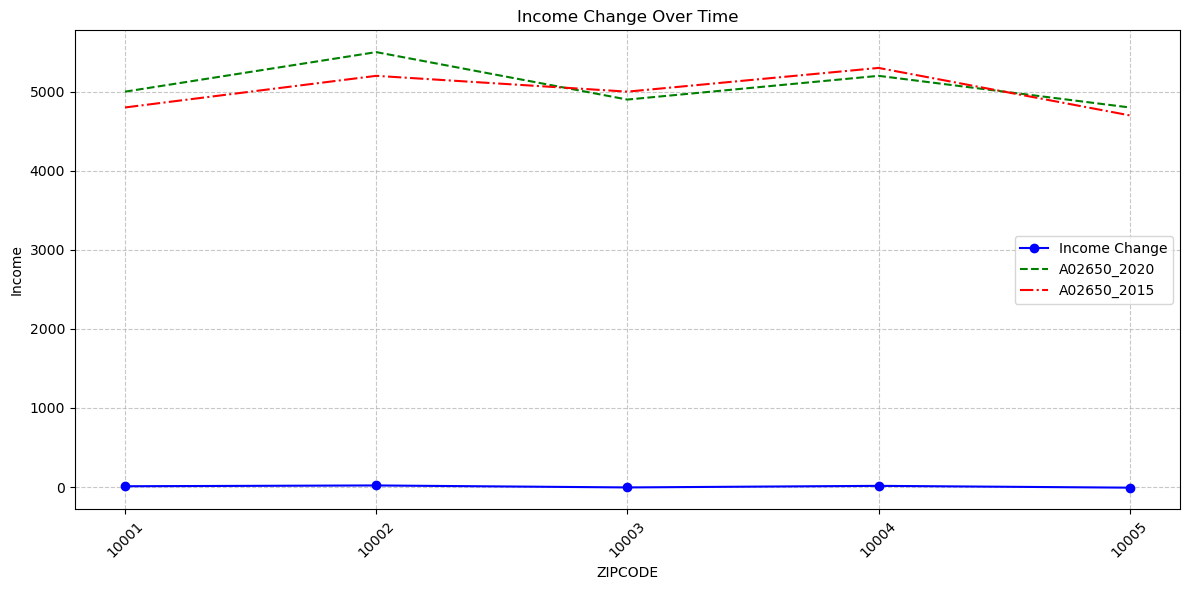

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = {
    "ZIPCODE": [10001, 10002, 10003, 10004, 10005],
    "Income_Change": [10, 20, -5, 15, -8],
    "A02650_2020": [5000, 5500, 4900, 5200, 4800],
    "A02650_2015": [4800, 5200, 5000, 5300, 4700],
}

# Create a DataFrame
Income_Change_df = pd.DataFrame(data)

# Convert ZIPCODE to a string for plotting
Income_Change_df['ZIPCODE'] = Income_Change_df['ZIPCODE'].astype(str)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the Income_Change as a line graph
Income_Change_df.plot(x="ZIPCODE", y="Income_Change", ax=ax, label="Income Change", marker='o', linestyle='-', color='blue')

# Plot the A02650_2020 as a line graph
Income_Change_df.plot(x="ZIPCODE", y="A02650_2020", ax=ax, label="A02650_2020", linestyle='--', color='green')

# Plot the A02650_2015 as a line graph
Income_Change_df.plot(x="ZIPCODE", y="A02650_2015", ax=ax, label="A02650_2015", linestyle='-.', color='red')

# Add labels and a title
plt.xlabel("ZIPCODE")
plt.ylabel("Income")
plt.title("Income Change Over Time")

# Add a legend
plt.legend()

# Customize the gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Customize the x-axis ticks (optional)
ax.set_xticks(range(len(Income_Change_df["ZIPCODE"])))
ax.set_xticklabels(Income_Change_df["ZIPCODE"], rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


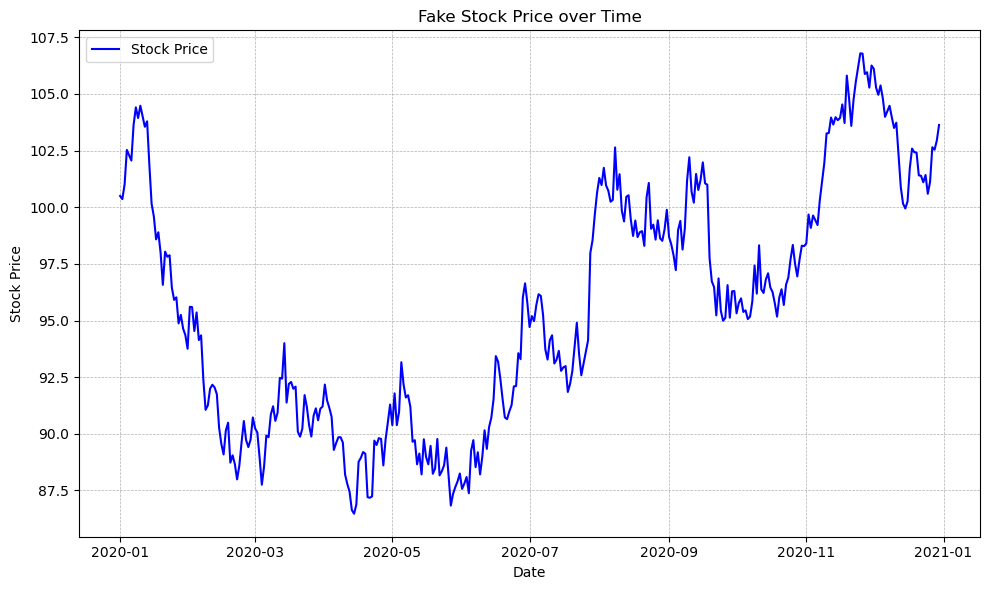

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate some fake data
np.random.seed(42)
dates = pd.date_range(start="2020-01-01", periods=365)
price_changes = np.random.randn(365)  # Random changes in price
prices = 100 + np.cumsum(price_changes)  # Cumulative sum to get prices

# Create a DataFrame
df = pd.DataFrame(data={'Date': dates, 'Price': prices})

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], label="Stock Price", color='blue')
plt.title("Fake Stock Price over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


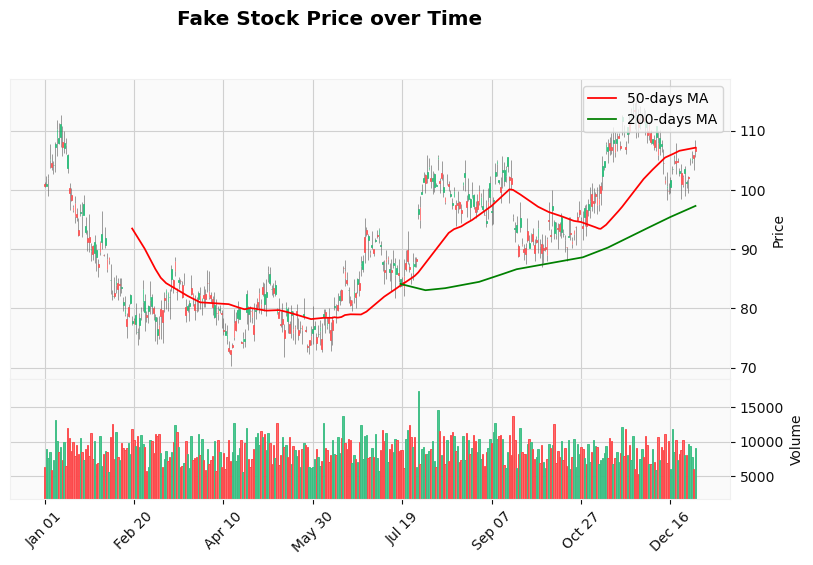

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

# Generate some fake data
np.random.seed(42)
dates = pd.date_range(start="2020-01-01", periods=365)
price_changes = np.random.randn(365) * 2  # Random changes in price
prices = 100 + np.cumsum(price_changes)  # Cumulative sum to get prices

# Generate open, close, high, low data
opens = prices
closes = prices + np.random.randn(365)  # adding some noise to simulate open/close difference
highs = np.maximum(opens, closes) + np.abs(np.random.randn(365)) * 1.5  # simulate highs
lows = np.minimum(opens, closes) - np.abs(np.random.randn(365)) * 1.5  # simulate lows

# Volume data
volumes = np.abs(price_changes) * 1000 + np.random.randint(5000, 10000, size=365)

# Create a DataFrame
df = pd.DataFrame(data={'Date': dates, 'Open': opens, 'High': highs, 'Low': lows, 'Close': closes, 'Volume': volumes})
df.set_index('Date', inplace=True)

# Candlestick plot
ap = [mpf.make_addplot(df['Close'].rolling(50).mean(), color='r', label='50-days MA'),
      mpf.make_addplot(df['Close'].rolling(200).mean(), color='g', label='200-days MA')]

mpf.plot(df, type='candle', style='yahoo', volume=True, figsize=(10, 6), title="Fake Stock Price over Time", addplot=ap)


In [70]:
#demographics

In [71]:
dfd = pd.read_csv('Demographics.csv')

In [72]:
dfd

Geography Type  Year Geography  Population - Total  Population - Age 0-17  \
0         Citywide  2018   Chicago             2705988                 548999   
1         ZIP Code  2018     60601               14675                    820   
2         ZIP Code  2018     60602                1244                    149   
3         ZIP Code  2018     60603                1174                     56   
4         ZIP Code  2018     60604                 782                     38   
..             ...   ...       ...                 ...                    ...   
230       Zip Code  2021     60626               50295                   8007   
231       Zip Code  2021     60628               64489                  13734   
232       Zip Code  2021     60629              107487                  29283   
233       Zip Code  2021     60630               55591                  11093   
234       Zip Code  2021     60631               30589                   6925   

     Population - Age 18-29  Population - Age 30-39  Population - Age 40-49  \
0                    552935                  456321                  336457   
1                      4606                    2792                    2190   
2                       435                     462                     135   
3                       561                     101                      97   
4                       303                     104                      51   
..                      ...                     ...                     ...   
230                   11937                    8965                    6995   
231                   11638                    7491                    7593   
232                   20690                   13227                   14954   
233                    7053                    8926                    7337   
234                    3308                    4357                    3813   

     Population - Age 50-59  Population - Age 60-69  ...  \
0                    312965                  262991  ...   
1                      1333                    1340  ...   
2                        53                      10  ...   
3                       197                      97  ...   
4                       101                     130  ...   
..                      ...                     ...  ...   
230                    6738                    4360  ...   
231                    9066                    6930  ...   
232                   11096                    8187  ...   
233                    7479                    7975  ...   
234                    4657                    3686  ...   

     Population - Age 18+  Population - Age 65+  Population - Female  \
0                 2156989                349712              1386113   
1                   13855                  2075                 7484   
2                    1095                     5                  551   
3                    1118                   112                  601   
4                     744                    93                  413   
..                    ...                   ...                  ...   
230                 42288                  5098                25318   
231                 50755                 10940                34961   
232                 78204                 13746                53753   
233                 44498                  9658                27787   
234                 23664                  5546                15516   

     Population - Male  Population - Latinx  Population - Asian Non-Latinx  \
0              1319875               776661                       179841.0   
1                 7191                 1274                            NaN   
2                  693                   81                            NaN   
3                  573                  115                            NaN   
4                  369                   34                            NaN   
..                 ...      

In [73]:
year=[2020]

In [74]:
dfd= dfd[dfd['Year'].isin(year)]

In [75]:
dfd= dfd[dfd['Geography'].isin(['60601', '60602', '60603', '60604', '60605', '60606', '60607', '60608', '60609', '60610', '60611', '60612', '60613', '60614', '60615', '60616', '60617', '60618', '60619', '60620', '60621', '60622', '60623', '60624', '60625', '60626', '60628', '60629', '60630', '60631', '60632', '60633', '60634', '60636', '60637', '60638', '60639', '60640', '60641', '60642', '60643', '60644', '60645', '60646', '60647', '60649', '60651', '60652', '60653', '60654', '60655', '60657', '60659', '60660', '60661'])]

In [76]:
dfd

Geography Type  Year Geography  Population - Total  Population - Age 0-17  \
121       Zip Code  2020     60601               14513                    825   
122       Zip Code  2020     60602                1596                    115   
123       Zip Code  2020     60603                1186                     15   
124       Zip Code  2020     60604                 729                      5   
125       Zip Code  2020     60605               30950                   2608   
126       Zip Code  2020     60606                3204                     96   
127       Zip Code  2020     60607               30306                   3362   
128       Zip Code  2020     60608               80011                  14068   
129       Zip Code  2020     60609               60551                  15379   
130       Zip Code  2020     60610               40954                   3385   
131       Zip Code  2020     60611               33937                   2127   
132       Zip Code  2020     60612               32240                   6760   
133       Zip Code  2020     60613               51399                   6285   
134       Zip Code  2020     60614               72391                  10603   
135       Zip Code  2020     60615               41198                   6110   
136       Zip Code  2020     60616               52557                   7134   
137       Zip Code  2020     60617               82101                  20843   
138       Zip Code  2020     60618               94646                  20813   
139       Zip Code  2020     60619               61372                  12667   
140       Zip Code  2020     60620               68761                  16203   
141       Zip Code  2020     60621               26736                   7157   
142       Zip Code  2020     60622               52957                   7103   
143       Zip Code  2020     60623               77732                  20657   
144       Zip Code  2020     60624               35054                   9336   
145       Zip Code  2020     60625               78820                  15832   
146       Zip Code  2020     60632               86715                  23661   
147       Zip Code  2020     60633               12720                   2785   
148       Zip Code  2020     60634               75604                  15430   
149       Zip Code  2020     60636               30039                   6809   
150       Zip Code  2020     60637               46621                  10666   
151       Zip Code  2020     60638               57057                  13803   
152       Zip Code  2020     60639               88515                  23270   
153       Zip Code  2020     60640               69726                   9088   
154       Zip Code  2020     60641               70163                  15784   
155       Zip Code  2020     60642               20191                   1810   
156       Zip Code  2020     60643               48572                  11319   
157       Zip Code  2020     60644               45919                  11798   
158       Zip Code  2020     60645               46924                  12164   
159       Zip Code  2020     60646               29043                   6708   
160       Zip Code  2020     60647               85658                  15040   
161       Zip Code  2020     60649               47084                  10038   
162       Zip Code  2020     60651               63679                  16789   
163       Zip Code  2020     60652               42296                  10768   
164       Zip Code  2020     60653               33574                   8697   
165       Zip Code  2020     60654               20812                   1228   
166       Zip Code  2020     60655               27771                   6878   
168       Zip Code  2020     60657               70489                   8776   
169       Zip Code  2020     60659               43843                  11916   
170       Zip Code  2020     60660 

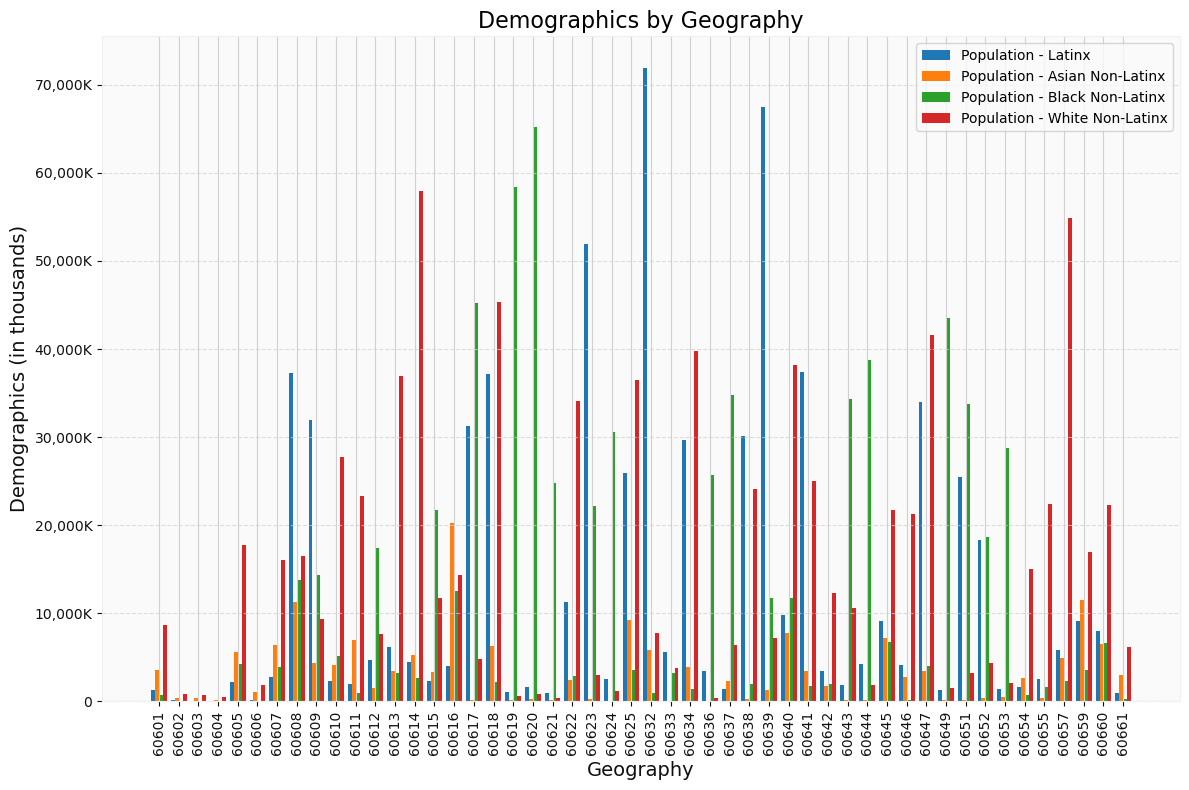

In [77]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np

# Assuming dfd is your DataFrame
# Clean the 'Geography' column by stripping leading and trailing whitespaces
dfd['Geography'] = dfd['Geography'].str.strip()

# Remove the rows where 'Geography' is 'Chicago'
dfd = dfd[dfd['Geography'] != 'Chicago']

# Create a new figure and axis with adjusted size and aspect ratio
fig, ax = plt.subplots(figsize=(12, 8))

# Group by 'Geography' and sum the population columns
zip_stats = dfd.groupby('Geography')[['Population - Latinx', 'Population - Asian Non-Latinx', 'Population - Black Non-Latinx', 'Population - White Non-Latinx']].sum()

# Get the ZIP codes (Geography) and their corresponding total population amounts
zip_codes = zip_stats.index
total_population = zip_stats.values

# Width of each bar
bar_width = 0.2

# Create a bar for each 'Geography' for each population category
for i, category in enumerate(['Population - Latinx', 'Population - Asian Non-Latinx', 'Population - Black Non-Latinx', 'Population - White Non-Latinx']):
    x = np.arange(len(zip_codes)) + i * bar_width
    ax.bar(x, total_population[:, i], width=bar_width, label=category)

import matplotlib.ticker as mtick

def custom_formatter(x, pos):
    if x < 1:
        return '{:.0f}'.format(x * 1000)  # For values less than 1, show them in whole numbers, but scaled by 1000
    else:
        return '{:,.0f}K'.format(x)  # For values greater than or equal to 1, show them in K format

# Set the y-axis ticker to use the custom formatter
ax.yaxis.set_major_formatter(mtick.FuncFormatter(custom_formatter))


# Set x-axis labels to be the ZIP codes (Geography)
ax.set_xticks(np.arange(len(zip_codes)) + bar_width * 1.5)
ax.set_xticklabels(zip_codes, rotation=90, fontsize=10)

# Set labels, title, and legend with adjusted font sizes
ax.set_title('Demographics by Geography', fontsize=16)
ax.set_xlabel('Geography', fontsize=14)
ax.set_ylabel('Demographics (in thousands)', fontsize=14)

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend
ax.legend()

# Fine-tune layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


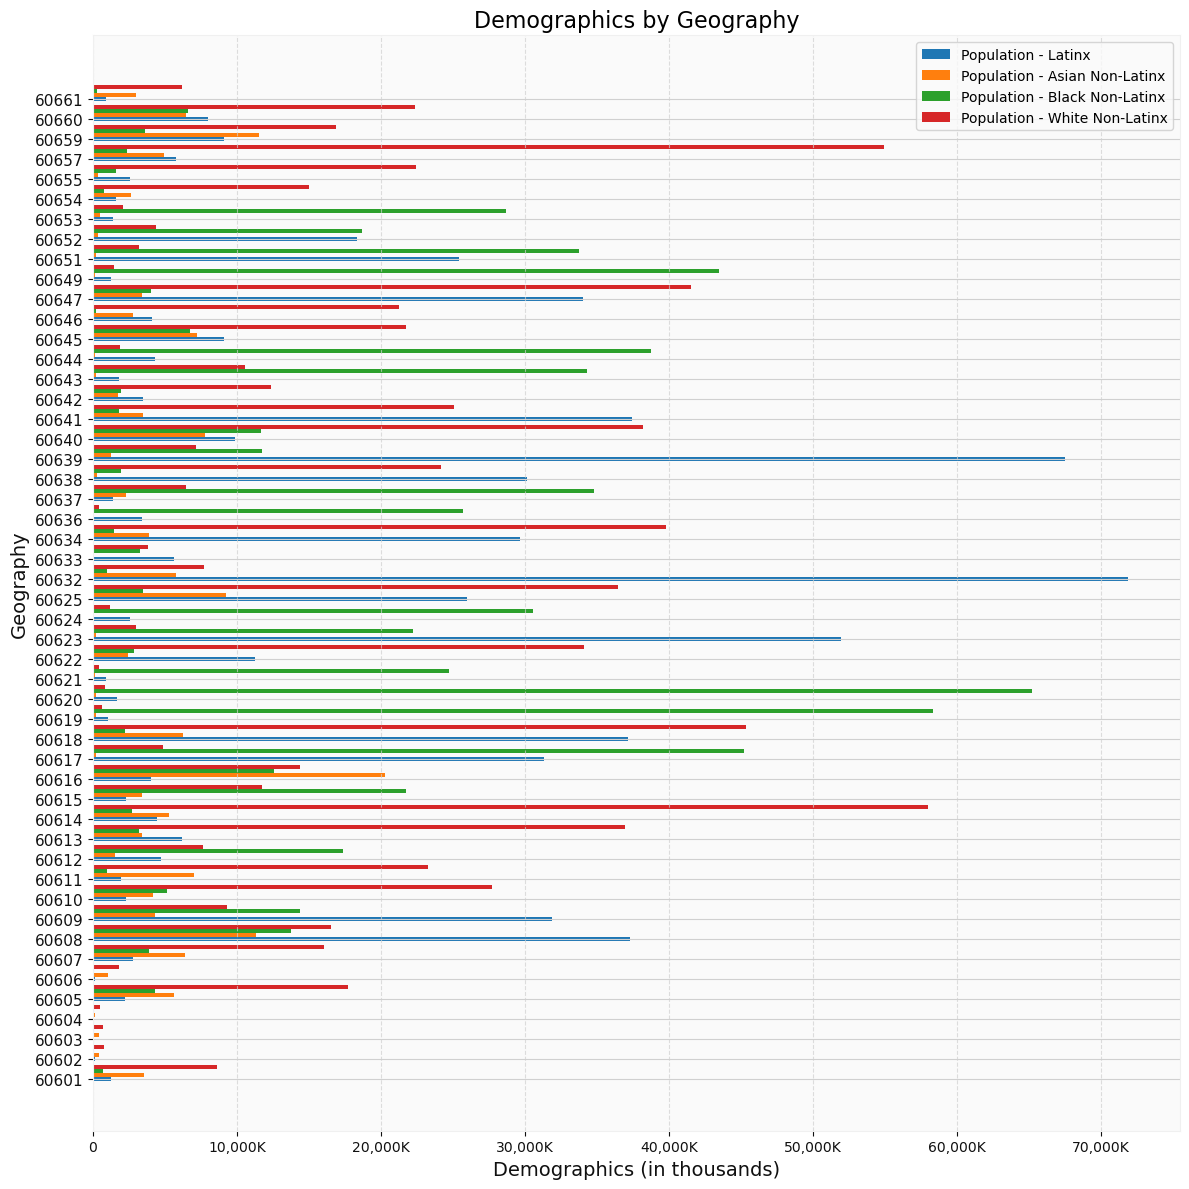

In [78]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np

# Assuming dfd is your DataFrame
# Clean the 'Geography' column by stripping leading and trailing whitespaces
dfd['Geography'] = dfd['Geography'].str.strip()

# Remove the rows where 'Geography' is 'Chicago'
dfd = dfd[dfd['Geography'] != 'Chicago']

# Create a new figure and axis with adjusted size and aspect ratio
fig, ax = plt.subplots(figsize=(12, 12))

# Group by 'Geography' and sum the population columns
zip_stats = dfd.groupby('Geography')[['Population - Latinx', 'Population - Asian Non-Latinx', 'Population - Black Non-Latinx', 'Population - White Non-Latinx']].sum()

# Get the ZIP codes (Geography) and their corresponding total population amounts
zip_codes = zip_stats.index
total_population = zip_stats.values

# Width of each bar
bar_width = 0.2

# Create a bar for each 'Geography' for each population category
for i, category in enumerate(['Population - Latinx', 'Population - Asian Non-Latinx', 'Population - Black Non-Latinx', 'Population - White Non-Latinx']):
    y = np.arange(len(zip_codes)) + i * bar_width
    ax.barh(y, total_population[:, i], height=bar_width, label=category)

import matplotlib.ticker as mtick

def custom_formatter(x, pos):
    if x < 1:
        return '{:.0f}'.format(x * 1000)  # For values less than 1, show them in whole numbers, but scaled by 1000
    else:
        return '{:,.0f}K'.format(x)  # For values greater than or equal to 1, show them in K format

# Set the x-axis ticker to use the custom formatter
ax.xaxis.set_major_formatter(mtick.FuncFormatter(custom_formatter))

# Set y-axis labels to be the ZIP codes (Geography)
ax.set_yticks(np.arange(len(zip_codes)))
ax.set_yticklabels(zip_codes, fontsize=11)

# Set labels, title, and legend with adjusted font sizes
ax.set_title('Demographics by Geography', fontsize=16)
ax.set_xlabel('Demographics (in thousands)', fontsize=14)
ax.set_ylabel('Geography', fontsize=14)

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add a legend
ax.legend()

# Fine-tune layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [79]:
overlap = chicago_zip_map.columns.intersection(dfd.columns)
print(overlap)

Index([], dtype='object')


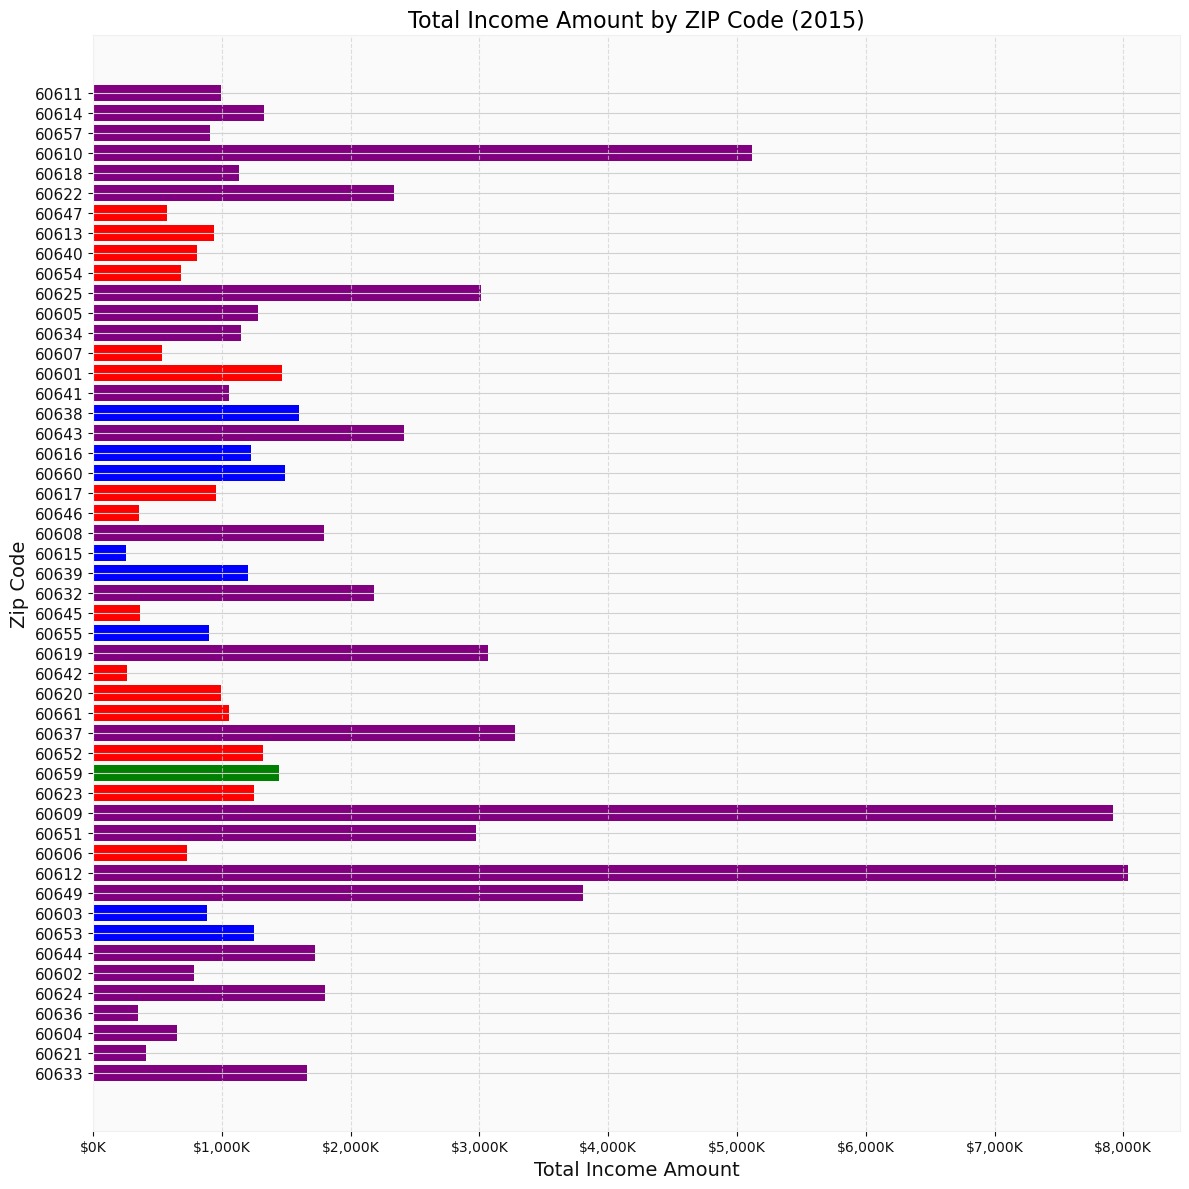

In [80]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np

# Assuming df15 is your DataFrame for income in 2015
# Assuming dfd is your DataFrame for demographics

# Convert the 'ZIPCODE' column in df15 to object data type
df15['ZIPCODE'] = df15['ZIPCODE'].astype(str)

# Group data by ZIPCODE and get the sum of 'A00200' for each ZIP code
zip_income = df15.groupby('ZIPCODE')['A02650'].sum()

# Define a function to find the majority demographic group for each row
def find_majority_group(row):
    categories = ['Population - Latinx', 'Population - Asian Non-Latinx', 'Population - Black Non-Latinx', 'Population - White Non-Latinx']
    max_category = max(categories, key=lambda category: row[category])
    return max_category.replace('Population - ', '').replace(' Non-Latinx', '')

# Apply the function to each row in the demographics DataFrame
dfd['Majority Group'] = dfd.apply(find_majority_group, axis=1)

# Merge income and demographics data
merged_data = zip_income.reset_index().merge(dfd, left_on='ZIPCODE', right_on='Geography', how='inner')

# Sort ZIP codes by total income
merged_data = merged_data.sort_values(by='A02650', ascending=True)

# Define colors for each demographic group
colors = {
    'Latinx': 'blue',
    'Asian': 'green',
    'Black': 'red',
    'White': 'purple'
}

# Create a new figure and axis with adjusted size and aspect ratio
fig, ax = plt.subplots(figsize=(12, 12))

# Create a bar for each ZIP code
for i, row in merged_data.iterrows():
    ax.barh(i, row['A02650'], color=colors[row['Majority Group']])

# Set the x-axis ticker to use the custom formatter
def thousands_formatter(x, pos):
    return '${:,.0f}K'.format(x/1000)

ax.xaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

# Set y-axis labels to be the ZIP codes
ax.set_yticks(range(len(merged_data)))
ax.set_yticklabels(merged_data['ZIPCODE'], fontsize=11)

# Set labels, title, and legend with adjusted font sizes
ax.set_title('Total Income Amount by ZIP Code (2015)', fontsize=16)
ax.set_xlabel('Total Income Amount', fontsize=14)
ax.set_ylabel('Zip Code', fontsize=14)

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


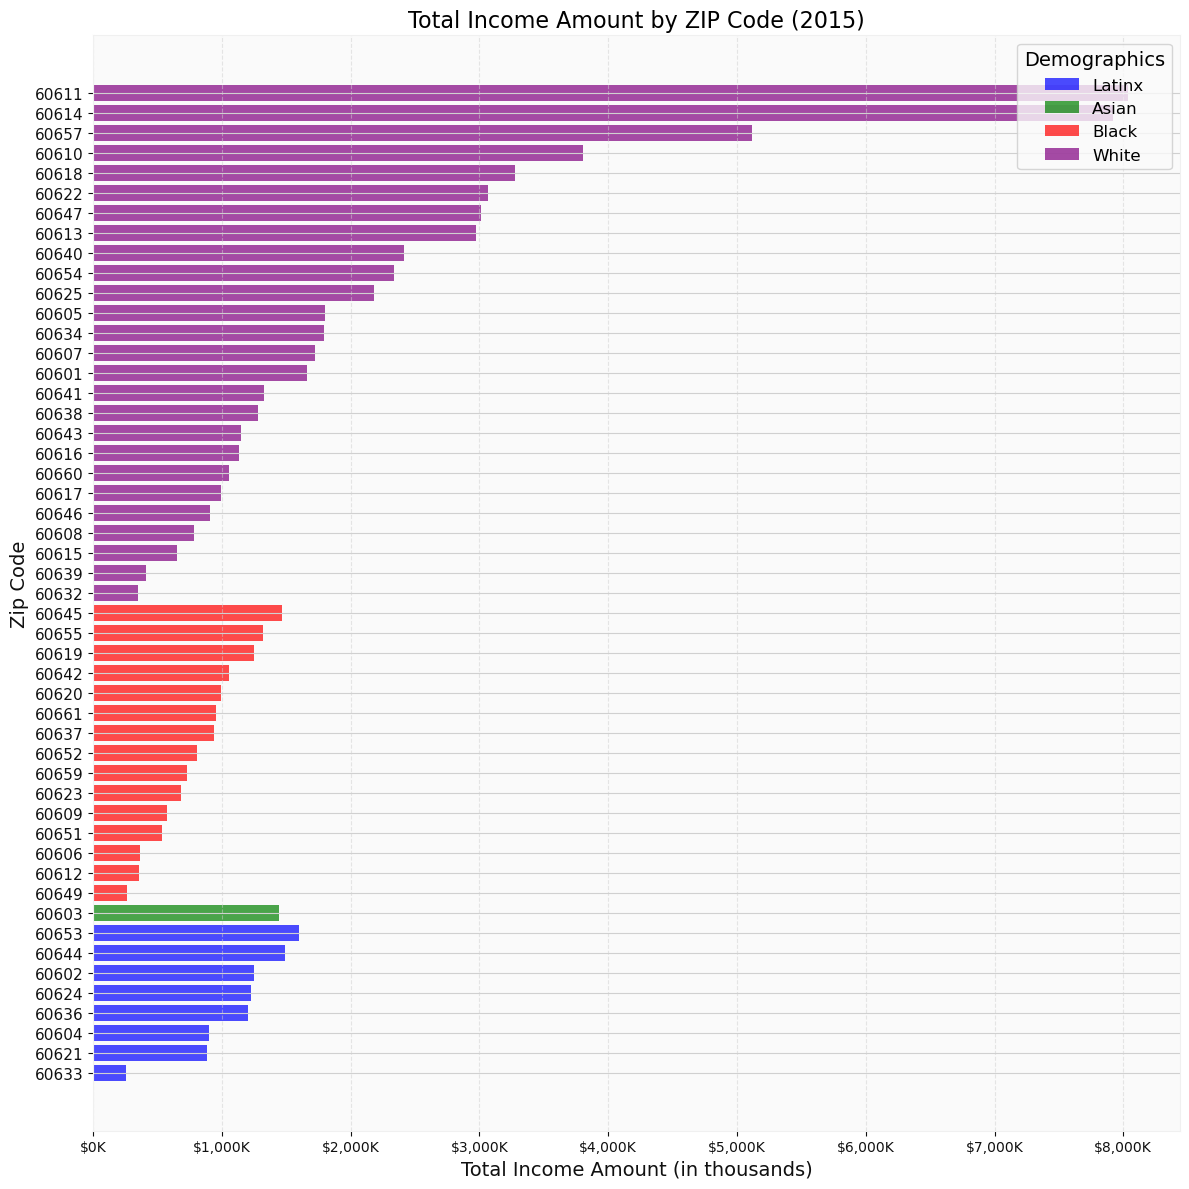

In [81]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np

# Assuming df15 is your DataFrame for income in 2015
# Assuming dfd is your DataFrame for demographics

# Convert the 'ZIPCODE' column in df15 to object data type
df15['ZIPCODE'] = df15['ZIPCODE'].astype(str)

# Group data by ZIPCODE and get the sum of 'A00200' for each ZIP code
zip_income = df15.groupby('ZIPCODE')['A02650'].sum()

# Define a function to find the majority demographic group for each row
def find_majority_group(row):
    categories = ['Population - Latinx', 'Population - Asian Non-Latinx', 'Population - Black Non-Latinx', 'Population - White Non-Latinx']
    max_category = max(categories, key=lambda category: row[category])
    return max_category.replace('Population - ', '').replace(' Non-Latinx', '')

# Apply the function to each row in the demographics DataFrame
dfd['Majority Group'] = dfd.apply(find_majority_group, axis=1)

# Merge income and demographics data
merged_data = zip_income.reset_index().merge(dfd, left_on='ZIPCODE', right_on='Geography', how='inner')

# Sort ZIP codes by total income
merged_data = merged_data.sort_values(by='A02650', ascending=True)

# Define colors for each demographic group
colors = {
    'Latinx': 'blue',
    'Asian': 'green',
    'Black': 'red',
    'White': 'purple'
}

# Create a new figure and axis with adjusted size and aspect ratio
fig, ax = plt.subplots(figsize=(12, 12))

# Create a single legend for demographics
legend_labels = []

# Plot each demographic group separately and add labels
for demographic_group, color in colors.items():
    df_group = merged_data[merged_data['Majority Group'] == demographic_group]
    total_income = df_group['A02650']
    zip_codes = df_group['ZIPCODE']
    ax.barh(zip_codes, total_income, color=color, alpha=0.7)
    legend_labels.append(demographic_group)

# Set the x-axis ticker to use the custom formatter
def thousands_formatter(x, pos):
    return '${:,.0f}K'.format(x/1000)

ax.xaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

# Set y-axis labels to be the ZIP codes
ax.set_yticks(range(len(merged_data)))
ax.set_yticklabels(merged_data['ZIPCODE'], fontsize=11)

# Set labels, title, and legend with adjusted font sizes
ax.set_title('Total Income Amount by ZIP Code (2015)', fontsize=16)
ax.set_xlabel('Total Income Amount (in thousands)', fontsize=14)
ax.set_ylabel('Zip Code', fontsize=14)

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.5)

# Create a single legend for demographics
legend = ax.legend(legend_labels, title='Demographics', loc='upper right', fontsize=12)
legend.set_title('Demographics', prop={'size': 14})



# Show the plot
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


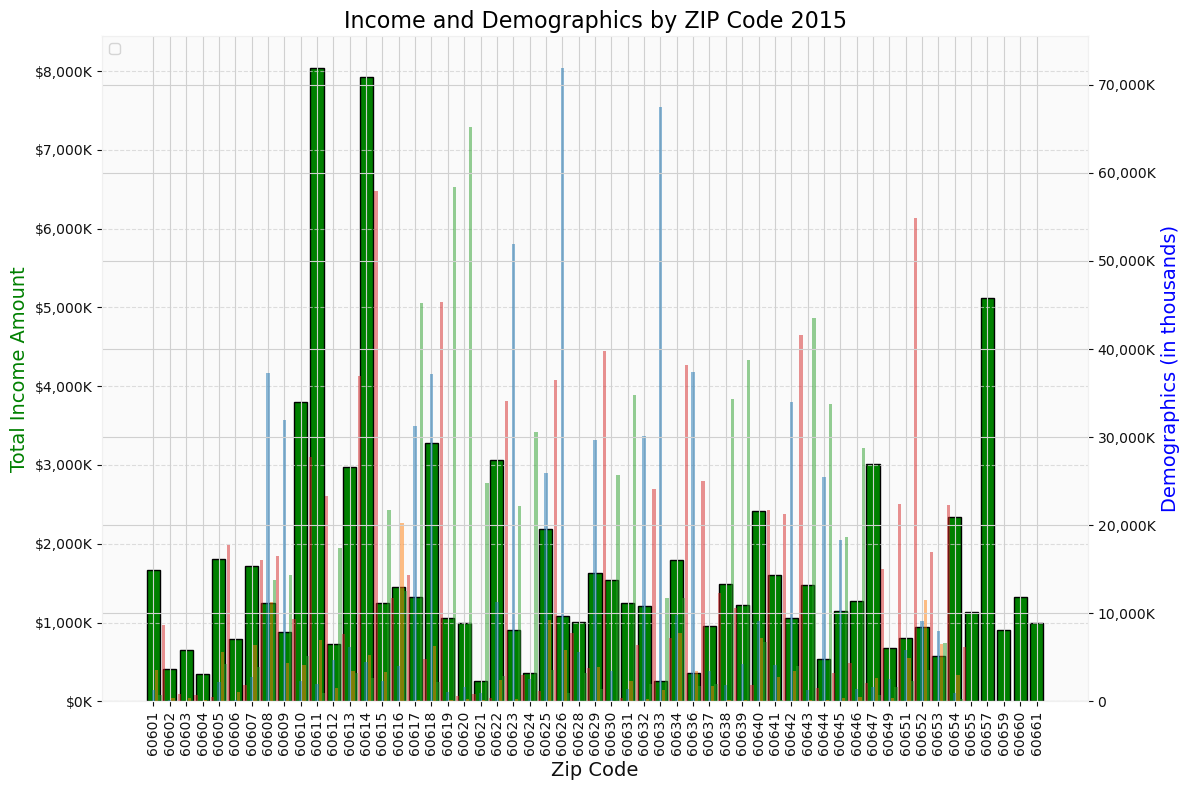

In [82]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np

# Create a new figure and axis with adjusted size and aspect ratio
fig, ax1 = plt.subplots(figsize=(12, 8))

# Group data by ZIPCODE and get the sum of 'A00200' for each ZIP code (Income)
zip_stats_income = df15.groupby('ZIPCODE')['A02650'].sum()

# Get the ZIP codes and their corresponding total income amounts
zip_codes_income = zip_stats_income.index.astype(int)
total_income = zip_stats_income.values

# Define the formatter function to display thousands of dollars
def thousands_formatter(x, pos):
    return '${:,.0f}K'.format(x/1000)

# Set the y-axis ticker for the income data
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

# Create a bar for income (left y-axis)
ax1.bar(range(len(zip_codes_income)), total_income, color='green', edgecolor='black', label='Income')

# Set x-axis labels to be the ZIP codes
ax1.set_xticks(range(len(zip_codes_income)))
ax1.set_xticklabels(zip_codes_income, rotation=90, fontsize=10)

# Set labels and title for income data
ax1.set_xlabel('Zip Code', fontsize=14)
ax1.set_ylabel('Total Income Amount', fontsize=14, color='green')
ax1.set_title('Income and Demographics by ZIP Code 2015', fontsize=16)

# Add grid for better readability for income data
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Demographics by ZIP code (using a secondary axis on the right)
ax2 = ax1.twinx()

# Group by 'Geography' and sum the population columns
zip_stats_demographics = dfd.groupby('Geography')[['Population - Latinx', 'Population - Asian Non-Latinx', 'Population - Black Non-Latinx', 'Population - White Non-Latinx']].sum()

# Set the y-axis ticker to use the custom formatter for demographics
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(custom_formatter))

# Set labels and title for demographics data
ax2.set_ylabel('Demographics (in thousands)', fontsize=14, color='blue')

# Add a legend for demographics data
ax2.legend(loc='upper left')

# Get the ZIP codes (Geography) and their corresponding total population amounts
zip_codes_demographics = zip_stats_demographics.index
total_population = zip_stats_demographics.values

# Width of each bar
bar_width = 0.2

# Create a bar for each 'Geography' for each population category
for i, category in enumerate(['Population - Latinx', 'Population - Asian Non-Latinx', 'Population - Black Non-Latinx', 'Population - White Non-Latinx']):
    x = np.arange(len(zip_codes_demographics)) + i * bar_width
    ax2.bar(x, total_population[:, i], width=bar_width, label=category, alpha=0.5)

# Fine-tune layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()


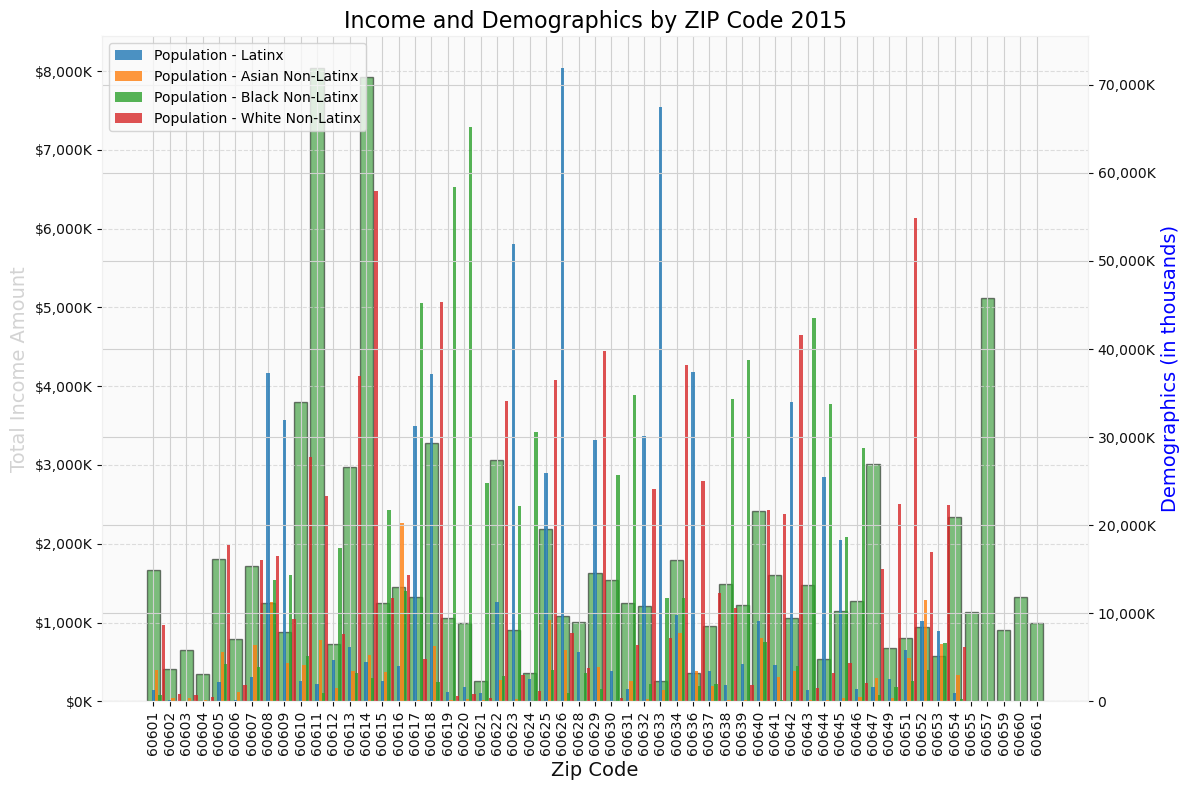

In [83]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np

# Create a new figure and axis with adjusted size and aspect ratio
fig, ax1 = plt.subplots(figsize=(12, 8))

# Group data by ZIPCODE and get the sum of 'A00200' for each ZIP code (Income)
zip_stats_income = df15.groupby('ZIPCODE')['A02650'].sum()

# Get the ZIP codes and their corresponding total income amounts
zip_codes_income = zip_stats_income.index.astype(int)
total_income = zip_stats_income.values

# Define the formatter function to display thousands of dollars
def thousands_formatter(x, pos):
    return '${:,.0f}K'.format(x/1000)

# Set the y-axis ticker for the income data
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(thousands_formatter))

# Create a bar for income (left y-axis) with reduced opacity
ax1.bar(range(len(zip_codes_income)), total_income, color='green', edgecolor='black', label='Income', alpha=0.5)

# Set x-axis labels to be the ZIP codes
ax1.set_xticks(range(len(zip_codes_income)))
ax1.set_xticklabels(zip_codes_income, rotation=90, fontsize=10)

# Set labels and title for income data
ax1.set_xlabel('Zip Code', fontsize=14)
ax1.set_ylabel('Total Income Amount', fontsize=14, color='lightgray')
ax1.set_title('Income and Demographics by ZIP Code 2015', fontsize=16)

# Add grid for better readability for income data
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Demographics by ZIP code (using a secondary axis on the right)
ax2 = ax1.twinx()

# Group by 'Geography' and sum the population columns
zip_stats_demographics = dfd.groupby('Geography')[['Population - Latinx', 'Population - Asian Non-Latinx', 'Population - Black Non-Latinx', 'Population - White Non-Latinx']].sum()

# Get the ZIP codes (Geography) and their corresponding total population amounts
zip_codes_demographics = zip_stats_demographics.index
total_population = zip_stats_demographics.values

# Width of each bar
bar_width = 0.2

# Create a bar for each 'Geography' for each population category with higher opacity
for i, category in enumerate(['Population - Latinx', 'Population - Asian Non-Latinx', 'Population - Black Non-Latinx', 'Population - White Non-Latinx']):
    x = np.arange(len(zip_codes_demographics)) + i * bar_width
    ax2.bar(x, total_population[:, i], width=bar_width, label=category, alpha=0.8)

# Set the y-axis ticker to use the custom formatter for demographics
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(custom_formatter))

# Set labels and title for demographics data
ax2.set_ylabel('Demographics (in thousands)', fontsize=14, color='blue')

# Add a legend for demographics data
ax2.legend(loc='upper left')

# Fine-tune layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()


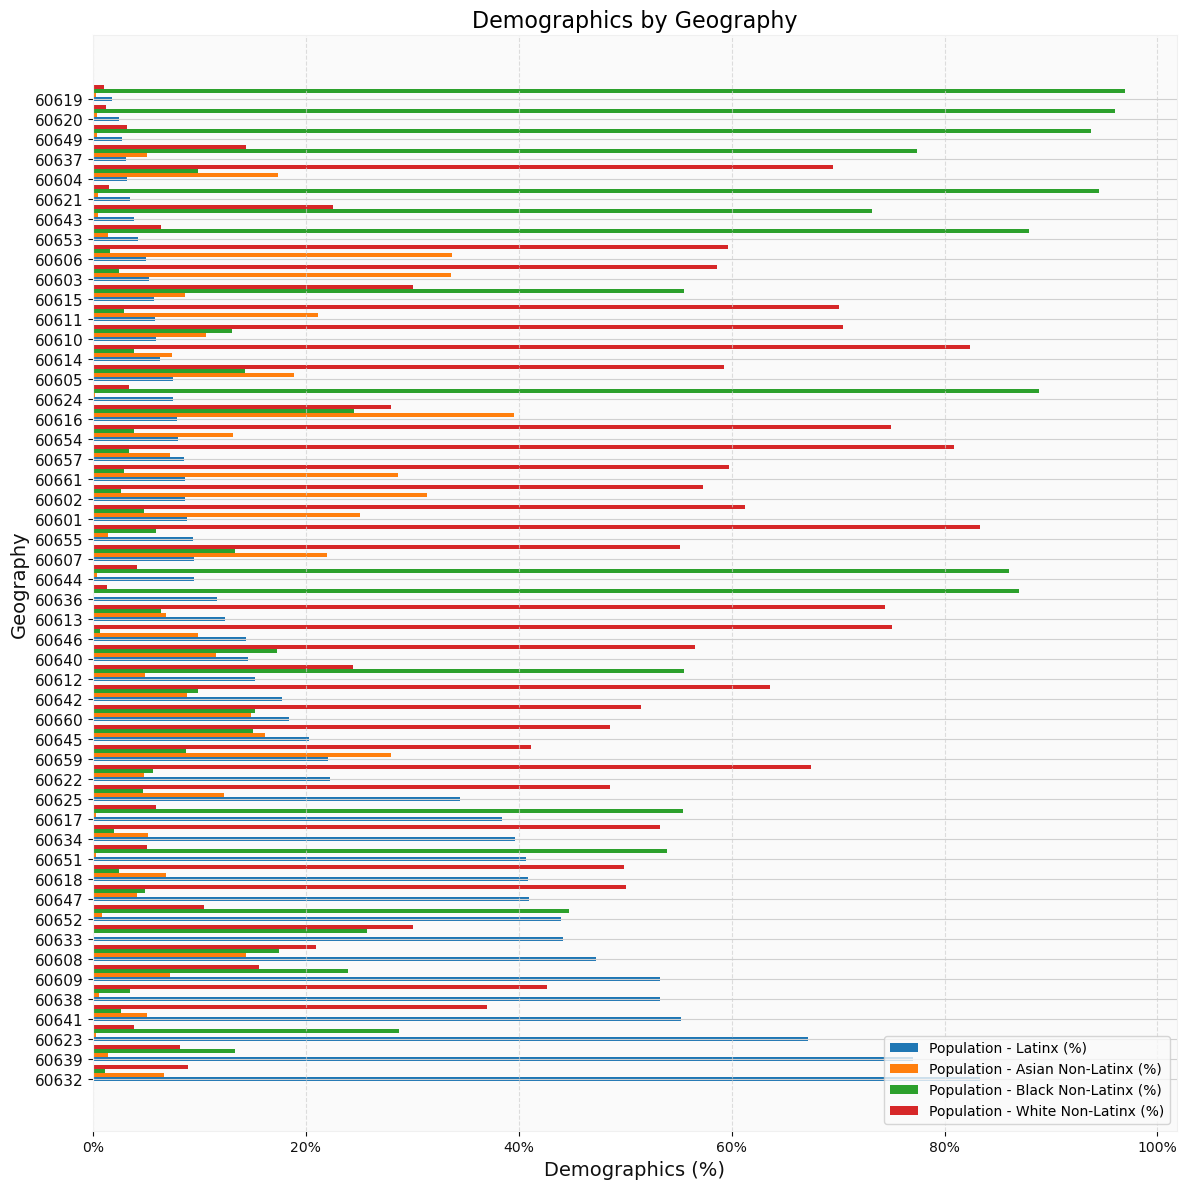

In [84]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np

# Assuming dfd is your DataFrame for demographics
# Clean the 'Geography' column by stripping leading and trailing whitespaces
dfd['Geography'] = dfd['Geography'].str.strip()

# Remove the rows where 'Geography' is 'Chicago'
dfd = dfd[dfd['Geography'] != 'Chicago']

# Create a new figure and axis with adjusted size and aspect ratio
fig, ax = plt.subplots(figsize=(12, 12))

# Group by 'Geography' and sum the population columns
zip_stats = dfd.groupby('Geography')[['Population - Latinx', 'Population - Asian Non-Latinx', 'Population - Black Non-Latinx', 'Population - White Non-Latinx']].sum()

# Calculate the total population for each ZIP code
zip_stats['Total Population'] = zip_stats.sum(axis=1)

# Calculate the percentage of each demographic group in the total population
for category in ['Population - Latinx', 'Population - Asian Non-Latinx', 'Population - Black Non-Latinx', 'Population - White Non-Latinx']:
    zip_stats[category + ' (%)'] = (zip_stats[category] / zip_stats['Total Population']) * 100

# Sort by the percentage of Latinx population (you can change this to any other group)
zip_stats.sort_values(by='Population - Latinx (%)', ascending=False, inplace=True)

# Get the ZIP codes (Geography) and their corresponding demographic percentages
zip_codes = zip_stats.index
demographic_percentages = zip_stats[['Population - Latinx (%)', 'Population - Asian Non-Latinx (%)', 'Population - Black Non-Latinx (%)', 'Population - White Non-Latinx (%)']].values

# Width of each bar
bar_width = 0.2

# Create a bar for each demographic group
for i, category in enumerate(['Population - Latinx (%)', 'Population - Asian Non-Latinx (%)', 'Population - Black Non-Latinx (%)', 'Population - White Non-Latinx (%)']):
    y = np.arange(len(zip_codes)) + i * bar_width
    ax.barh(y, demographic_percentages[:, i], height=bar_width, label=category)

import matplotlib.ticker as mtick

def custom_formatter(x, pos):
    return '{:.0f}%'.format(x)

# Set the x-axis ticker to use the custom formatter
ax.xaxis.set_major_formatter(mtick.FuncFormatter(custom_formatter))

# Set y-axis labels to be the ZIP codes (Geography)
ax.set_yticks(np.arange(len(zip_codes)))
ax.set_yticklabels(zip_codes, fontsize=11)

# Set labels, title, and legend with adjusted font sizes
ax.set_title('Demographics by Geography', fontsize=16)
ax.set_xlabel('Demographics (%)', fontsize=14)
ax.set_ylabel('Geography', fontsize=14)

# Add grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add a legend
ax.legend()

# Fine-tune layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [85]:
# Ensure ZIP codes are of the same data type in both DataFrames
chicago_zip_map['zip'] = chicago_zip_map['zip'].astype(str)
dfd['Geography'] = dfd['Geography'].astype(str)

# Merge the data
mergedd = chicago_zip_map.set_index('zip').join(dfd.set_index('Geography'), lsuffix='_left', rsuffix='_right')

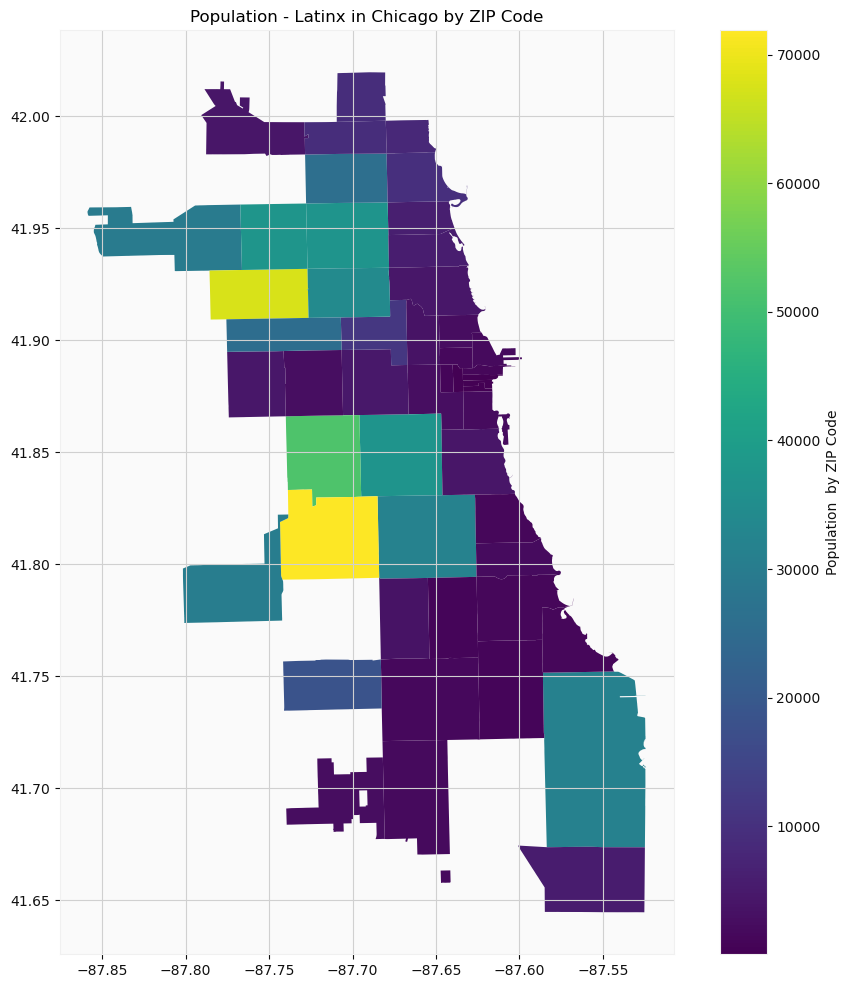

In [86]:
fig, ax = plt.subplots(figsize=(12, 12))
mergedd.plot(column='Population - Latinx', ax=ax, legend=True,
            legend_kwds={'label': "Population  by ZIP Code"})
plt.title('Population - Latinx in Chicago by ZIP Code')
plt.show()

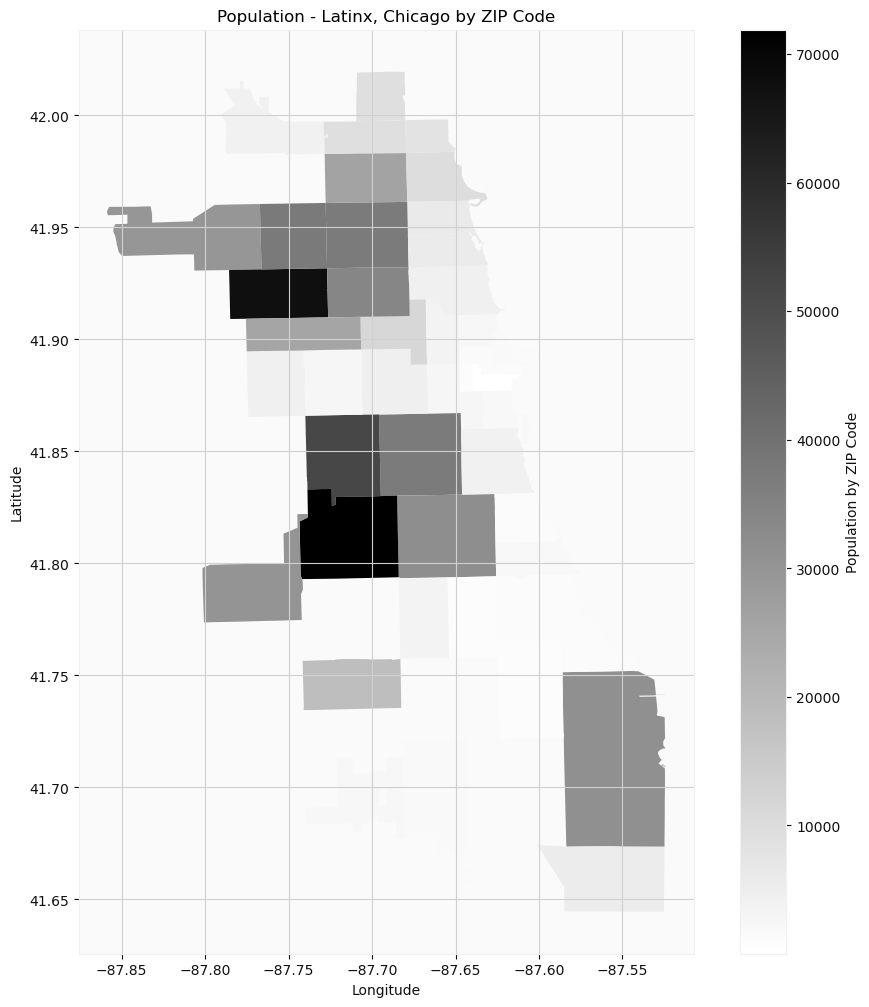

In [87]:
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib as mpl

# Assuming mergedd is your GeoDataFrame
fig, ax = plt.subplots(figsize=(12, 12))

# Create the plot without the legend
mergedd.plot(column='Population - Latinx', ax=ax, cmap='binary', legend=False)

# Manually create a colorbar with the desired formatting
norm = mpl.colors.Normalize(vmin=mergedd['Population - Latinx'].min(), vmax=mergedd['Population - Latinx'].max())
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='binary'), ax=ax)
cbar.set_label("Population by ZIP Code")


ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Population - Latinx, Chicago by ZIP Code')
plt.show()



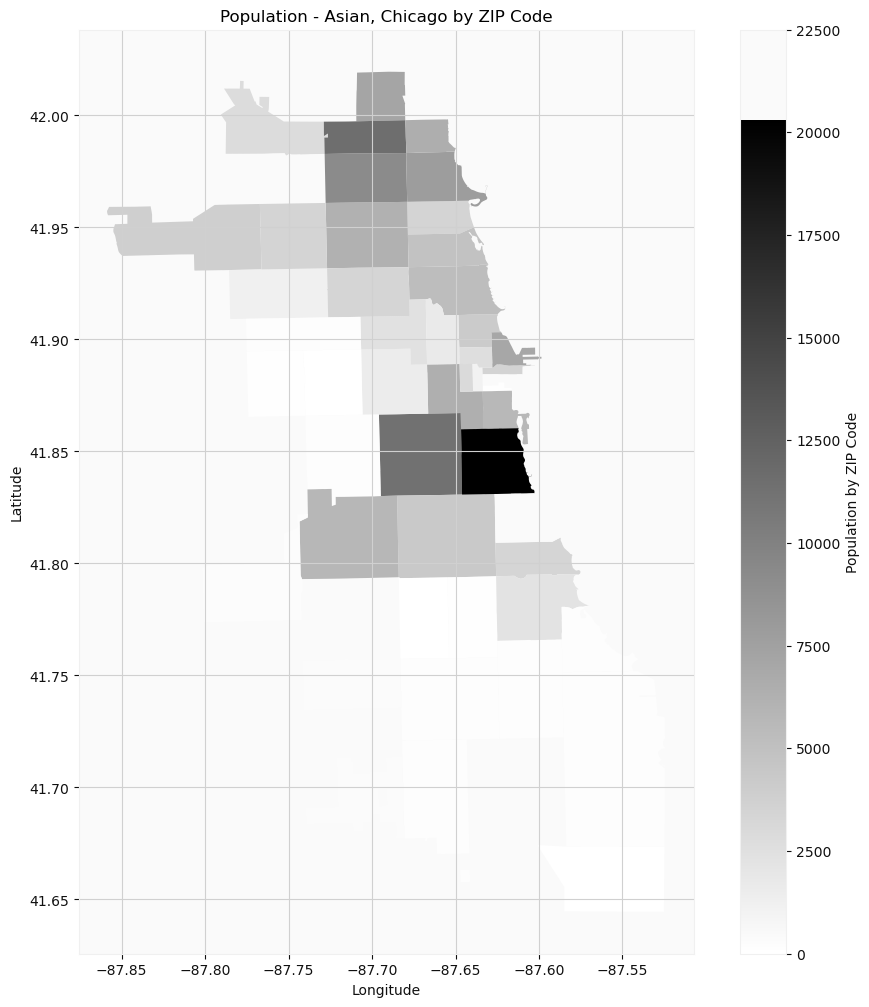

In [88]:
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib as mpl

# Assuming mergedd is your GeoDataFrame
fig, ax = plt.subplots(figsize=(12, 12))

# Create the plot without the legend
mergedd.plot(column='Population - Asian Non-Latinx', ax=ax, cmap='binary', legend=False)

# Manually create a colorbar with the desired formatting
norm = mpl.colors.Normalize(vmin=mergedd['Population - Asian Non-Latinx'].min(), vmax=mergedd['Population - Asian Non-Latinx'].max())
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='binary'), ax=ax)
cbar.set_label("Population by ZIP Code")
tick_locs = (cbar.get_ticks()).tolist()
cbar.set_ticks(tick_locs)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Population - Asian, Chicago by ZIP Code')
plt.show()

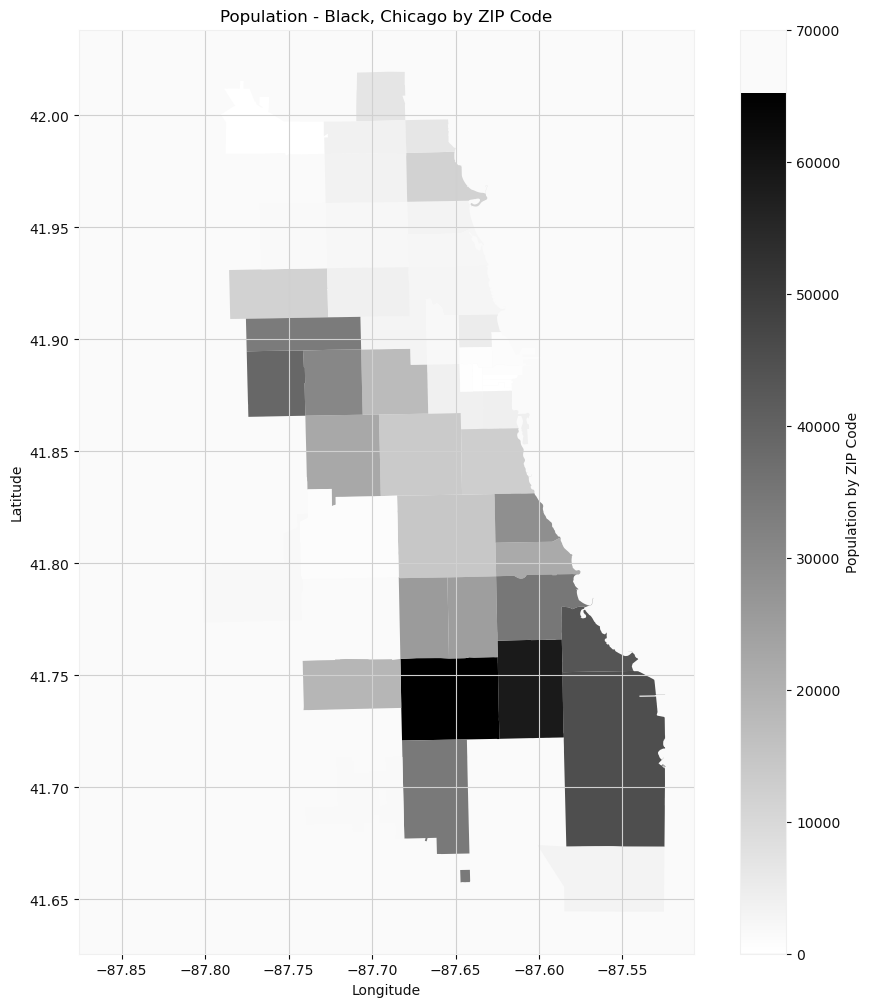

In [89]:
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib as mpl

# Assuming mergedd is your GeoDataFrame
fig, ax = plt.subplots(figsize=(12, 12))

# Create the plot without the legend
mergedd.plot(column='Population - Black Non-Latinx', ax=ax, cmap='binary', legend=False)

# Manually create a colorbar with the desired formatting
norm = mpl.colors.Normalize(vmin=mergedd['Population - Black Non-Latinx'].min(), vmax=mergedd['Population - Black Non-Latinx'].max())
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='binary'), ax=ax)
cbar.set_label("Population by ZIP Code")
tick_locs = (cbar.get_ticks()).tolist()
cbar.set_ticks(tick_locs)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Population - Black, Chicago by ZIP Code')
plt.show()

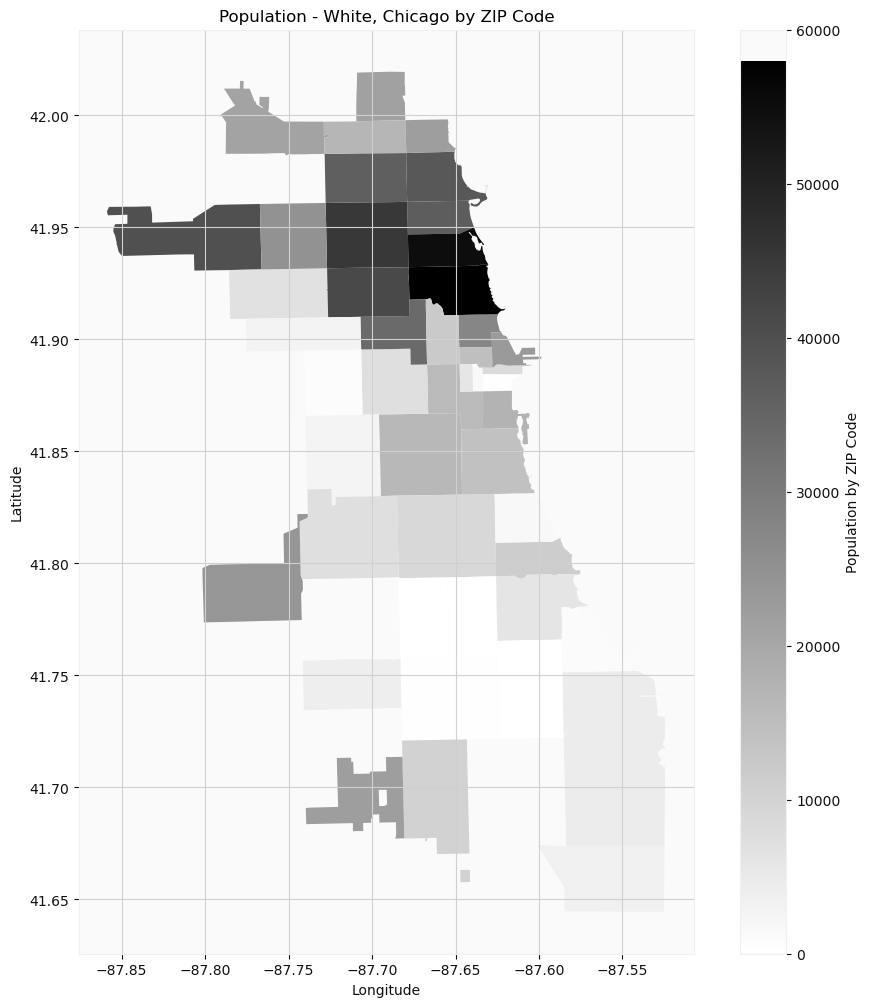

In [90]:
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib as mpl

# Assuming mergedd is your GeoDataFrame
fig, ax = plt.subplots(figsize=(12, 12))

# Create the plot without the legend
mergedd.plot(column='Population - White Non-Latinx', ax=ax, cmap='binary', legend=False)

# Manually create a colorbar with the desired formatting
norm = mpl.colors.Normalize(vmin=mergedd['Population - Black Non-Latinx'].min(), vmax=mergedd['Population - White Non-Latinx'].max())
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='binary'), ax=ax)
cbar.set_label("Population by ZIP Code")
tick_locs = (cbar.get_ticks()).tolist()
cbar.set_ticks(tick_locs)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Population - White, Chicago by ZIP Code')
plt.show()

## 